## 合并三年数据

In [ ]:
import pandas as pd

# 读取 xlsx 文件
df1 = pd.read_excel('D:\study\组会\DATA\SOC\LUCAS\LUCAS_Topsoil_2015_20200323.xlsx')
df2 = pd.read_excel('D:\study\组会\DATA\SOC\LUCAS\LUCAS_TOPSOIL_v1.xlsx')
df3 = pd.read_excel('D:\study\组会\DATA\SOC\LUCAS\LUCAS-SOIL-2018.xls')

# 合并三个数据帧基于共同的 POINT_ID 属性
#merged_df = pd.merge(df1, df2, on='POINT_ID', how='inner')
#merged_df = pd.merge(merged_df, df3, on='POINT_ID', how='inner')

# 选择需要的列
#result_df = merged_df[['POINT_ID', 'OC_09', 'OC_15', 'OC_18','TH_LAT','TH_LONG']]

# 将结果保存为新的 CSV 文件
#result_df.to_csv('new_file.csv', index=False)

In [4]:
import pandas as pd

# 读取 xlsx 文件
df1 = pd.read_csv(r'new_file.csv')
df2 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\2018\BD_LUCAS_data_for_paper\BD2018_data_for_paper.csv')

# 选择需要的列
merged_df = df1.merge(df2, on='POINT_ID', how='left')

# 将结果保存为新的 CSV 文件
merged_df.to_csv('bd_soc.csv', index=False)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

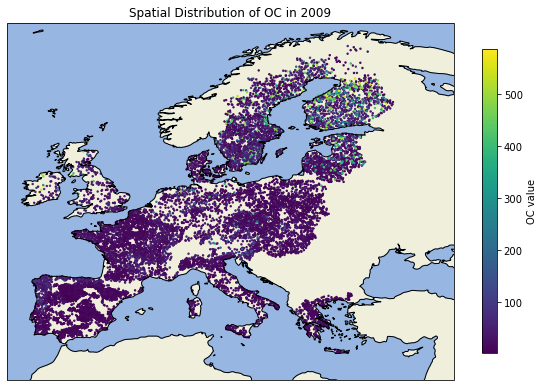

In [67]:
data = pd.read_csv('new_file.csv')

# 排除 OC_18 为空白、'< LOD'或'<0.0'的行
data = data[(data['OC_18'].notna()) & (~data['OC_18'].astype(str).str.strip().isin(['< LOD', '<0.0']))]

# 将 OC_18 列转换为数值类型（如果需要）
data['OC_18'] = pd.to_numeric(data['OC_18'])

def plot_europe():
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.set_extent([-12, 38, 32, 72], crs=ccrs.PlateCarree())
    return ax

# 2009 年空间分布
ax = plot_europe()
scatter_2009 = ax.scatter(data['TH_LONG'], data['TH_LAT'], c=data['OC_09'], cmap='viridis', transform=ccrs.PlateCarree(),s=2)
plt.colorbar(scatter_2009, label='OC value', shrink=0.7)
plt.title('Spatial Distribution of OC in 2009')
plt.show()

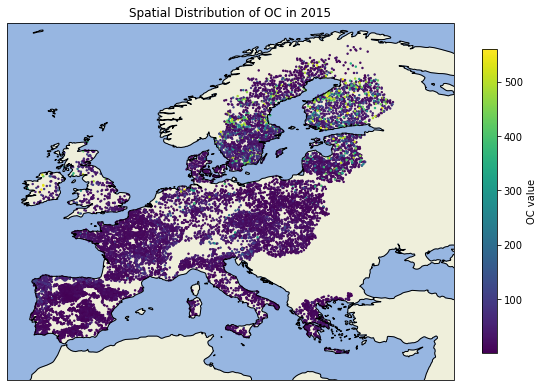

In [68]:
# 2015 年空间分布
ax = plot_europe()
scatter_2015 = ax.scatter(data['TH_LONG'], data['TH_LAT'], c=data['OC_15'], cmap='viridis', transform=ccrs.PlateCarree(), s=2)  # 调整点的大小
plt.colorbar(scatter_2015, label='OC value', shrink=0.7)
plt.title('Spatial Distribution of OC in 2015')
plt.show()

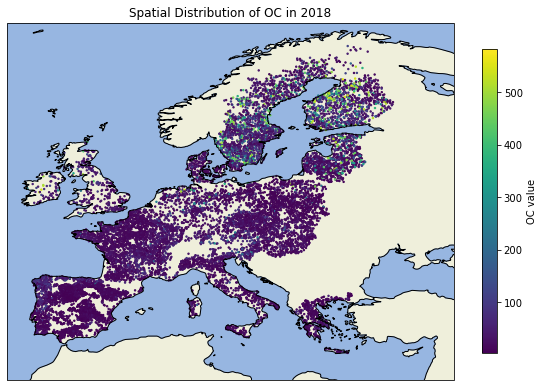

In [69]:
# 2018 年空间分布
ax = plot_europe()
scatter_2018 = ax.scatter(data['TH_LONG'], data['TH_LAT'], c=data['OC_18'], cmap='viridis', transform=ccrs.PlateCarree(), s=2)  # 调整点的大小
plt.colorbar(scatter_2018, label='OC value', shrink=0.7)
plt.title('Spatial Distribution of OC in 2018')
plt.show()

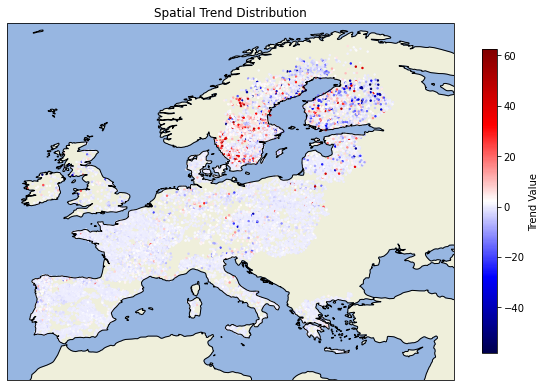

In [66]:
# 计算趋势（假设简单的线性趋势）
data['trend'] = (data['OC_18'] - data['OC_09']) / (2018 - 2009)

vmin = data['trend'].min()
vmax = data['trend'].max()
# 绘制点，并使用趋势值作为颜色
ax = plot_europe()
scatter = ax.scatter(data['TH_LONG'], data['TH_LAT'], c=data['trend'], cmap='seismic', transform=ccrs.PlateCarree(), s=2,vmin=vmin, vmax=vmax)
plt.colorbar(scatter, label='Trend Value', shrink=0.7, ax=ax)  # 添加 ax 参数
plt.title('Spatial Trend Distribution')
plt.show()

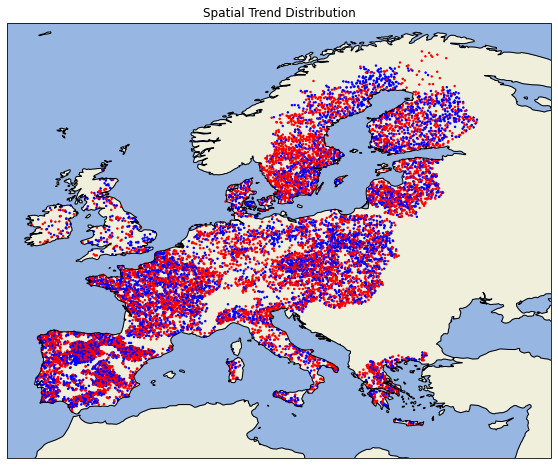

In [54]:
# 计算趋势（假设简单的线性趋势）
data['trend'] = (data['OC_18'] - data['OC_09']) / (2018 - 2009)
ax = plot_europe()
# 定义颜色映射函数
def color_map(trend_value):
    if trend_value > 0:
        return 'red'
    else:
        return 'blue'

colors = [color_map(trend) for trend in data['trend']]

scatter = ax.scatter(data['TH_LONG'], data['TH_LAT'], c=colors, transform=ccrs.PlateCarree(), s=2)
plt.title('Spatial Trend Distribution')
plt.show()

Text(0.5, 1.0, 'Increase and Decrease Percentage')

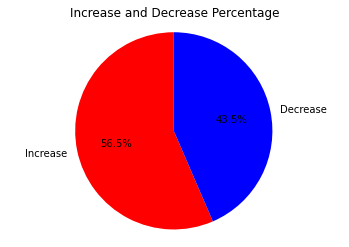

In [63]:
# 确定增加和减少的数量
positive_trends = len([trend for trend in data['trend'] if trend > 0])
negative_trends = len([trend for trend in data['trend'] if trend < 0])
total = len(data['trend'])
increase_percentage = positive_trends / total * 100
decrease_percentage = negative_trends / total * 100

labels = ['Increase', 'Decrease']
sizes = [increase_percentage, decrease_percentage]
colors = ['red', 'blue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 确保饼图是圆形
plt.title('Increase and Decrease Percentage')

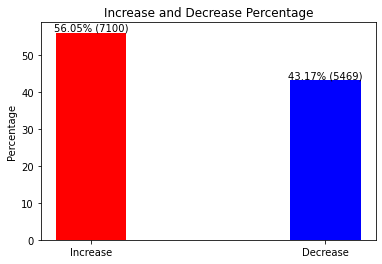

In [60]:

# 绘制柱状图表示增加和减少比例
positive_trends = len([trend for trend in data['trend'] if trend > 0])
negative_trends = len([trend for trend in data['trend'] if trend < 0])
total = len(data['trend'])
increase_percentage = positive_trends / total * 100
decrease_percentage = negative_trends / total * 100

labels = ['Increase', 'Decrease']
percentages = [increase_percentage, decrease_percentage]
colors_bar = ['red' if label == 'Increase' else 'blue' for label in labels]

bars = plt.bar(labels, percentages, color=colors_bar, width=0.3)

# 标注比例和数量
for bar, label, percentage, count in zip(bars, labels, percentages, [positive_trends, negative_trends]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}% ({count})', ha='center', va='bottom')

plt.title('Increase and Decrease Percentage')
plt.ylabel('Percentage')

plt.show()


## 提取极端指数

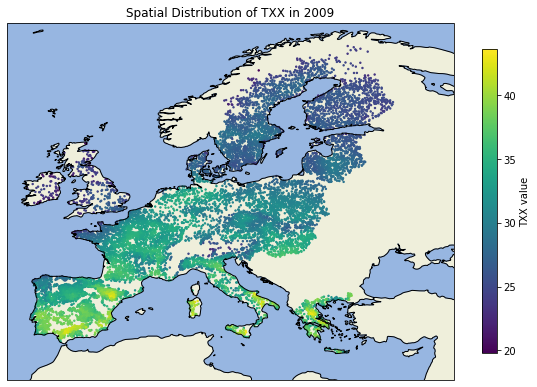

In [3]:
data = pd.read_csv('txx_soc.csv')


def plot_europe():
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.set_extent([-12, 38, 32, 72], crs=ccrs.PlateCarree())
    return ax

# 2009 年空间分布
ax = plot_europe()
scatter_2009 = ax.scatter(data['TH_LONG'], data['TH_LAT'], c=data['2009'], cmap='viridis', transform=ccrs.PlateCarree(),s=2)
plt.colorbar(scatter_2009, label='TXX value', shrink=0.7)
plt.title('Spatial Distribution of TXX in 2009')
plt.show()

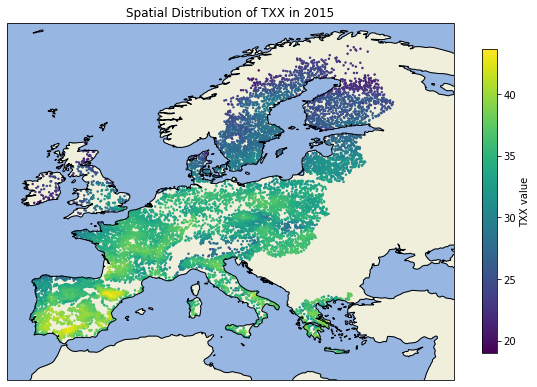

In [4]:
data = pd.read_csv('txx_soc.csv')


def plot_europe():
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.set_extent([-12, 38, 32, 72], crs=ccrs.PlateCarree())
    return ax

# 2009 年空间分布
ax = plot_europe()
scatter_2009 = ax.scatter(data['TH_LONG'], data['TH_LAT'], c=data['2015'], cmap='viridis', transform=ccrs.PlateCarree(),s=2)
plt.colorbar(scatter_2009, label='TXX value', shrink=0.7)
plt.title('Spatial Distribution of TXX in 2015')
plt.show()

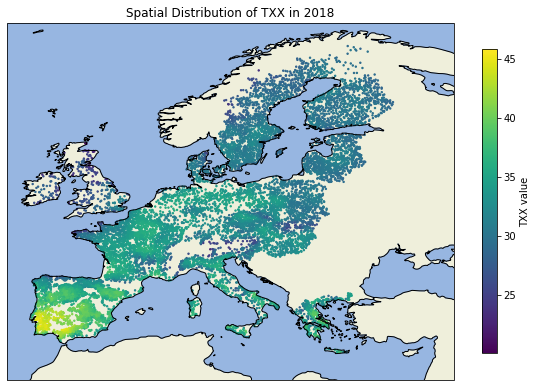

In [5]:
data = pd.read_csv('txx_soc.csv')


def plot_europe():
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.set_extent([-12, 38, 32, 72], crs=ccrs.PlateCarree())
    return ax

# 2009 年空间分布
ax = plot_europe()
scatter_2009 = ax.scatter(data['TH_LONG'], data['TH_LAT'], c=data['2018'], cmap='viridis', transform=ccrs.PlateCarree(),s=2)
plt.colorbar(scatter_2009, label='TXX value', shrink=0.7)
plt.title('Spatial Distribution of TXX in 2018')
plt.show()

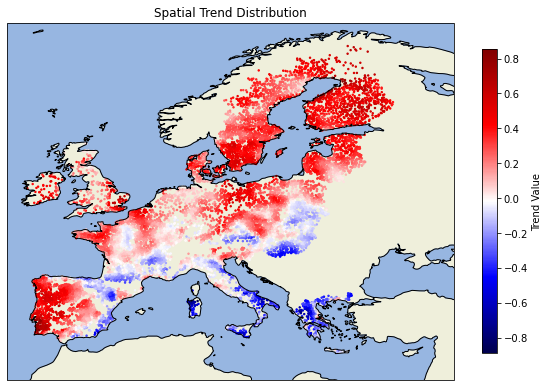

In [6]:
# 计算趋势（假设简单的线性趋势）
data['trend'] = (data['2018'] - data['2009']) / (2018 - 2009)

vmin = data['trend'].min()
vmax = data['trend'].max()
# 绘制点，并使用趋势值作为颜色
ax = plot_europe()
scatter = ax.scatter(data['TH_LONG'], data['TH_LAT'], c=data['trend'], cmap='seismic', transform=ccrs.PlateCarree(), s=2,vmin=vmin, vmax=vmax)
plt.colorbar(scatter, label='Trend Value', shrink=0.7, ax=ax)  # 添加 ax 参数
plt.title('Spatial Trend Distribution')
plt.show()

## 拟合函数大失败，别管了

In [48]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 读取包含站点经纬度信息的CSV文件
df_stations = pd.read_csv('bd_soc.csv', na_values=['< LOD','<0.0'])
# 提取18年没有缺测的数据
df_2018_complete = df_stations.dropna(subset=['OC_18', 'BDfine_0_2', 'coarse_vol'])

# 先检查并转换OC_18列的数据类型为float
if df_2018_complete['OC_18'].dtype.kind not in 'if':
    df_2018_complete['OC_18'] = df_2018_complete['OC_18'].astype('float')
# 同样，检查并转换BDfine_0_2列的数据类型为float（
if df_2018_complete['BDfine_0_2'].dtype.kind not in 'if':
    df_2018_complete['BDfine_0_2'] = df_2018_complete['BDfine_0_2'].astype('float')

# 定义指数函数模型
def exponential_func(x, a, b):
    return a * np.exp(b * x)

# 对BDfine_0_2进行拟合
x_data_bdfine = df_2018_complete['OC_18']
y_data_bdfine = df_2018_complete['BDfine_0_2']
popt_bdfine, pcov_bdfine = curve_fit(exponential_func, x_data_bdfine, y_data_bdfine)



c:\Users\86186\anaconda3\lib\site-packages\scipy\optimize\minpack.py:792: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
c:\Users\86186\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [ ]:
# 对coarse_vol进行拟合
x_data_coarse = df_2018_complete['OC_18']
y_data_coarse = df_2018_complete['coarse_vol']
popt_coarse, pcov_coarse = curve_fit(exponential_func, x_data_coarse, y_data_coarse)

In [46]:
popt_bdfine, pcov_bdfine ,popt_coarse, pcov_coarse

(array([-5.97700858e-13,  9.99999999e-01]),
 array([[inf, inf],
        [inf, inf]]),
 array([-5.97700858e-13,  9.99999999e-01]),
 array([[inf, inf],
        [inf, inf]]))

In [38]:
# 打印BDfine_0_2与OC_18的拟合方程
a_bdfine, b_bdfine = popt_bdfine
print("BDfine_0_2与OC_18的拟合方程为：y = {:.14f} * exp({:.14f} * x)".format(a_bdfine, b_bdfine))

# 打印coarse_vol与OC_18的拟合方程
a_coarse, b_coarse = popt_coarse
print("coarse_vol与OC_18的拟合方程为：y = {:.14f} * exp({:.14f} * x)".format(a_coarse, b_coarse))

BDfine_0_2与OC_18的拟合方程为：y = -0.00000000000060 * exp(0.99999999899505 * x)
coarse_vol与OC_18的拟合方程为：y = -0.00000000000060 * exp(0.99999999899505 * x)


In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 读取包含站点经纬度信息的CSV文件
df_stations = pd.read_csv('bd_soc.csv', na_values=['< LOD','<0.0'])
# 提取18年没有缺测的数据
df_2018_complete = df_stations.dropna(subset=['OC_18', 'BDfine_0_2', 'coarse_vol'])

# 先检查并转换OC_18列的数据类型为float
if df_2018_complete['OC_18'].dtype.kind not in 'if':
    df_2018_complete['OC_18'] = df_2018_complete['OC_18'].astype('float')
# 同样，检查并转换BDfine_0_2列的数据类型为float（
if df_2018_complete['BDfine_0_2'].dtype.kind not in 'if':
    df_2018_complete['BDfine_0_2'] = df_2018_complete['BDfine_0_2'].astype('float')

# 定义指数函数模型
def exponential_func(x, a, b):
    return a * np.exp(b * x)

# 对BDfine_0_2进行拟合
x_data_bdfine = df_2018_complete['OC_18']
y_data_bdfine = df_2018_complete['BDfine_0_2']
popt_bdfine, pcov_bdfine = curve_fit(exponential_func, x_data_bdfine, y_data_bdfine)

# 对coarse_vol进行拟合
x_data_coarse = df_2018_complete['OC_18']
y_data_coarse = df_2018_complete['coarse_vol']
popt_coarse, pcov_coarse = curve_fit(exponential_func, x_data_coarse, y_data_coarse)


# 先确保OC_18列中对应BDfine_0_2为缺测值的那些行的数据类型为float
df_stations.loc[df_stations['BDfine_0_2'].isna(), 'OC_18'] = df_stations.loc[df_stations['BDfine_0_2'].isna(), 'OC_18'].astype('float')

# 然后再执行填补18年BDfine_0_2缺测值的操作
df_stations.loc[df_stations['BDfine_0_2'].isna(), 'BDfine_0_2'] = exponential_func(
    df_stations.loc[df_stations['BDfine_0_2'].isna(), 'OC_18'], *popt_bdfine)


# 填补18年coarse_vol的缺测值
df_stations.loc[df_stations['coarse_vol'].isna(), 'coarse_vol'] = exponential_func(
    df_stations.loc[df_stations['coarse_vol'].isna(), 'OC_18'], *popt_coarse)

# 计算09年和15年的BDfine和coarse_vol

# 确保OC_09列的数据类型为float
df_stations['OC_09'] = df_stations['OC_09'].astype('float')
# 确保OC_15列的数据类型为float
df_stations['OC_15'] = df_stations['OC_15'].astype('float')

    
df_stations['BDfine_0_2_09'] = exponential_func(df_stations['OC_09'], *popt_bdfine)
df_stations['BDfine_0_2_15'] = exponential_func(df_stations['OC_15'], *popt_bdfine)
df_stations['coarse_vol_09'] = exponential_func(df_stations['OC_09'], *popt_coarse)
df_stations['coarse_vol_15'] = exponential_func(df_stations['OC_15'], *popt_coarse)

# 保存更新后的DataFrame为新的CSV文件
df_stations.to_csv('updated_bd_soc.csv', index=False)

# （可选）绘制拟合结果的可视化（仅针对18年完整数据的拟合情况）
plt.scatter(x_data_bdfine, y_data_bdfine, label='BDfine_0_2 data')
#plt.plot(x_data_bdfine, exponential_func(x_data_bdfine, *popt_bdfine), 'r', label='BDfine_0_2 fit')
#plt.scatter(x_data_coarse, y_data_coarse, label='coarse_vol data')
#plt.plot(x_data_coarse, exponential_func(x_data_coarse, *popt_coarse), 'g', label='coarse_vol fit')
plt.xlabel('OC_18')
plt.ylabel('Values')
plt.title('Exponential Fits for 2018 Data')
plt.legend()
plt.show()


c:\Users\86186\anaconda3\lib\site-packages\scipy\optimize\minpack.py:792: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
c:\Users\86186\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


PermissionError: [Errno 13] Permission denied: 'updated_bd_soc.csv'

## 分割1000个经纬度

In [1]:
import pandas as pd

# 读取原始CSV文件
original_df = pd.read_csv(r'D:\study\组会\DATA\SOC\lonlat点\lonlat_new.csv')

# 确定前15个文件每行的数量
rows_per_file = 1000

# 循环生成前15个CSV文件
for file_index in range(15):
    start_row = file_index * rows_per_file
    end_row = (file_index + 1) * rows_per_file
    subset_df = original_df.iloc[start_row:end_row]
    output_file_name = f'soc_lonlat_new_{file_index + 1}.csv'
    subset_df.to_csv(output_file_name, index=False)

# 生成最后一个CSV文件，包含剩余的行
last_start_row = 15 * rows_per_file
last_subset_df = original_df.iloc[last_start_row:]
last_output_file_name = 'soc_lonlat_16.csv'
last_subset_df.to_csv(last_output_file_name, index=False)

In [ ]:
import pandas as pd
import glob

# 获取文件夹内所有csv文件的路径
csv_files = glob.glob('/mnt/d/study/组会/data/SOC/soc_npp_point/new/*.csv')  # 这里假设你的csv文件都在当前工作目录下，如果不是，需替换为正确的文件夹路径

# 用于存储所有处理后的数据
combined_data = pd.DataFrame()

for file in csv_files:
    # 读取单个csv文件
    df = pd.read_csv(file)
    
    # 筛选出2009到2018年的数据
    df['Date'] = pd.to_datetime(df['Date'])
    selected_data = df[(df['Date'] >= '2009-01-01') & (df['Date'] <= '2018-01-01')]
    
    # 计算每个经纬度点在筛选时间段内的MOD17A3HGF_061_Npp_500m平均值
    mean_npp = selected_data.groupby(['ID', 'Latitude', 'Longitude'])['MOD17A3HGF_061_Npp_500m'].mean().reset_index()
    mean_npp.rename(columns={'MOD17A3HGF_061_Npp_500m': 'Average_NPP_2009_2018'}, inplace=True)
    
    # 仅保留需要的列
    result = mean_npp[['ID', 'Latitude', 'Longitude', 'Average_NPP_2009_2018']]
    
    # 将结果合并到总的数据中
    combined_data = pd.concat([combined_data, result], ignore_index=True)

# 将合并后的数据输出为新的csv文件
combined_data.to_csv('/mnt/d/study/组会/data/SOC/soc_npp_point/new/combined.csv', index=False)


## 合并npp

In [1]:
#按照两个csv，其中一个属性为ID，Latitude，Longitude，Average_NPP_2009_2018
#另一个属性分别为：
import pandas as pd

# 读取 xlsx 文件
df1 = pd.read_csv(r'bd_soc.csv')
df2 = pd.read_csv(r'D:\study\组会\DATA\SOC\soc_npp_point\combined.csv')

# 选择需要的列
merged_df = df1.merge(df2, on='POINT_ID', how='left')

# 将结果保存为新的 CSV 文件
merged_df.to_csv('bd_npp_soc.csv', index=False)

## 提取各种土壤属性、高程、土地利用

### _09 _15 _18版本

In [11]:
import pandas as pd

# 读取 xlsx 文件

df09 = r'D:\study\组会\DATA\SOC\LUCAS\2009.csv'
df15 = r'D:\study\组会\DATA\SOC\LUCAS\2015.csv'
df18 = r'D:\study\组会\DATA\SOC\LUCAS\2018.csv'

# 三年的CSV文件名列表
csv_files = [df09, df15, df18]
# 指定的共同列名（用于匹配数据的ID列）
id_column = "POINT_ID"
# 要提取的列名列表
columns_to_extract = ["Elevation", "Coarse", "Clay", "Silt", "Sand","pH_CaCl2","pH_H2O","LC","LU",'P','N','K','CaCO3','slope','EC']

# 用于存储每个文件读取并处理后的数据
data_frames = []

# 遍历每一年的CSV文件
for index, file in enumerate(csv_files):
    year = file[-6:-4]  # 获取年份信息，用于后续列名重命名
    df = pd.read_csv(file)
    # 提取指定的列（包含ID列和要提取的属性列）
    extracted_data = df[[id_column] + columns_to_extract]
    # 对提取出来的列进行重命名，添加年份后缀
    extracted_data.rename(columns={col: col + "_" + year for col in columns_to_extract}, inplace=True)
    data_frames.append(extracted_data)

# 先合并前两个数据框
merged_data = pd.merge(data_frames[0], data_frames[1], on=id_column, how='outer')
# 再将合并后的结果与第三个数据框合并
merged_data = pd.merge(merged_data, data_frames[2], on=id_column, how='outer')

# 将最终合并的数据保存为新的CSV文件
merged_data.to_csv("D:\study\组会\DATA\SOC\LUCAS\merged_data.csv", index=False)

C:\Users\86186\AppData\Local\Temp\ipykernel_22768\2969945575.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data.rename(columns={col: col + "_" + year for col in columns_to_extract}, inplace=True)
C:\Users\86186\AppData\Local\Temp\ipykernel_22768\2969945575.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data.rename(columns={col: col + "_" + year for col in columns_to_extract}, inplace=True)
C:\Users\86186\AppData\Local\Temp\ipykernel_22768\2969945575.py:22: DtypeWarning: Columns (6,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:

In [8]:
import pandas as pd

# 读取 xlsx 文件

df09 = r'D:\study\组会\DATA\SOC\SOC_2009_new.csv'
df15 = r'D:\study\组会\DATA\SOC\SOC_2015.csv'
df18 = r'D:\study\组会\DATA\SOC\SOC_2018.csv'

# 三年的CSV文件名列表
csv_files = [df09, df15, df18]
# 指定的共同列名（用于匹配数据的ID列）
id_column = "POINT_ID"
# 要提取的列名列表
columns_to_extract = ["Elevation", "Coarse", "Clay", "Silt", "Sand","pH_CaCl2","pH_H2O","LC","LU",'P','N','K','CaCO3','slope','EC']

# 用于存储每个文件读取并处理后的数据
data_frames = []

# 遍历每一年的CSV文件
for index, file in enumerate(csv_files):
    year = file[-6:-4]  # 获取年份信息，用于后续列名重命名
    df = pd.read_csv(file)
    # 提取指定的列（包含ID列和要提取的属性列）
    extracted_data = df[[id_column] + columns_to_extract]
    # 对提取出来的列进行重命名，添加年份后缀
    extracted_data.rename(columns={col: col + "_" + year for col in columns_to_extract}, inplace=True)
    data_frames.append(extracted_data)

# 先合并前两个数据框
merged_data = pd.merge(data_frames[0], data_frames[1], on=id_column, how='outer')
# 再将合并后的结果与第三个数据框合并
merged_data = pd.merge(merged_data, data_frames[2], on=id_column, how='outer')

# 将最终合并的数据保存为新的CSV文件
merged_data.to_csv("D:\study\组会\DATA\SOC\SOC_merged_data.csv", index=False)

C:\Users\86186\AppData\Local\Temp\ipykernel_2652\115235857.py:22: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\86186\AppData\Local\Temp\ipykernel_2652\115235857.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data.rename(columns={col: col + "_" + year for col in columns_to_extract}, inplace=True)
C:\Users\86186\AppData\Local\Temp\ipykernel_2652\115235857.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data.rename(columns={col: col + "_" + year for col in columns_to_extract}, inplace=True)
C:\Users\8618

### time 和 变量名 版本

In [12]:
import os
import pandas as pd

# 三个CSV文件的路径
file_2009 = r'D:\study\组会\DATA\SOC\LUCAS\2009.csv'
file_2015 = r'D:\study\组会\DATA\SOC\LUCAS\2015.csv'
file_2018 = r'D:\study\组会\DATA\SOC\LUCAS\2018.csv'

csv_files = [file_2009, file_2015, file_2018]

# 指定共同的ID列和需要提取的变量列
id_column = "POINT_ID"
columns_to_extract = ["Elevation", "Coarse", "Clay", "Silt", "Sand", "pH_CaCl2", "pH_H2O",
                      "LC", "LU", "P", "N", "K", "CaCO3", "slope", "EC"]

data_frames = []

for file in csv_files:
    # 从文件名中提取年份信息（假设文件名的前4位是年份）
    basename = os.path.basename(file)
    year = basename[:4]
    
    # 读取CSV文件
    df = pd.read_csv(file)
    
    # 提取ID列和指定变量列，并复制数据
    extracted_data = df[[id_column] + columns_to_extract].copy()
    
    # 添加一个 time 列，用于记录年份（转换为整型）
    extracted_data["time"] = int(year)
    
    data_frames.append(extracted_data)

# 将所有年份的数据纵向合并
merged_data = pd.concat(data_frames, ignore_index=True)

# 输出到新的CSV文件
output_file = r"D:\study\组会\DATA\SOC\LUCAS\soc_merge_att.csv"
merged_data.to_csv(output_file, index=False)

print(f"数据合并完成，结果保存为 {output_file}")


C:\Users\86186\AppData\Local\Temp\ipykernel_22768\3269654184.py:24: DtypeWarning: Columns (6,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


数据合并完成，结果保存为 D:\study\组会\DATA\SOC\LUCAS\soc_merge_att.csv


## BD 融合三年的土壤属性进行处理

In [10]:
import pandas as pd
import numpy as np

merged_data = pd.read_csv(r'D:\study\组会\DATA\SOC\SOC_merged_data.csv')

# 将 '< LOD' 定义为缺测值（替换为 np.nan）
merged_data.replace('< LOD', np.nan, inplace=True)
merged_data.replace('<0.0', np.nan, inplace=True)

# 定义要处理的列名
columns_to_extract = ['LC', 'LU', 'Elevation', 'Coarse', 'Clay', 'Silt', 'Sand', 'pH_CaCl2', 'pH_H2O', 'P', 'N', 'K', 'CaCO3', 'slope', 'EC']

# 用于存储处理后的平均数据列
new_columns_data = {}
# 遍历要处理的列名
for col in columns_to_extract:
    col_09 = col + "_ew"
    col_15 = col + "_15"
    col_18 = col + "_18"
    if col in ["LC", "LU"]:
        # 对于 'LC'、'LU' 列，先以 _18 为准填充，_18 有缺测值的再填充 _15，再有缺测再填充 _09
        merged_data[col] = merged_data[col_18].combine_first(merged_data[col_15]).combine_first(merged_data[col_09])
    elif col in ["Elevation", "Coarse", "Clay", "Silt", "Sand", "pH_CaCl2", "pH_H2O", 'P', 'N', 'K', 'CaCO3', 'slope', 'EC']:
        # 对于数值型列，先将列转换为数值类型
        if col_09 in merged_data.columns and col_15 in merged_data.columns and col_18 in merged_data.columns:
            for col_name in [col_09, col_15, col_18]:
                merged_data[col_name] = pd.to_numeric(merged_data[col_name], errors='coerce')
            new_columns_data[col] = merged_data[[col_09, col_15, col_18]].mean(axis=1, skipna=True)
        else:
            print(f"列 {col_09} 或 {col_15} 或 {col_18} 不存在于数据框中。")

# 将新计算的平均数据列添加到数据框中
for col, data in new_columns_data.items():
    merged_data[col] = data

# 只保留处理后的列（去掉带年份后缀的原始列）
merged_data = merged_data[["POINT_ID"] + columns_to_extract]

# 将最终处理的数据保存为新的CSV文件
merged_data.to_csv(r"D:\study\组会\DATA\SOC\processed_merged_data.csv", index=False)

C:\Users\86186\AppData\Local\Temp\ipykernel_2652\3488362324.py:4: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_data = pd.read_csv(r'D:\study\组会\DATA\SOC\SOC_merged_data.csv')


## 协变量和自变量融合

In [1]:
import pandas as pd

# 读取 xlsx 文件
df1 = pd.read_csv(r'bd_id_all.csv')
df2 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\processed_merged_data.csv')

# 选择需要的列
merged_df = df1.merge(df2, on='POINT_ID', how='left')

# 将结果保存为新的 CSV 文件
merged_df.to_csv('soil_bd_npp_soc.csv', index=False)

: 

## 填补

In [6]:
import pandas as pd

# 读取 xlsx 文件
df1 = pd.read_csv(r'D:\study\组会\DATA\point_dem\combined.csv')
df2 = pd.read_csv(r'soil_bd_npp_soc.csv')

# 通过 ID 进行合并，并用 df1 的 Elevation 填补 df2 中的 Elevation
df2 = df2.merge(df1[['POINT_ID', 'Elevation']], on='POINT_ID', how='left', suffixes=('', '_new'))
df2['Elevation'] = df2['Elevation'].fillna(df2['Elevation_new'])

# 删除辅助列
df2.drop(columns=['Elevation_new'], inplace=True)

# 保存为新的 CSV 文件
df2.to_csv(r'D:\study\组会\DATA\SOC\LUCAS\dem_filled.csv', index=False)


In [2]:
import pandas as pd

# 读取 xlsx 文件
df1 = pd.read_csv(r'D:\study\组会\DATA\SOC\P\P_fill.csv')
df2 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\dem_filled.csv')

# 通过 ID 进行合并，并用 df1 的 Elevation 填补 df2 中的 Elevation
df2 = df2.merge(df1[['POINT_ID', 'P']], on='POINT_ID', how='left', suffixes=('', '_new'))
df2['P'] = df2['P'].fillna(df2['P_new'])

# 删除辅助列
df2.drop(columns=['P_new'], inplace=True)

# 保存为新的 CSV 文件
df2.to_csv(r'D:\study\组会\DATA\SOC\LUCAS\P_filled.csv', index=False)


In [3]:
import pandas as pd

# 读取 xlsx 文件
df1 = pd.read_csv(r'D:\study\组会\DATA\SOC\Caco3\CacO3_fill.csv')
df2 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\P_filled.csv')

# 通过 ID 进行合并，并用 df1 的 Elevation 填补 df2 中的 Elevation
df2 = df2.merge(df1[['POINT_ID', 'CaCO3']], on='POINT_ID', how='left', suffixes=('', '_new'))
df2['CaCO3'] = df2['CaCO3'].fillna(df2['CaCO3_new'])

# 删除辅助列
df2.drop(columns=['CaCO3_new'], inplace=True)

# 保存为新的 CSV 文件
df2.to_csv(r'D:\study\组会\DATA\SOC\LUCAS\CaCO3_filled.csv', index=False)


In [4]:
import pandas as pd

# 读取 xlsx 文件
df1 = pd.read_csv(r'D:\study\组会\DATA\SOC\Topsoil physical properties\CoarseFragments_Extra\Coarse_fill.csv')
df2 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\CaCO3_filled.csv')

# 通过 ID 进行合并，并用 df1 的 Elevation 填补 df2 中的 Elevation
df2 = df2.merge(df1[['POINT_ID', 'Coarse']], on='POINT_ID', how='left', suffixes=('', '_new'))
df2['Coarse'] = df2['Coarse'].fillna(df2['Coarse_new'])

# 删除辅助列
df2.drop(columns=['Coarse_new'], inplace=True)

# 保存为新的 CSV 文件
df2.to_csv(r'D:\study\组会\DATA\SOC\LUCAS\Coarse_filled.csv', index=False)


In [5]:
import pandas as pd

# 读取 xlsx 文件
df1 = pd.read_csv(r'D:\study\组会\DATA\SOC\Topsoil physical properties\Clay_Extra\Clay_fill.csv')
df2 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\Coarse_filled.csv')

# 通过 ID 进行合并，并用 df1 的 Clay、Silt、Sand 填补 df2 中的缺失值
df2 = df2.merge(df1[['POINT_ID', 'Clay', 'Silt', 'Sand']], on='POINT_ID', how='left', suffixes=('', '_new'))

# 依次填补 Clay、Silt、Sand 的缺失值
for col in ['Clay', 'Silt', 'Sand']:
    df2[col] = df2[col].fillna(df2[f'{col}_new'])

# 删除合并后多出的列
df2.drop(columns=['Clay_new', 'Silt_new', 'Sand_new'], inplace=True)

# 保存为新的 CSV 文件
df2.to_csv(r'D:\study\组会\DATA\SOC\LUCAS\Clay_filled.csv', index=False)


In [10]:
import pandas as pd

# 读取 xlsx 文件
df1 = pd.read_csv(r'D:\study\组会\DATA\SOC\soc_npp_point\new\combined.csv')
df2 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\Clay_filled.csv')

# 通过 ID 进行合并，并用 df1 的 Clay、Silt、Sand 填补 df2 中的缺失值
df2 = df2.merge(df1[['POINT_ID', 'NPP']], on='POINT_ID', how='left', suffixes=('', '_new'))

df2['NPP'] = df2['NPP'].fillna(df2['NPP_new'])

# 删除辅助列
df2.drop(columns=['NPP_new'], inplace=True)

# 保存为新的 CSV 文件
df2.to_csv(r'D:\study\组会\DATA\SOC\LUCAS\NPP_filled.csv', index=False)


In [11]:
import pandas as pd

# 读取 xlsx 文件
df1 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\merged_data.csv')
df2 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\NPP_filled.csv')

# 通过 ID 进行合并，并用 df1 的 Clay、Silt、Sand 填补 df2 中的缺失值
df2 = df2.merge(df1[['POINT_ID', 'CEC']], on='POINT_ID', how='left', suffixes=('', '_new'))

df2['CEC'] = df2['CEC'].fillna(df2['CEC_new'])

# 删除辅助列
df2.drop(columns=['CEC_new'], inplace=True)

# 保存为新的 CSV 文件
df2.to_csv(r'D:\study\组会\DATA\SOC\LUCAS\CEC_filled.csv', index=False)


In [16]:
import pandas as pd

# 读取 xlsx 文件
df1 = pd.read_csv(r'D:\study\组会\DATA\SOC\CEC\CEC_fill1.csv')
df2 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\CEC_filled.csv')

# 通过 ID 进行合并，并用 df1 的 Clay、Silt、Sand 填补 df2 中的缺失值
df2 = df2.merge(df1[['POINT_ID', 'CEC']], on='POINT_ID', how='left', suffixes=('', '_new'))

df2['CEC'] = df2['CEC'].fillna(df2['CEC_new'])

# 删除辅助列
df2.drop(columns=['CEC_new'], inplace=True)

# 保存为新的 CSV 文件
df2.to_csv(r'D:\study\组会\DATA\SOC\LUCAS\CEC_filled.csv', index=False)


In [14]:
import pandas as pd
import numpy as np

# 读取 CSV 文件
df = pd.read_csv('D:\study\组会\DATA\SOC\LUCAS\merged_data.csv')

# 计算 EC_18 和 EC_15 的 nanmean，忽略 NaN 值
df['EC'] = df[['EC_18', 'EC_15']].apply(lambda row: np.nanmean(row), axis=1)

# 输出新的 CSV 文件
df.to_csv('D:\study\组会\DATA\SOC\LUCAS\merged_data.csv', index=False)


C:\Users\86186\AppData\Local\Temp\ipykernel_9112\1899763379.py:8: RuntimeWarning: Mean of empty slice
  df['EC'] = df[['EC_18', 'EC_15']].apply(lambda row: np.nanmean(row), axis=1)


In [19]:
import pandas as pd
import numpy as np

# 读取 CSV 文件
df = pd.read_csv('D:\study\组会\DATA\SOC\LUCAS\merged_data.csv')

# 计算 EC_18 和 EC_15 的 nanmean，忽略 NaN 值
df['Elevation'] = df[['Elevation_18', 'Elevation_15','Elevation_09']].apply(lambda row: np.nanmean(row), axis=1)

# 输出新的 CSV 文件
df.to_csv('D:\study\组会\DATA\SOC\LUCAS\merged_data.csv', index=False)


C:\Users\86186\AppData\Local\Temp\ipykernel_9112\4086867894.py:8: RuntimeWarning: Mean of empty slice
  df['Elevation'] = df[['Elevation_18', 'Elevation_15','Elevation_09']].apply(lambda row: np.nanmean(row), axis=1)


In [1]:
import pandas as pd

# 读取 xlsx 文件
df1 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\merged_data.csv')
df2 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\CEC_filled.csv')

# 通过 ID 进行合并，并用 df1 的 Clay、Silt、Sand 填补 df2 中的缺失值
df2 = df2.merge(df1[['POINT_ID', 'Elevation']], on='POINT_ID', how='left', suffixes=('', '_new'))

df2['Elevation'] = df2['Elevation'].fillna(df2['Elevation_new'])

# 删除辅助列
df2.drop(columns=['Elevation_new'], inplace=True)

# 保存为新的 CSV 文件
df2.to_csv(r'D:\study\组会\DATA\SOC\LUCAS\CEC_filled.csv', index=False)


In [2]:
import pandas as pd

# 读取 CSV 文件
df1 = pd.read_csv(r'D:\study\组会\DATA\point_dem\combined.csv')
df2 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\CEC_filled.csv')

# 通过 ID 进行合并，并用 df1 的 Elevation 填补 df2 中的缺失值
df2 = df2.merge(df1[['POINT_ID', 'Elevation']], on='POINT_ID', how='left', suffixes=('', '_new'))

# **仅填补 df2['Elevation'] 为空的值**
df2.loc[df2['Elevation'].isna(), 'Elevation'] = df2['Elevation_new']

# 删除辅助列
df2.drop(columns=['Elevation_new'], inplace=True)

# 保存为新的 CSV 文件
df2.to_csv(r'D:\study\组会\DATA\SOC\LUCAS\CEC_filled.csv', index=False)


In [3]:
import pandas as pd

# 读取 CSV 文件
df1 = pd.read_csv(r'D:\study\组会\DATA\SOC\ESDB-Raster-Library-1k-GeoTIFF-20240507\SLOPEDO\slope_fill.csv')
df2 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\CEC_filled.csv')

# 通过 ID 进行合并，并用 df1 的 Elevation 填补 df2 中的缺失值
df2 = df2.merge(df1[['POINT_ID', 'Slope']], on='POINT_ID', how='left', suffixes=('', '_new'))

# **仅填补 df2['Elevation'] 为空的值**
df2.loc[df2['Slope'].isna(), 'Slope'] = df2['Slope_new']

# 删除辅助列
df2.drop(columns=['Slope_new'], inplace=True)

# 保存为新的 CSV 文件
df2.to_csv(r'D:\study\组会\DATA\SOC\LUCAS\Slope_filled.csv', index=False)


In [2]:
import pandas as pd

# 读取 xlsx 文件
df1 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\BD\BD.csv')
df2 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\Slope_filled.csv')

# 通过 ID 进行合并，并用 df1 的 Clay、Silt、Sand 填补 df2 中的缺失值
df2 = df2.merge(df1[['POINT_ID', 'BD', 'CV']], on='POINT_ID', how='left', suffixes=('', '_new'))

# 依次填补 Clay、Silt、Sand 的缺失值
for col in ['BD', 'CV']:
    df2[col] = df2[col].fillna(df2[f'{col}_new'])

# 删除合并后多出的列
df2.drop(columns=['BD_new', 'CV_new'], inplace=True)

# 保存为新的 CSV 文件
df2.to_csv(r'D:\study\组会\DATA\SOC\LUCAS\BD_filled.csv', index=False)

In [2]:
import pandas as pd

# 读取 CSV 文件
df1 = pd.read_csv(r'D:\study\组会\DATA\HWSD\EC_nan_fill.csv')
df2 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\BD_filled_select.csv')

# 通过 ID 进行合并，并用 df1 的 Elevation 填补 df2 中的缺失值
df2 = df2.merge(df1[['ID', 'EC']], on='ID', how='left', suffixes=('', '_new'))

# **仅填补 df2['Elevation'] 为空的值**
df2.loc[df2['EC'].isna(), 'EC'] = df2['EC_new']

# 删除辅助列
df2.drop(columns=['EC_new'], inplace=True)

# 保存为新的 CSV 文件
df2.to_csv(r'D:\study\组会\DATA\SOC\LUCAS\BD_filled_select1.csv', index=False)


In [2]:
import pandas as pd

# 读取 CSV 文件
df1 = pd.read_csv(r'G:\NASADEM_EU\Slope_fill.csv')
df2 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\BD_filled_select1.csv')

# 通过 ID 进行合并，获取 df1 中的 Slope
df2 = df2.merge(df1[['ID', 'Slope']], on='ID', how='left', suffixes=('_old', '_new'))

# 用 df1 的 Slope 完全覆盖 df2 中的对应 ID 的 Slope
df2['Slope'] = df2['Slope_new'].combine_first(df2['Slope_old'])

# 删除辅助列
df2.drop(columns=['Slope_old', 'Slope_new'], inplace=True, errors='ignore')

# 保存为新的 CSV 文件
df2.to_csv(r'D:\study\组会\DATA\SOC\LUCAS\BD_filled_select2.csv', index=False)

In [1]:
import pandas as pd

# 读取 CSV 文件
df1 = pd.read_csv(r'D:\study\组会\DATA\SOC\GLASS_NPP_EU_UK_Data\npp_fill.csv')
df2 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\BD_filled_select.csv')

# 通过 ID 进行合并，获取 df1 中的 Slope
df2 = df2.merge(df1[['ID', 'NPP']], on='ID', how='left', suffixes=('_old', '_new'))

# 用 df1 的 Slope 完全覆盖 df2 中的对应 ID 的 Slope
df2['NPP'] = df2['NPP_new'].combine_first(df2['NPP_old'])

# 删除辅助列
df2.drop(columns=['NPP_old', 'NPP_new'], inplace=True, errors='ignore')

# 保存为新的 CSV 文件
df2.to_csv(r'D:\study\组会\DATA\SOC\LUCAS\BD_filled_select2.csv', index=False)

In [14]:
import pandas as pd

# 读取 CSV 文件
df1 = pd.read_csv(r'D:\study\组会\DATA\SOC\GLASS_NPP_TIFF\npp_2009_fill.csv')
df2 = pd.read_csv(r'D:\study\组会\DATA\SOC\soc_2009_complete.csv')

# 通过 ID 进行合并，获取 df1 中的 Slope
df2 = df2.merge(df1[['ID', 'NPP']], on='ID', how='left', suffixes=('_old', '_new'))

# 用 df1 的 Slope 完全覆盖 df2 中的对应 ID 的 Slope
df2['NPP'] = df2['NPP_new'].combine_first(df2['NPP_old'])

# 删除辅助列
df2.drop(columns=['NPP_old', 'NPP_new'], inplace=True, errors='ignore')

# 保存为新的 CSV 文件
df2.to_csv(r'D:\study\组会\DATA\SOC\soc_2009_complete_1.csv', index=False)

In [15]:
import pandas as pd

# 读取 CSV 文件
df1 = pd.read_csv(r'D:\study\组会\DATA\SOC\GLASS_NPP_TIFF\npp_2015_fill.csv')
df2 = pd.read_csv(r'D:\study\组会\DATA\SOC\soc_2015_complete.csv')

# 通过 ID 进行合并，获取 df1 中的 Slope
df2 = df2.merge(df1[['ID', 'NPP']], on='ID', how='left', suffixes=('_old', '_new'))

# 用 df1 的 Slope 完全覆盖 df2 中的对应 ID 的 Slope
df2['NPP'] = df2['NPP_new'].combine_first(df2['NPP_old'])

# 删除辅助列
df2.drop(columns=['NPP_old', 'NPP_new'], inplace=True, errors='ignore')

# 保存为新的 CSV 文件
df2.to_csv(r'D:\study\组会\DATA\SOC\soc_2015_complete_1.csv', index=False)

In [16]:
import pandas as pd

# 读取 CSV 文件
df1 = pd.read_csv(r'D:\study\组会\DATA\SOC\GLASS_NPP_TIFF\npp_2018_fill.csv')
df2 = pd.read_csv(r'D:\study\组会\DATA\SOC\soc_2018_complete.csv')

# 通过 ID 进行合并，获取 df1 中的 Slope
df2 = df2.merge(df1[['ID', 'NPP']], on='ID', how='left', suffixes=('_old', '_new'))

# 用 df1 的 Slope 完全覆盖 df2 中的对应 ID 的 Slope
df2['NPP'] = df2['NPP_new'].combine_first(df2['NPP_old'])

# 删除辅助列
df2.drop(columns=['NPP_old', 'NPP_new'], inplace=True, errors='ignore')

# 保存为新的 CSV 文件
df2.to_csv(r'D:\study\组会\DATA\SOC\soc_2018_complete_1.csv', index=False)

## 提取cn05每个点的年平均温度，年降水量

In [3]:
#这一部分要用到栅格，所以在linux跑
import xarray as xr
import pandas as pd

# 读取包含站点经纬度信息的CSV文件
df_stations = pd.read_csv(r'SOC拆分.csv')

# 使用xarray打开温度数据的nc文件
ds_temperature = xr.open_dataset(r'G:/ERA5-ECI/tmm_ANN_era5_land_only_0p09_deg_1981_2019.nc')
# 使用xarray打开降水数据的nc文件
ds_precipitation = xr.open_dataset(r'G:/ERA5-ECI/prcptot_ANN_era5_land_only_0p09_deg_1981_2019.nc')

# 选择温度数据和降水数据在目标年份范围（2009 - 2018年）内的数据
ds_temperature_target_years = ds_temperature.sel(time=slice('2009', '2018'))
ds_precipitation_target_years = ds_precipitation.sel(time=slice('2009', '2018'))

# 用于存储每个站点平均温度的列表
average_temperature_list = []
# 用于存储每个站点平均降水的列表
average_precipitation_list = []

for index, row in df_stations.iterrows():
    station_lat = row['TH_LAT_x']
    station_lon = row['TH_LONG_x']
    # 提取对应站点位置在目标年份范围内的温度数据并计算平均温度
    temperature_values = ds_temperature_target_years.sel(lat=station_lat, lon=station_lon, method='nearest',dropna=True)['tmm'].values
    average_temperature = temperature_values[temperature_values == temperature_values].mean()
    average_temperature_list.append(average_temperature)

    # 提取对应站点位置在目标年份范围内的降水数据并计算平均降水
    precipitation_values = ds_precipitation_target_years.sel(lat=station_lat, lon=station_lon, method='nearest',dropna=True)['prcptot'].values
    average_precipitation = precipitation_values[precipitation_values == precipitation_values].mean()
    average_precipitation_list.append(average_precipitation)


# 将平均温度列和平均降水列添加到DataFrame中
df_stations['Average_Temperature_2009_2018'] = average_temperature_list
df_stations['Average_Precipitation_2009_2018'] = average_precipitation_list

# 将更新后的DataFrame保存为新的CSV文件
#df_stations.to_csv('/mnt/d/study/组会/data/SOC/tm_pre_soc.csv', index=False)

KeyError: "'dropna' is not a valid dimension or coordinate"

## 修改阶段

### 拆分SOC

把所有变量都弄进来太大了跑不出来，就先只保留了ID和SOC

In [2]:
import pandas as pd

def reshape_long_format(input_csv, output_csv, variables):
    """
    将多个变量的不同年份列转换成长格式，每个变量单独占一列
    :param input_csv: 输入 CSV 文件名
    :param output_csv: 输出 CSV 文件名
    :param variables: 需要转换的变量名称列表，如 ["SOC", "pH"]
    """
    # 读取原始 CSV 数据
    df = pd.read_csv(input_csv,na_values=['< LOD','<0.0'])

    # 构建需要转换的列名映射
    melt_columns = []
    for var in variables:
        melt_columns.extend([f"{var}_09", f"{var}_15", f"{var}_18"])

    # 找出非时间序列的属性列
    id_vars = [col for col in df.columns if col not in melt_columns]

    # 使用 melt 函数转换数据格式
    df_long = df.melt(id_vars=id_vars, 
                       value_vars=melt_columns, 
                       var_name="Variable", 
                       value_name="Value")

    # 提取年份信息
    df_long["time"] = df_long["Variable"].str.extract(r'_(\d+)$').astype(int) + 2000
    df_long["Variable"] = df_long["Variable"].str.extract(r'^(.+)_\d+$')[0]  # 提取变量名称

# 现在以 ["ID", "time"] 作为 index 进行透视，保留缺失值
    df_pivot = df_long.pivot_table(index=["POINT_ID", "time"],
                                   columns="Variable",
                                   values="Value",
                                   dropna=False).reset_index()
    
    # 清理列层级
    df_pivot.columns.name = None
    df_pivot = df_pivot.sort_values(by=["POINT_ID", "time"])  # 按 ID 和时间排序

    # 保存为新的 CSV 文件
    df_pivot.to_csv(output_csv, index=False)
    print(f"转换完成，已保存为 {output_csv}")


In [ ]:
reshape_long_format("SOC拆分.csv", "SOC拆分后.csv", variables=["OC"])

然后再把太大了没弄过进来的东西弄进来 LON LAT NPP TM PRE

### 把2009old和2009new合并

In [6]:
import pandas as pd

# 读取两个 CSV 文件
df_old = pd.read_excel(r"D:\study\组会\DATA\SOC\LUCAS\2009old.xlsx",na_values='NE')
df_new = pd.read_excel(r"D:\study\组会\DATA\SOC\LUCAS\2009new.xlsx")

df_all = pd.merge(df_old, df_new, on="sample_ID", how="outer",suffixes=("", "_new"))

# 遍历相同列（带 "_new" 后缀的列），合并数据
for col in df_new.columns:
    if col != "sample_ID" and col in df_old.columns:
        df_all[col] = df_all[col].combine_first(df_all[col + "_new"])
        df_all.drop(columns=[col + "_new"], inplace=True)  # 删除带 "_new" 后缀的列


# 将合并后的结果保存为新的 CSV 文件
df_all.to_csv(r"D:\study\组会\DATA\SOC\LUCAS\2009all.csv", index=False)

print("合并完成，结果已保存为 2009all.csv")


合并完成，结果已保存为 2009all.csv


: 

2015的slope和lonlat需要重新弄进去

In [10]:
import pandas as pd

# 读取 xlsx 文件
df1 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\2015_lonlat.csv')
df2 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\2015\LUCAS2015_AncillaryData_20201007.csv')
df3 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\2015.csv')

# 合并三个数据帧基于共同的 POINT_ID 属性
merged_df = pd.merge(df1, df2, on='POINT_ID', how='inner')
merged_df = pd.merge(merged_df, df3, on='POINT_ID', how='inner')

#选择需要的列
result_df = merged_df[['POINT_ID', 'Coarse','Clay','Sand','Silt','pH_CaCl2','pH_H2O','EC','OC','CaCO3','P'	,'N','K','Elevation','LC','LU','Soil_Stones','NUTS_0','NUTS_1','NUTS_2','NUTS_3','LC1_Desc','LU1_Desc','slope','LON','LAT']]

# 将结果保存为新的 CSV 文件
result_df.to_csv(r'D:\study\组会\DATA\SOC\LUCAS\2015_new.csv', index=False)

### 补全被筛选掉的

In [8]:
import pandas as pd


# 文件路径
file_2009 = r'D:\study\组会\DATA\SOC\LUCAS\2009.csv'
file_2015 = r'D:\study\组会\DATA\SOC\LUCAS\2015.csv'
file_2018 = r'D:\study\组会\DATA\SOC\LUCAS\2018.csv'
integrated_file = r'SOC拆分后.csv'

# 读取整合后的数据
df_integrated = pd.read_csv(integrated_file)

# 定义年份和对应的文件路径
year_files = {
    2009: file_2009,
    2015: file_2015,
    2018: file_2018
}

result_dfs = []

for year, file in year_files.items():
    # 读取对应年份的单独数据文件
    df_year = pd.read_csv(file)
    
    # 从整合数据中筛选出该年份的记录
    df_int_year = df_integrated[df_integrated["time"] == year]
    integrated_ids = set(df_int_year["POINT_ID"])
    
    # 筛选出该年份数据中，ID不在整合数据中的行
    df_unique = df_year[~df_year["POINT_ID"].isin(integrated_ids)].copy()
    
    # 增加time列，表示该年份
    df_unique["time"] = year
    
    # 只保留 ID, SOC, time 列
    df_unique = df_unique[["POINT_ID", "OC", "time"]]
    
    result_dfs.append(df_unique)

# 将三个年份的数据纵向合并
df_result = pd.concat(result_dfs, ignore_index=True)

# 输出到新的CSV文件
output_file = r'D:\study\组会\DATA\SOC\LUCAS\new_soc.csv'
df_result.to_csv(output_file, index=False)

print(f"筛选完成，结果已保存到 {output_file}")



筛选完成，结果已保存到 D:\study\组会\DATA\SOC\LUCAS\new_soc.csv


C:\Users\86186\AppData\Local\Temp\ipykernel_24304\2399663831.py:24: DtypeWarning: Columns (6,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_year = pd.read_csv(file)


### 把补全的和原本的合成一个 用于BD

在excel里手动复制到一起 但是新加的没有经纬度 加一下经纬度

In [15]:
import pandas as pd

# 读取 POINT_ID 列
df_points = pd.read_excel(r"bd_id.xls")

# 读取包含 LON 和 LAT 的三个 CSV
df1 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\2009.csv')
df2 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\2015.csv')
df3 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\2018.csv')

# 合并三个 CSV（纵向合并），去重确保唯一性
df_lons_lats = pd.concat([df1, df2, df3]).drop_duplicates(subset="POINT_ID", keep="first")

# 以 POINT_ID 作为键，合并数据
df_merged = df_points.merge(df_lons_lats, on="POINT_ID", how="left")

# 保存合并后的 CSV
df_merged.to_csv("bd_id_all.csv", index=False)



C:\Users\86186\AppData\Local\Temp\ipykernel_22768\1244731978.py:9: DtypeWarning: Columns (6,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\2018.csv')


In [20]:
import pandas as pd

# 读取 POINT_ID 列
df_points = pd.read_excel(r"bd_id.xls")

# 读取包含 LON 和 LAT 的三个 CSV
df1 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\2009.csv')[["POINT_ID", "LONG", "LAT"]]
df2 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\2015.csv')[["POINT_ID", "LONG", "LAT"]]
df3 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\2018.csv')[["POINT_ID", "LONG", "LAT"]]

# 纵向合并，并按 POINT_ID 去重，保留第一个非空的 LON 和 LAT
df_lons_lats = pd.concat([df3, df2, df1]).dropna(subset=["LONG", "LAT"]).drop_duplicates(subset="POINT_ID", keep="first")

# 合并到 df_points，确保所有 POINT_ID 保留
df_merged = df_points.merge(df_lons_lats, on="POINT_ID", how="left")

# 保存合并后的 CSV
df_merged.to_csv("bd_id_all.csv", index=False)


C:\Users\86186\AppData\Local\Temp\ipykernel_22768\3897735076.py:9: DtypeWarning: Columns (6,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\2018.csv')[["POINT_ID", "LONG", "LAT"]]


2009有几个经纬度有问题，看一下哪一些用的是2009年的经纬度。

In [ ]:
import pandas as pd

# 读取 POINT_ID 列
df_points = pd.read_csv(r"bd_id_all.csv")

# 读取三个 CSV 并添加年份标记
df1 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\2009.csv')[["POINT_ID", "LONG", "LAT"]]
df1["YEAR"] = 2009  # 添加年份列

df2 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\2015.csv')[["POINT_ID", "LONG", "LAT"]]
df2["YEAR"] = 2015  # 添加年份列

df3 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\2018.csv')[["POINT_ID", "LONG", "LAT"]]
df3["YEAR"] = 2018  # 添加年份列

# 合并时保留年份信息
df_lons_lats = (
    pd.concat([df3, df2, df1])
    .dropna(subset=["LONG", "LAT"])
    .drop_duplicates(subset="POINT_ID", keep="first")
)

# 合并到 df_points
df_merged = df_points.merge(df_lons_lats, on="POINT_ID", how="left")

# 筛选出使用2009年数据的记录
df_2009 = df_merged[df_merged["YEAR"] == 2009]
print(f"使用了2009年数据的记录数量：{len(df_2009)}")
df_2009.to_csv("2009_data_used.csv", index=False)

使用了2009年数据的记录数量：3744


C:\Users\86186\AppData\Local\Temp\ipykernel_14968\2751300968.py:13: DtypeWarning: Columns (6,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\2018.csv')[["POINT_ID", "LONG", "LAT"]]


: 

因为2009new的lonlat有问题，所以我看一下2009合并后的lolat哪些是来自200new的

In [16]:
import pandas as pd

# 读取数据
df_all = pd.read_csv(r"LUCAS/2009all.csv", encoding="latin1")
df_new = pd.read_csv(r"LUCAS/2009new.csv")
df_old = pd.read_csv(r"LUCAS/2009old.csv")

# 只保留必要的列
df_new = df_new[['POINT_ID', 'GPS_LONG', 'GPS_LAT', 'LONG', 'LAT']]
df_old = df_old[['POINT_ID', 'GPS_LONG', 'GPS_LAT']]
df_all = df_all[['POINT_ID', 'GPS_LONG', 'GPS_LAT', 'LONG', 'LAT']]

# 统一类型
df_all['POINT_ID'] = df_all['POINT_ID'].astype(int)
df_old['POINT_ID'] = df_old['POINT_ID'].astype(int)
df_new['POINT_ID'] = df_new['POINT_ID'].astype(int)

# 先创建默认 "manual" 标记
df_all['Source'] = 'manual'

# **按照 POINT_ID 合并 old 和 new 的坐标**
# 修正点1: 使用正确的 suffixes 参数（只能有两个值）
df_all = df_all.merge(
    df_old[['POINT_ID', 'GPS_LONG', 'GPS_LAT']],
    on='POINT_ID',
    how='left',
    suffixes=('', '_old')  # 左表保留原名，右表添加 _old
)

# 修正点2: 合并 new 数据时再次指定后缀
df_all = df_all.merge(
    df_new[['POINT_ID', 'GPS_LONG', 'GPS_LAT', 'LONG', 'LAT']],
    on='POINT_ID',
    how='left',
    suffixes=('', '_new')  # 左表保留原名，右表添加 _new
)

# **规则匹配**
# 标记来自 old 的记录（优先）
mask_old = df_all['GPS_LONG'] == df_all['GPS_LONG_old']
df_all.loc[mask_old, 'Source'] = 'old'

# 标记来自 new 的记录（未被 old 覆盖的部分）
mask_new = (df_all['GPS_LONG'] == df_all['GPS_LONG_new']) & (df_all['Source'] != 'old')
df_all.loc[mask_new, 'Source'] = 'new'

# 重新整理列顺序
cols = [
    'POINT_ID', 'Source', 'GPS_LONG', 'GPS_LAT',
    'LONG', 'LAT', 'GPS_LONG_old', 'GPS_LAT_old',
    'GPS_LONG_new', 'GPS_LAT_new', 'LONG_new', 'LAT_new'
]
df_all = df_all[cols]

# 保存结果
df_all.to_csv(r"LUCAS/2009new_or_old.csv", index=False)
print("标注完成，已保存至 LUCAS/2009new_or_old.csv")

标注完成，已保存至 LUCAS/2009new_or_old.csv


In [1]:
import pandas as pd

# 读取数据
df_all = pd.read_csv(r"LUCAS/2009all.csv", encoding="latin1")
df_new = pd.read_csv(r"LUCAS/2009new.csv")
df_old = pd.read_csv(r"LUCAS/2009old.csv")

# 只保留必要的列
df_new = df_new[['POINT_ID', 'GPS_LONG', 'GPS_LAT', 'LONG', 'LAT']]
df_old = df_old[['POINT_ID', 'GPS_LONG', 'GPS_LAT']]
df_all = df_all[['POINT_ID', 'GPS_LONG', 'GPS_LAT', 'LONG', 'LAT']]

# 统一数据类型
df_all['POINT_ID'] = df_all['POINT_ID'].astype(int)
df_old['POINT_ID'] = df_old['POINT_ID'].astype(int)
df_new['POINT_ID'] = df_new['POINT_ID'].astype(int)

# 先创建默认 "manual" 标记
df_all['Source'] = 'manual'

# **按照 POINT_ID 合并 old 和 new 的坐标**
df_all = df_all.merge(
    df_old[['POINT_ID', 'GPS_LONG', 'GPS_LAT']],
    on='POINT_ID',
    how='left',
    suffixes=('', '_old')
)

df_all = df_all.merge(
    df_new[['POINT_ID', 'GPS_LONG', 'GPS_LAT', 'LONG', 'LAT']],
    on='POINT_ID',
    how='left',
    suffixes=('', '_new')
)

# **匹配 old（GPS_LONG 和 GPS_LAT 都匹配）**
mask_old = (df_all['GPS_LONG'] == df_all['GPS_LONG_old']) & (df_all['GPS_LAT'] == df_all['GPS_LAT_old'])
df_all.loc[mask_old, 'Source'] = 'old'

# **匹配 new（GPS_LONG 和 GPS_LAT 都匹配，且未被标记为 old）**
mask_new = (df_all['GPS_LONG'] == df_all['GPS_LONG_new']) & \
           (df_all['GPS_LAT'] == df_all['GPS_LAT_new']) & \
           (df_all['Source'] != 'old')
df_all.loc[mask_new, 'Source'] = 'new'

# **整理列顺序**
cols = [
    'POINT_ID', 'Source', 'GPS_LONG', 'GPS_LAT',
    'LONG', 'LAT', 'GPS_LONG_old', 'GPS_LAT_old',
    'GPS_LONG_new', 'GPS_LAT_new', 'LONG_new', 'LAT_new'
]
df_all = df_all[cols]

# **保存结果**
df_all.to_csv(r"LUCAS/2009new_or_old.csv", index=False)
print("标注完成，已保存至 LUCAS/2009new_or_old.csv")


标注完成，已保存至 LUCAS/2009new_or_old.csv


看一下15和19有没有

In [2]:
import pandas as pd

# 读取数据
df_all = pd.read_csv(r"LUCAS/2009new_or_old.csv")
df_2015 = pd.read_csv(r"LUCAS/2015.csv")
df_2018 = pd.read_csv(r"LUCAS/2018.csv")

# 只保留必要的列，确保包含 POINT_ID、LON、LAT
df_2015 = df_2015[['POINT_ID', 'LONG', 'LAT']].rename(columns={'LONG': 'LONG_2015', 'LAT': 'LAT_2015'})
df_2018 = df_2018[['POINT_ID', 'LONG', 'LAT']].rename(columns={'LONG': 'LONG_2018', 'LAT': 'LAT_2018'})

# 按 POINT_ID 合并 2015 和 2018 数据
df_all = df_all.merge(df_2015, on='POINT_ID', how='left')
df_all = df_all.merge(df_2018, on='POINT_ID', how='left')

# 保存结果
df_all.to_csv(r"LUCAS/2009new_or_old_with_2015_2018.csv", index=False)

print("合并完成，已保存至 LUCAS/2009new_or_old_with_2015_2018.csv")

C:\Users\86186\AppData\Local\Temp\ipykernel_14152\4054420454.py:6: DtypeWarning: Columns (6,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2018 = pd.read_csv(r"LUCAS/2018.csv")


合并完成，已保存至 LUCAS/2009new_or_old_with_2015_2018.csv


### 重新提取2009错点的NPP

In [ ]:
import pandas as pd

# 读取两个CSV文件
df_original = pd.read_csv(r"SOC_filled_2009.csv")  # 原始数据
df_patch = pd.read_csv(r"LUCAS/2009NPP-MOD17A3HGF-061-results.csv")  # 修补数据（含新增ID）

# 确保ID列名称一致（假设列名为"ID"）
# 若实际列名不同，需统一名称，例如：
# df_patch = df_patch.rename(columns={"old_id_name": "ID"})

# 检查ID类型一致性（避免因类型不同导致合并失败）
df_original["ID"] = df_original["ID"].astype(str)
df_patch["ID"] = df_patch["ID"].astype(str)

# 合并策略：外连接保留所有ID
merged = df_original.merge(
    df_patch[["ID", "Latitude", "Longitude", "NPP"]],  # 仅需修补的列
    on="ID",
    how="outer",
    suffixes=("_original", "_patched"),  # 原始列名加后缀，修补列名加_patched
    indicator=True  # 标记记录来源
)

# --- 处理合并后的数据 ---
# 定义需要修补的列
cols_to_patch = ["Latitude", "Longitude", "NPP"]

# 优先级：修补数据 > 原始数据
for col in cols_to_patch:
    # 合并列逻辑：优先使用修补数据中的值
    merged[col] = merged[f"{col}_patched"].combine_first(merged[f"{col}_original"])

# --- 处理新增ID的完整数据 ---
# 新增ID可能缺少原始数据的其他列，填充默认值（例如空值）
# 假设原始数据存在其他列（如"Other_Column"）
other_columns = [col for col in df_original.columns if col not in cols_to_patch + ["ID"]]

# 为新增ID填充空值（或自定义默认值）
for col in other_columns:
    merged[col] = merged[col].fillna(pd.NA)  # 空值填充

# --- 清理临时列 ---
merged = merged.drop(
    columns=[f"{col}_original" for col in cols_to_patch] + 
    [f"{col}_patched" for col in cols_to_patch] +
    ["_merge"]  # 删除合并标记列
)

# --- 保存结果 ---
merged.to_csv("SOC_filled_2009_patched_with_new_ids.csv", index=False)
print("数据修补完成！新增ID已追加，文件保存为 SOC_filled_2009_patched_with_new_ids.csv")

数据修补完成！新增ID已追加，文件保存为 SOC_filled_2009_patched_with_new_ids.csv


: 

重新提取2009~2018年错的点

In [ ]:
import pandas as pd

# 读取两个CSV文件
df_original = pd.read_csv(r"LUCAS/BD_filled _select.csv")  # 原始数据
df_patch = pd.read_csv(r"LUCAS/2009-2018NPP-MOD17A3HGF-061-results.csv")  # 修补数据（含新增ID）

# 检查ID类型一致性（避免因类型不同导致合并失败）
df_original["ID"] = df_original["ID"].astype(str)
df_patch["ID"] = df_patch["ID"].astype(str)

# 合并策略：外连接保留所有ID
merged = df_original.merge(
    df_patch[["ID", "Latitude", "Longitude", "NPP"]],  # 仅需修补的列
    on="ID",
    how="outer",
    suffixes=("_original", "_patched"),  # 原始列名加后缀，修补列名加_patched
    indicator=True  # 标记记录来源
)

# --- 处理合并后的数据 ---
# 定义需要修补的列
cols_to_patch = ["Latitude", "Longitude", "NPP"]

# 优先级：修补数据 > 原始数据
for col in cols_to_patch:
    # 合并列逻辑：优先使用修补数据中的值
    merged[col] = merged[f"{col}_patched"].combine_first(merged[f"{col}_original"])

# --- 处理新增ID的完整数据 ---
# 新增ID可能缺少原始数据的其他列，填充默认值（例如空值）
# 假设原始数据存在其他列（如"Other_Column"）
other_columns = [col for col in df_original.columns if col not in cols_to_patch + ["ID"]]

# 为新增ID填充空值（或自定义默认值）
for col in other_columns:
    merged[col] = merged[col].fillna(pd.NA)  # 空值填充

# --- 清理临时列 ---
merged = merged.drop(
    columns=[f"{col}_original" for col in cols_to_patch] + 
    [f"{col}_patched" for col in cols_to_patch] +
    ["_merge"]  # 删除合并标记列
)

# --- 保存结果 ---
merged.to_csv(r"LUCAS/BD_filled_select.csv", index=False)
print("数据修补完成！新增ID已追加")

数据修补完成！新增ID已追加


: 

平均温度和降水改正

In [2]:
import pandas as pd

# 读取两个CSV文件
df_original = pd.read_csv(r"LUCAS/BD_filled_select.csv")  # 原始数据
df_patch = pd.read_csv(r"LUCAS/all_nan_tm_pre.csv")  # 修补数据（含新增ID）

# 检查ID类型一致性（避免因类型不同导致合并失败）
df_original["ID"] = df_original["ID"].astype(str)
df_patch["ID"] = df_patch["ID"].astype(str)

# 合并策略：外连接保留所有ID
merged = df_original.merge(
    df_patch[["ID", "TM","PRE"]],  # 关键修改：仅合并需要修补的NPP列，不合并经纬度
    on="ID",
    how="outer",
    suffixes=("_original", "_patched"),
    indicator=True
)

# --- 处理合并后的数据 ---
# 定义需要修补的列
cols_to_patch = ["TM","PRE"]

# 优先级：修补数据 > 原始数据
for col in cols_to_patch:
    merged[col] = merged[f"{col}_patched"].combine_first(merged[f"{col}_original"])

# --- 处理新增ID的完整数据 ---
# 新增ID可能缺少原始数据的其他列，填充空值
other_columns = [col for col in df_original.columns if col not in ["ID"]]

for col in other_columns:
    merged[col] = merged[col].fillna(pd.NA)

# --- 清理临时列 ---
merged = merged.drop(
    columns=[f"{col}_original" for col in cols_to_patch] + 
    [f"{col}_patched" for col in cols_to_patch] +
    ["_merge"]
)

# --- 保存结果 ---
merged.to_csv(r"LUCAS/BD_filled_select_TM.csv", index=False)
print("数据修补完成！仅替换TM和PRE列，保留原始经纬度")

数据修补完成！仅替换TM和PRE列，保留原始经纬度


N和CEI啥的都填补2009

In [3]:
import pandas as pd

# 读取两个CSV文件
df_original = pd.read_csv(r"SOC_filled_2009.csv")  # 原始数据
df_patch = pd.read_csv(r"LUCAS/eci_nan_2009.csv")  # 修补数据

# 检查ID类型一致性（避免因类型不同导致合并失败）
df_original["ID"] = df_original["ID"].astype(str)
df_patch["ID"] = df_patch["ID"].astype(str)

# 获取需要填补的列（从索引第3列开始）
cols_to_patch = df_patch.columns[3:].tolist()  # 从第3列开始的所有列

# 合并策略：外连接保留所有ID
merged = df_original.merge(
    df_patch[["ID"] + cols_to_patch],  # 仅合并需要修补的列
    on="ID",
    how="outer",
    suffixes=("_original", "_patched"),
    indicator=True
)

# --- 处理合并后的数据 ---
# 批量填补需要修补的列
for col in cols_to_patch:
    merged[col] = merged[f"{col}_patched"].combine_first(merged[f"{col}_original"])

# --- 处理新增ID的完整数据 ---
# 确保新增ID的其他列不会丢失（填充空值）
other_columns = [col for col in df_original.columns if col not in ["ID"]]

for col in other_columns:
    merged[col] = merged[col].fillna(pd.NA)

# --- 清理临时列 ---
merged = merged.drop(
    columns=[f"{col}_original" for col in cols_to_patch] + 
    [f"{col}_patched" for col in cols_to_patch] +
    ["_merge"]
)

# --- 保存结果 ---
merged.to_csv(r"SOC_filled_2009_nan.csv", index=False)
print(f"数据修补完成！已填补 {len(cols_to_patch)} 个列：{cols_to_patch}")


数据修补完成！已填补 77 个列：['cddcold18', 'csdi5', 'csdi', 'dtr', 'fd', 'gddgrow10', 'gsl', 'hddheat18', 'hwm_tx90', 'hwm_tn90', 'hwm_ehf', 'cwm_ecf', 'hwa_tx90', 'hwa_tn90', 'hwa_ehf', 'cwa_ecf', 'hwn_tx90', 'hwn_tn90', 'hwn_ehf', 'cwn_ecf', 'hwd_tx90', 'hwd_tn90', 'hwd_ehf', 'cwd_ecf', 'hwf_tx90', 'hwf_tn90', 'hwf_ehf', 'cwf_ecf', 'id', 'prcptot', 'r10mm', 'r20mm', 'r30mm', 'r95ptot', 'r95p', 'r99ptot', 'r99p', 'rx1day', 'rx5day', 'rx7day', 'sdii', 'su', 'tmge10', 'tmge5', 'tmlt10', 'tmlt5', 'tmm', 'tn10p', 'tnlt2', 'tnltm20', 'tnltm2', 'tnm', 'tnn', 'tnx', 'tr', 'tx10p', 'tx3tn3', 'tx90p', 'txb3tnb3', 'txge30', 'txge35', 'txgt50p', 'txm', 'txn', 'txx', 'wsdi5', 'wsdi', 'nfer_crop_no3', 'nfer_crop_nh4', 'ndep_nhx', 'ndep_noy', 'nfer_pas_nh4', 'nfer_pas_no3', 'nmanure_app_crop', 'nmanure_app_pas', 'nmanure_dep_pas', 'nmanure_dep_range']


用BD直接填补SOC的机器学习样本是错误的！LCLU要留着，所以我找到了没填补之前的宝宝数据

In [ ]:
import pandas as pd

# 读取两个CSV文件
df_original = pd.read_csv(r"LUCAS/2009soc.csv")  # 原始数据
df_patch = pd.read_csv(r"SOC_filled_2009.csv")  # 修补数据

# 检查ID类型一致性（避免因类型不同导致合并失败）
df_original["ID"] = df_original["ID"].astype(str)
df_patch["ID"] = df_patch["ID"].astype(str)

# 获取需要填补的列（从索引第3列开始）
cols_to_patch = ["Latitude", "Longitude"]

# 合并策略：外连接保留所有ID
merged = df_original.merge(
    df_patch[["ID"] + cols_to_patch],  # 仅合并需要修补的列
    on="ID",
    how="outer",
    suffixes=("_original", "_patched"),
    indicator=True
)

# --- 处理合并后的数据 ---
# 批量填补需要修补的列
for col in cols_to_patch:
    merged[col] = merged[f"{col}_patched"].combine_first(merged[f"{col}_original"])

# --- 处理新增ID的完整数据 ---
# 确保新增ID的其他列不会丢失（填充空值）
other_columns = [col for col in df_original.columns if col not in ["ID"]]

for col in other_columns:
    merged[col] = merged[col].fillna(pd.NA)

# --- 清理临时列 ---
merged = merged.drop(
    columns=[f"{col}_original" for col in cols_to_patch] + 
    [f"{col}_patched" for col in cols_to_patch] +
    ["_merge"]
)

# --- 保存结果 ---
merged.to_csv(r"SOC_filled_2009_new.csv", index=False)
print(f"数据修补完成！已填补 {len(cols_to_patch)} 个列：{cols_to_patch}")


数据修补完成！已填补 2 个列：['Latitude', 'Longitude']


: 

在linux里把降水和温度重新跑了

用于提取NPP的经纬度点

In [25]:
import pandas as pd

# 读取 POINT_ID 列
df_points = pd.read_csv(r"D:\study\组会\DATA\SOC\lonlat点\new_lonlat.csv")

# 读取包含 LON 和 LAT 的三个 CSV
df1 = pd.read_csv(r'D:\study\组会\DATA\SOC\bd_id_all.csv')

# 合并到 df_points，确保所有 POINT_ID 保留
df_merged = df_points.merge(df_lons_lats, on="POINT_ID", how="left")

# 保存合并后的 CSV
df_merged.to_csv(r"D:\study\组会\DATA\SOC\lonlat点\lonlat_new.csv", index=False)


### new有old没有的点

In [3]:
import pandas as pd

# 读取数据
df_new = pd.read_csv(r"LUCAS/2009new.csv")
df_old = pd.read_csv(r"LUCAS/2009old.csv")

df_new["POINT_ID"] = df_new["POINT_ID"].astype(str)
df_old["POINT_ID"] = df_old["POINT_ID"].astype(str)

# 获取 POINT_ID 集合
new_ids = set(df_new["POINT_ID"])
old_ids = set(df_old["POINT_ID"])

# 找出 old 里没有的 POINT_ID
unique_new_ids = new_ids - old_ids

# 转为 DataFrame 并保存
df_unique_new = df_new[df_new["POINT_ID"].isin(unique_new_ids)]
df_unique_new.to_csv(r"LUCAS/unique_new_points.csv", index=False)

print("已找到 old 里没有的 POINT_ID，并保存至 unique_new_points.csv")


已找到 old 里没有的 POINT_ID，并保存至 unique_new_points.csv


对N进行修补 BG和RM的有错误

In [6]:
import pandas as pd


# 读取两个 CSV 文件
soc_df = pd.read_csv(r'SOC_2009.csv')
br_go_df = pd.read_csv(r'LUCAS\2009\package-for-ESDAC-20190927\SoilAttr_BG_RO\BG_RO_soli.csv')

# 确保 ID 是字符串格式
soc_df['ID'] = soc_df['ID'].astype(str)
br_go_df['ID'] = br_go_df['ID'].astype(str)

# 只取 BR_GO 中的 ID、N、OC
br_subset = br_go_df[['ID', 'N', 'OC']]

# 合并两个数据表（只合并 N 和 OC，避免其他列冲突）
merged_df = soc_df.merge(br_subset, on='ID', how='left', suffixes=('', '_new'))

# 备份原始列
merged_df['N_old'] = merged_df['N']
merged_df['OC_old'] = merged_df['OC']

# 替换 N 和 OC，如果有新值则用新值（否则保持原值）
merged_df['N'] = merged_df['N_new'].where(merged_df['N_new'].notna(), merged_df['N'])
merged_df['OC'] = merged_df['OC_new'].where(merged_df['OC_new'].notna(), merged_df['OC'])

# 找出被替换的行（新值与旧值不同）
replaced_rows = merged_df[(merged_df['N'] != merged_df['N_old']) | (merged_df['OC'] != merged_df['OC_old'])]

# 输出替换的 ID
print("以下 ID 的 N 和/或 OC 被替换了：")
print(replaced_rows['ID'].tolist())

# 保存结果
#replaced_rows.to_csv('replaced_rows.csv', index=False)
merged_df.drop(columns=['N_new', 'OC_new', 'N_old', 'OC_old'], inplace=True)
merged_df.to_csv('SOC_2009_new.csv', index=False)

print("✅ 被替换的行已保存为 replaced_rows.csv")
print("✅ 替换后的完整文件已保存为 SOC_2009_updated.csv")


以下 ID 的 N 和/或 OC 被替换了：
['51222616', '51302602', '51382596', '51542582', '51542626', '51562584', '51582598', '51582630', '51622558', '51662578', '51662588', '51682564', '51682618', '51702578', '51702584', '51722600', '51742548', '51742560', '51782538', '51782628', '51802634', '51822646', '51842570', '51842624', '51862582', '51862600', '51862672', '51882668', '51902536', '51902554', '51902590', '51902618', '51902636', '51922542', '51942624', '51962596', '51962650', '52002610', '52002694', '52022530', '52022548', '52022602', '52022686', '52042538', '52042564', '52042582', '52042586', '52042664', '52042676', '52062560', '52062584', '52062596', '52062666', '52082582', '52082618', '52082632', '52102612', '52102638', '52122544', '52122624', '52122706', '52122720', '52162648', '52182502', '52182528', '52182546', '52182664', '52182694', '52182718', '52182730', '52202602', '52202764', '52222582', '52222644', '52222708', '52222744', '52242512', '52242552', '52242558', '52242566', '52242588', '522

## 开始进行BD的机器学习

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from cubist import Cubist
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor # 导入随机森林回归模型
import matplotlib.pyplot as plt

### 预处理

#### 这个是LUCAS土地利用的版本

In [ ]:
# 读取数据
df = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\BD_filled _select.csv')

# 定义协变量
covariates = ["LC", "LU", "Elevation", "Coarse", "Clay", "Silt", "Sand", "pH_CaCl2", "pH_H2O",
              'P', 'N', 'K', 'CaCO3', 'Slope', 'EC', 'CEC', 'TM', 'PRE', "NPP"]

df['LC'] = df['LC'].astype('category').cat.codes  # 这里 NaN 也会被编码为 -1
df['LU'] = df['LU'].astype('category').cat.codes  
# 将所有 -1 转换回 NaN
df['LC'].replace(-1, np.nan, inplace=True)
df['LU'].replace(-1, np.nan, inplace=True)

#协变量为
X = df.iloc[:, 3:22]
#对协变量进行KNN
#K值选则为5，选择距离权重。
imputer = KNNImputer(n_neighbors=5,weights='distance')
X_KNN = imputer.fit_transform(X)
X_KNN = pd.DataFrame(X_KNN, columns=X.columns)  # 保留列名

# 合并两个 DataFrame
X_final = pd.concat([X_KNN, df.iloc[:,22:]], axis=1)

#先只要BD和CV都有值的列，用于拟合出方程，填补无值的列
x_drop= X_final.dropna(subset=['BD', 'CV'])

#输入的x协变量(排除后两列y)
x_input = x_drop.iloc[:,:19]

#两个y变量
y_bdfine = x_drop['BD']
y_coarse_vol = x_drop['CV']

# 计算x特征之间的相关性矩阵
corr_matrix = x_input.corr()

# 找到相关性高于阈值的特征对（大于0.8）
threshold = 0.8
to_drop = set()  # 用来存放需要删除的特征
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            to_drop.add(colname)
        
# 删除高度相关的特征
x_input = x_input.drop(columns=to_drop)


#### CLC土地利用的版本

In [3]:
# 读取数据
df = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\BD_filled_select.csv')

# 定义协变量
covariates = ["CLC", "Elevation", "Coarse", "Clay", "Silt", "Sand", "pH_CaCl2", "pH_H2O",
              'P', 'N', 'K', 'CaCO3', 'EC', 'CEC', "NPP",'TM', 'PRE', 'Slope']


#协变量为
X = df.iloc[:, 5:23]
#对协变量进行KNN
#K值选则为5，选择距离权重。
imputer = KNNImputer(n_neighbors=5,weights='distance')
X_KNN = imputer.fit_transform(X)
X_KNN = pd.DataFrame(X_KNN, columns=X.columns)  # 保留列名

# 合并两个 DataFrame
X_final = pd.concat([X_KNN, df.iloc[:,23:]], axis=1)

#先只要BD和CV都有值的列，用于拟合出方程，填补无值的列
x_drop= X_final.dropna(subset=['BD', 'CV'])

#输入的x协变量(排除后两列y)
x_input = x_drop.iloc[:,:18]

#两个y变量
y_bdfine = x_drop['BD']
y_coarse_vol = x_drop['CV']

# 计算x特征之间的相关性矩阵
corr_matrix = x_input.corr()

# 找到相关性高于阈值的特征对（大于0.8）
threshold = 0.8
to_drop = set()  # 用来存放需要删除的特征
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            to_drop.add(colname)
        
# 删除高度相关的特征
x_input = x_input.drop(columns=to_drop)


In [7]:
x_input

CLC   Elevation  Coarse  Clay  Silt  Sand  pH_CaCl2           P  \
4      20.0   76.466667    14.0  25.0  29.0  46.0  6.920000   61.466667   
12     20.0   91.890000     5.0   3.0   9.0  87.0  4.706667   27.666667   
16     28.0  389.970000    24.0  29.0  54.0  16.0  4.256667    2.100000   
20     15.0   61.650000    12.0   7.0   8.0  85.0  6.703333   20.866667   
27     16.0   33.820000    12.0  38.0  38.0  25.0  7.313333    6.200000   
...     ...         ...     ...   ...   ...   ...       ...         ...   
27775  13.0   42.490000    11.0  46.0  28.0  26.0  7.500000   37.600000   
27778  20.0   34.380000     8.5  27.5  20.5  52.0  7.150000   68.500000   
27779  13.0   49.656667    10.0  26.0  19.5  53.5  7.366667   46.066667   
27782  13.0   19.885000    15.0  50.0  27.0  23.0  7.100000  117.950000   
27787  28.0  106.886667    28.5  37.0  41.5  21.5  7.583333    2.500000   

              N            K       CaCO3      EC        CEC       NPP  \
4      3.700000   525.900000   98.000000  18.790  25.400000  0.951450   
12     1.266667    55.666667    0.000000   7.685   5.900000  0.968230   
16     2.333333    93.233333    0.000000   6.105   5.800000  1.371890   
20     0.566667   134.733333    3.000000   8.135   9.700000  1.347540   
27     3.233333   638.066667  112.333333  24.100  27.000000  0.962190   
...         ...          ...         ...     ...        ...       ...   
27775  1.200000   755.900000   15.500000  26.790  24.639404  0.500190   
27778  1.133333   573.466667   16.000000  23.435  23.300000  0.557040   
27779  1.433333   638.566667   24.333333  18.140  31.700000  0.546780   
27782  1.350000  1097.650000   22.000000  43.900  31.757482  0.569600   
27787  2.066667   539.566667  159.000000  16.195  35.500000  0.386467   

              TM        PRE     Slope  
4      17.308798  483.45890  1.850000  
12     17.188130  535.16570  1.947881  
16     16.813065  507.71738  4.667568  
20     16.121262  620.90620  2.397467  
27     17.719599  499.07480  2.417568  
...          ...        ...       ...  
27775  21.050396  206.67899  1.330000  
27778  20.932749  210.73933  2.453668  
27779  20.932749  210.73933  1.235352  
27782  20.932749  210.73933  0.930000  
27787  20.585272  287.36273  2.720480  

[6052 rows x 17 columns]

### Cubist regression trees

#### BD

数据标准化完成。
数据划分为训练集 (4841 样本) 和测试集 (1211 样本)。

定义的新的超参数搜索空间:
{'n_committees': [40, 50, 60, 70, 75, 80, 90, 100], 'n_rules': [50, 60, 65, 70, 75], 'neighbors': [8, 9]}

开始 GridSearchCV 调优...
GridSearchCV 调优完成。

新的最佳参数找到:
{'n_committees': 90, 'n_rules': 70, 'neighbors': 9}

已获取最佳模型。

在测试集上评估最佳模型...
测试集 Mean Squared Error (MSE): 0.03763639801754116
测试集 R² Score: 0.6808770739369203

绘制真实值 vs 预测值散点图...


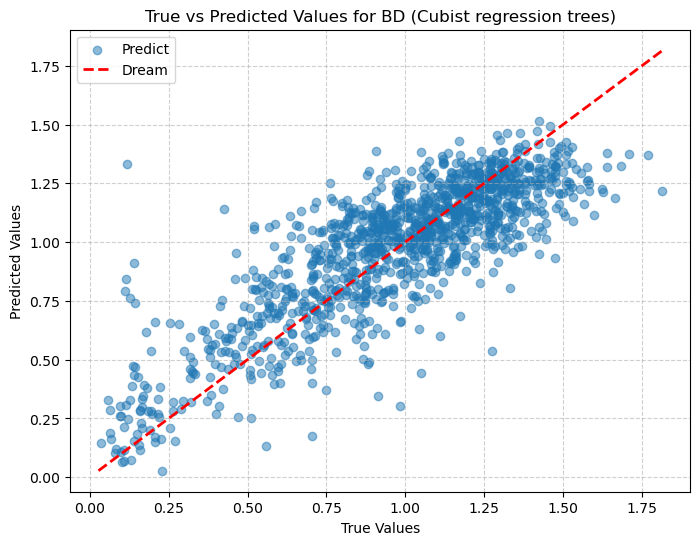


脚本运行完毕。


In [32]:
# 数据标准化（对协变量进行标准化）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_input)
print("数据标准化完成。")


# Cubist regression trees

# 训练集和测试集划分
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_bdfine, test_size=0.2, random_state=100)
print(f"数据划分为训练集 ({X_train.shape[0]} 样本) 和测试集 ({X_test.shape[0]} 样本)。")

# 重新赋予列名 (可选)
# 这一步是为了在后续查看结果或模型属性时，保留原始特征名称
if isinstance(x_input, pd.DataFrame): # 检查 x_input 是否是 DataFrame
    X_train = pd.DataFrame(X_train, columns=x_input.columns)
    X_test = pd.DataFrame(X_test, columns=x_input.columns)
else:
    # 如果 x_input 不是 DataFrame，或者没有列名信息，则跳过重新赋值列名
    print("x_input 不是 pandas DataFrame，跳过重新赋予列名。")


# --- 定义新的超参数搜索空间 ---
# 基于上次结果 {'n_committees': 50, 'n_rules': 50, 'neighbors': 9} 进行调整和扩展
param_grid = {
    'n_committees': [40,50,60,70,75,80,90,100],  # 扩展回归树数量
    'n_rules': [50,60,65,70,75],          # 微调或少量增加规则数
    'neighbors': [8,9]    # ***重点扩展近邻数***
}
print("\n定义的新的超参数搜索空间:")
print(param_grid)

# --- 使用GridSearchCV进行交叉验证和超参数调优 ---
# cv=5 表示使用 5 折交叉验证
# scoring='neg_mean_squared_error' 表示以最小化负均方误差为目标
# n_jobs=-1 表示使用所有可用的 CPU 核心进行并行计算 (加速)
print("\n开始 GridSearchCV 调优...")
grid_search = GridSearchCV(
    estimator=Cubist(), # 要调优的模型实例
    param_grid=param_grid, # 定义的超参数网格
    cv=10, # 交叉验证折数
    scoring='neg_mean_squared_error', # 评估指标
    n_jobs=-1 # 并行计算，使用所有核心
)

# 在训练集上进行网格搜索
grid_search.fit(X_train, y_train)

print("GridSearchCV 调优完成。")

# --- 输出最佳参数 ---
print("\n新的最佳参数找到:")
print(grid_search.best_params_)

# --- 使用最佳参数训练模型 ---
# GridSearchCV 调优完成后，grid_search.best_estimator_ 就是用最佳参数在整个训练集上训练好的模型
best_model = grid_search.best_estimator_
print("\n已获取最佳模型。")

# --- 拟合最佳模型并进行预测 (实际上 grid_search.best_estimator_ 已经是拟合好的) ---
# 如果你之前没有使用 GridSearchCV，或者想重新拟合，这里可以调用 best_model.fit(X_train, y_train)
# 但使用 GridSearchCV 时，best_estimator_ 通常已经是 fit 过的，可以直接用来预测和评分
print("\n在测试集上评估最佳模型...")
y_pred = best_model.predict(X_test)

# --- 计算评估指标 ---
# 计算均方误差 (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'测试集 Mean Squared Error (MSE): {mse}')

# 计算并输出 R² 分数
# best_model.score() 方法对于回归模型默认计算 R² 分数
r2 = best_model.score(X_test, y_test) # 使用 score 方法直接获取 R²
print(f'测试集 R² Score: {r2}')

# --- 绘制原始样本和预测样本关系图 ---
print("\n绘制真实值 vs 预测值散点图...")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predict') # 增加 alpha 增加透明度，加 label 用于图例
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values for BD (Cubist regression trees)')

# 绘制对角线 (理想情况，预测值等于真实值)
# 找到真实值和预测值的总体的最小值和最大值，用于确定对角线的范围
min_val = min(y_test.min(), y_pred.min()) # 使用 .min() 获取 Series/数组的最小值
max_val = max(y_test.max(), y_pred.max()) # 使用 .max() 获取 Series/数组的最大值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Dream') # 红色虚线，加 label

plt.grid(True, linestyle='--', alpha=0.6) # 添加网格线
plt.legend() # 显示图例
plt.show()

print("\n脚本运行完毕。")

In [33]:
import joblib # 导入 joblib 库用于保存和加载模型
# --- *** 新增：保存训练好的最佳模型到本地 *** ---
model_filename = 'D:\study\组会\saved_models\cubist_bd.joblib' # 定义模型保存文件名，你可以修改
try:
    joblib.dump(best_model, model_filename)
    print(f"✅ 模型已成功保存到本地: {model_filename}")
except Exception as e:
    print(f"❌ 保存模型失败: {e}")
# 以后你可以使用 joblib.load(model_filename) 来加载模型


# --- *** 新增：保存 grid_search 对象到本地 *** ---
# 保存整个网格搜索结果对象
grid_search_results_filename = 'D:\study\组会\saved_models\cubist_bd_grid_search.joblib' # 定义 grid_search 保存文件名
try:
    joblib.dump(grid_search, grid_search_results_filename)
    print(f"✅ GridSearchCV 结果对象已成功保存到本地: {grid_search_results_filename}")
except Exception as e:
    print(f"❌ 保存 GridSearchCV 结果对象失败: {e}")

✅ 模型已成功保存到本地: D:\study\组会\saved_models\cubist_bd.joblib
✅ GridSearchCV 结果对象已成功保存到本地: D:\study\组会\saved_models\cubist_bd_grid_search.joblib


In [24]:
import joblib # 导入 joblib 库 (如果你的脚本中还没有导入的话)

# --- 定义你之前保存模型的文件路径 ---
model_filename = 'D:\study\组会\saved_models\cubist_bd.joblib'

# --- 加载模型 ---
try:
    best_model = joblib.load(model_filename)
    print(f"✅ 模型已成功从本地加载: {model_filename}")
except FileNotFoundError:
    print(f"❌ 错误: 未找到模型文件 {model_filename}。请检查路径是否正确。")
except Exception as e:
    print(f"❌ 加载模型失败: {e}")
    print(f"错误详情: {e}")

# 训练集和测试集划分
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_bdfine, test_size=0.2, random_state=100)

# --- 拟合最佳模型并进行预测 (实际上 grid_search.best_estimator_ 已经是拟合好的) ---
# 如果你之前没有使用 GridSearchCV，或者想重新拟合，这里可以调用 best_model.fit(X_train, y_train)
# 但使用 GridSearchCV 时，best_estimator_ 通常已经是 fit 过的，可以直接用来预测和评分
print("\n在测试集上评估最佳模型...")
y_pred = best_model.predict(X_test)

# --- 计算评估指标 ---
# 计算均方误差 (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'测试集 Mean Squared Error (MSE): {mse}')

# 计算并输出 R² 分数
# best_model.score() 方法对于回归模型默认计算 R² 分数
r2 = best_model.score(X_test, y_test) # 使用 score 方法直接获取 R²
print(f'测试集 R² Score: {r2}')

✅ 模型已成功从本地加载: D:\study\组会\saved_models\cubist_bd.joblib

在测试集上评估最佳模型...


c:\Users\86186\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Cubist was fitted with feature names
  warnings.warn(


测试集 Mean Squared Error (MSE): 0.03763639801754116


c:\Users\86186\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Cubist was fitted with feature names
  warnings.warn(


测试集 R² Score: 0.6808770739369203



绘制评估图表...


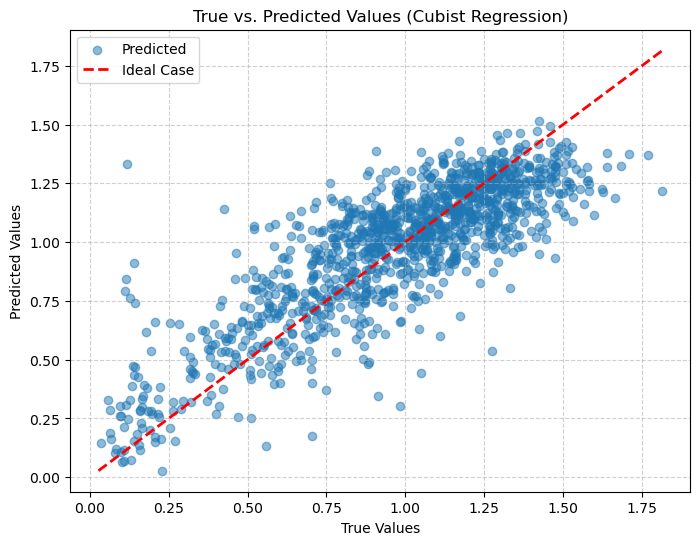

In [25]:
# --- 图表 1: 真实值 vs 预测值散点图 ---
print("\n绘制评估图表...") # 这行可以保留或根据需要调整位置

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted') # Label changed to English
plt.xlabel('True Values') # Label changed to English
plt.ylabel('Predicted Values') # Label changed to English
plt.title('True vs. Predicted Values (Cubist Regression)') # Title changed to English

# 绘制对角线 (理想情况)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Ideal Case') # Label changed to English

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

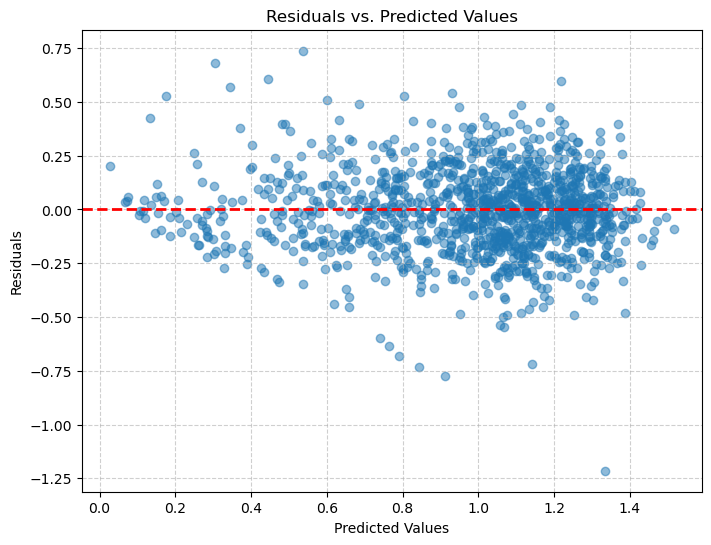

In [35]:
# --- 图表 2: 残差图 (残差 vs 预测值) ---
# 计算残差 (确保这行在你调用 predict 之后)
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2) # 绘制一条水平线在 y=0
plt.xlabel('Predicted Values') # Label changed to English
plt.ylabel('Residuals') # Label changed to English
plt.title('Residuals vs. Predicted Values') # Title changed to English
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

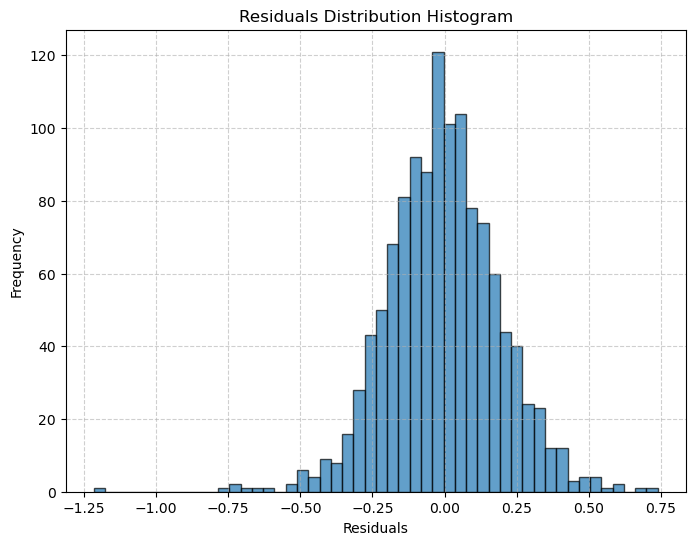

In [36]:
# --- 图表 3: 残差分布图 (直方图) ---
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, edgecolor='black', alpha=0.7) # 可以调整 bins 的数量
plt.xlabel('Residuals') # Label changed to English
plt.ylabel('Frequency') # Label changed to English
plt.title('Residuals Distribution Histogram') # Title changed to English
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


绘制 Committees 与 RMSE 关系图...


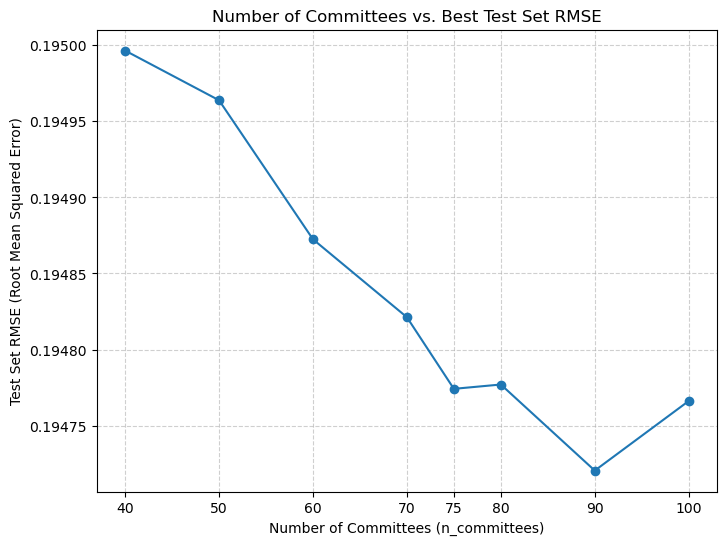

Committees vs. RMSE plot generated.


In [34]:
# --- 绘制 Committees 与 RMSE 关系图 ---
print("\n绘制 Committees 与 RMSE 关系图...") # 这行可以保留或调整

# 从 grid_search.cv_results_ 中获取结果
results = pd.DataFrame(grid_search.cv_results_)

# 计算 RMSE (注意 GridSearchCV 使用的是 neg_mean_squared_error)
# RMSE = sqrt(-mean_test_score)
results['mean_test_rmse'] = np.sqrt(-results['mean_test_score'])

# 按 n_committees 分组，找到每个 n_committees 组中最小的 RMSE
committees_vs_rmse = results.groupby('param_n_committees')['mean_test_rmse'].min()

# 绘制图形
plt.figure(figsize=(8, 6))
plt.plot(committees_vs_rmse.index, committees_vs_rmse.values, marker='o', linestyle='-')

plt.xlabel('Number of Committees (n_committees)') # Label changed to English
plt.ylabel('Test Set RMSE (Root Mean Squared Error)') # Label changed to English
plt.title('Number of Committees vs. Best Test Set RMSE') # Title changed to English
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(committees_vs_rmse.index) # 确保 X 轴刻度显示你测试过的 Committees 数量


plt.show()

print("Committees vs. RMSE plot generated.") # Print message changed to English


绘制特征重要性水平直方图...


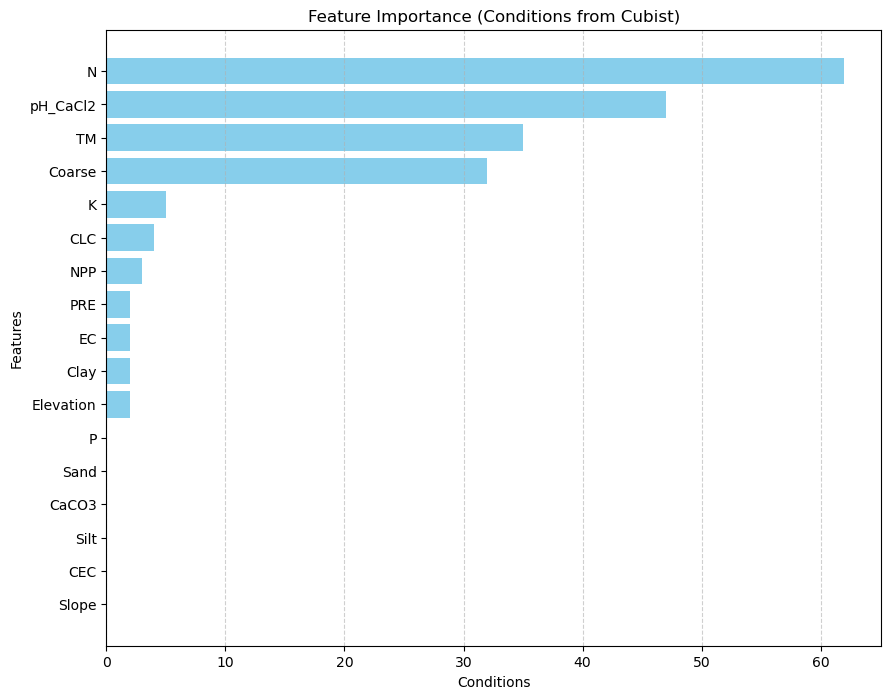

特征重要性水平直方图绘制完成。


: 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd # 确保导入 pandas

# --- *** 新增：绘制特征重要性水平直方图 *** ---
print("\n绘制特征重要性水平直方图...")

# *** 请确保在这里你已经有了包含特征重要性数据的 DataFrame ***
# 这个 DataFrame 应该有 'Conditions', 'Model', 'Variable' 等列
# 例如，如果你的数据已经在一个变量里，比如叫做 'cubist_importance_data_list_of_dicts'
# feature_importance_df = pd.DataFrame(cubist_importance_data_list_of_dicts)
# 或者如果数据是从文件读取的
# feature_importance_df = pd.read_csv('your_importance_data.csv')
# *** 请将下面的 placeholder DataFrame 替换为你实际获取特征重要性数据并创建 DataFrame 的代码 ***
# 示例 DataFrame (基于你的图片内容构建一个类似的结构)
data = {
    'Conditions': [64.0, 45.0, 38.0, 33.0, 4.0, 3.0, 3.0, 2.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'Model': [98.0, 81.0, 69.0, 80.0, 63.0, 60.0, 27.0, 62.0, 59.0, 69.0, 43.0, 48.0, 71.0, 63.0, 51.0, 46.0, 40.0],
    'Variable': ['N', 'pH_CaCl2', 'TM', 'Coarse', 'K', 'CLC', 'NPP', 'Clay', 'Elevation', 'PRE', 'EC', 'P', 'Sand', 'Silt', 'CEC', 'CaCO3', 'Slope']
}
feature_importance_df = best_model.feature_importances_ # *** 请替换这一行和你如何获取 feature_importance_df 的代码 ***
# *** ------------------------------------------------------------------------------ ***


# 根据某个重要性分数（例如 'Conditions'）降序排序
# 你的图片中看起来是按 Conditions 排序的，所以我们用这个作为重要性度量
importance_column = 'Conditions' # 或者 'Model'，取决于你想用哪个分数衡量重要性

if importance_column not in feature_importance_df.columns:
    print(f"❌ 错误: 特征重要性 DataFrame 中没有找到列 '{importance_column}'。请检查列名。")
else:
    # 按照重要性分数降序排序，这对于绘制直方图很重要
    feature_importance_df = feature_importance_df.sort_values(by=importance_column, ascending=False)

    # 绘制水平直方图
    plt.figure(figsize=(10, 8)) # 图形尺寸，可以调整以容纳较多特征名称
    
    # plt.barh() 用于绘制水平直方图
    # y 参数通常是类别的索引或名称，这里用特征名称 'Variable'
    # width 参数是条形的长度，这里用重要性分数
    plt.barh(feature_importance_df['Variable'], feature_importance_df[importance_column], color='skyblue')

    plt.xlabel(importance_column) # X轴标签是重要性分数对应的列名
    plt.ylabel('Features')      # Y轴标签是特征名称
    plt.title(f'Feature Importance ({importance_column} from Cubist)') # 图形标题
    plt.gca().invert_yaxis() # 反转Y轴，让重要性最高的特征显示在最上面
    plt.grid(axis='x', linestyle='--', alpha=0.6) # 绘制X轴网格线

    plt.show()

    print("特征重要性水平直方图绘制完成。")

# --- *** 新增代码结束 *** ---

##### LULC版本

In [ ]:
# 步骤 1: 筛选出没有BD值的行
df_missing_bd = df[df['BD'].isna()]

covariates = ["LC", "LU","Elevation", "Coarse", "Clay", "Silt", "Sand", "pH_CaCl2", "pH_H2O",
              'P', 'N', 'K', 'CaCO3','Slope', 'EC', 'CEC','TM','PRE',"NPP"]

# 获取这些行的特征（即删除BD和CV列）
X_missing_bd = df_missing_bd[covariates]

#把分类的属性转为数字
X_missing_bd['LC'] = X_missing_bd['LC'].astype('category').cat.codes
X_missing_bd['LU'] = X_missing_bd['LU'].astype('category').cat.codes


# 步骤 2: 使用KNNImputer填补缺失值
X_missing_bd_imputed = imputer.transform(X_missing_bd)  # 使用训练时的imputer进行填补

# 将填补后的特征转换回DataFrame
X_missing_bd_imputed = pd.DataFrame(X_missing_bd_imputed, columns=X_missing_bd.columns)

# 确保缺失数据的列名与训练数据一致
X_missing_bd_imputed = X_missing_bd_imputed[X_train.columns]  # 强制列名与训练集一致

# 步骤 3: 对这些特征进行标准化（与训练集一致）
X_missing_bd_scaled = scaler.transform(X_missing_bd_imputed)  # 使用训练时的scaler进行标准化

# 步骤 4: 使用训练好的Cubist模型进行预测
predicted_bd = best_model.predict(X_missing_bd_scaled)

# 步骤 5: 将预测的BD值添加到原始数据中
df_missing_bd['BD_predicted'] = predicted_bd

# 现在将原始数据和预测的BD值合并
df['BD'] = df['BD'].fillna(df_missing_bd['BD_predicted'])  # 用预测的BD填补缺失值

# 保存合并后的结果到新的CSV文件中
df.to_csv('D:/study/组会/DATA/SOC/LUCAS/BD_filled_complete.csv', index=False)

# 查看合并后的结果
print(df[['LC', 'LU', 'Elevation', 'Coarse', 'Clay', 'Silt', 'Sand', 'pH_CaCl2', 
          'pH_H2O', 'P', 'N', 'K', 'CaCO3', 'Slope', 'EC', 'CEC', 'TM', 'PRE', 'NPP', 'BD']].head())


C:\Users\86186\AppData\Local\Temp\ipykernel_1916\2329267455.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_missing_bd['LC'] = X_missing_bd['LC'].astype('category').cat.codes
C:\Users\86186\AppData\Local\Temp\ipykernel_1916\2329267455.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_missing_bd['LU'] = X_missing_bd['LU'].astype('category').cat.codes
c:\Users\86186\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Cubist was fitted with feature

    LC    LU   Elevation   Coarse      Clay      Silt      Sand  pH_CaCl2  \
0  NaN   NaN   27.000000   5.0000  15.00000  21.00000  64.00000      7.62   
1  E20  U111  181.000000  13.1128  30.56295  32.28476  37.15229      7.10   
2  D10  U400  150.000000   8.0000  10.00000  14.00000  76.00000      3.75   
3  B16  U111  154.000000  28.0000  41.00000  48.00000  11.00000      6.81   
4  E20  U111   76.466667  14.0000  25.00000  29.00000  46.00000      6.92   

   pH_H2O           P    N      K  CaCO3      Slope     EC       CEC  \
0    8.36  209.400000  1.9  744.7  778.0        NaN    NaN  11.90000   
1    7.75   24.058308  1.8  461.7  190.0  20.000000  16.83  15.59136   
2    4.84   13.200000  3.2   80.1    0.0   3.433630    NaN   6.70000   
3    7.31   12.800000  2.2  159.8    7.0   7.735191    NaN  65.30000   
4    7.37   61.466667  3.7  525.9   98.0   1.850000  18.79  25.40000   

          TM        PRE      NPP        BD  
0  19.205189  411.10822  0.77430  1.138502  
1  15.717827  

##### CLC版本

In [17]:
# 步骤 1: 筛选出没有BD值的行
df_missing_bd = df[df['BD'].isna()]

covariates = ["CLC", "Elevation", "Coarse", "Clay", "Silt", "Sand", "pH_CaCl2", "pH_H2O",
              'P', 'N', 'K', 'CaCO3', 'EC', 'CEC', "NPP",'TM', 'PRE', 'Slope']

# 获取这些行的特征（即删除BD和CV列）
X_missing_bd = df_missing_bd[covariates]

# 步骤 2: 使用KNNImputer填补缺失值
X_missing_bd_imputed = imputer.transform(X_missing_bd)  # 使用训练时的imputer进行填补

# 将填补后的特征转换回DataFrame
X_missing_bd_imputed = pd.DataFrame(X_missing_bd_imputed, columns=X_missing_bd.columns)

# 确保缺失数据的列名与训练数据一致
X_missing_bd_imputed = X_missing_bd_imputed[X_train.columns]  # 强制列名与训练集一致

# 步骤 3: 对这些特征进行标准化（与训练集一致）
X_missing_bd_scaled = scaler.transform(X_missing_bd_imputed)  # 使用训练时的scaler进行标准化

# 步骤 4: 使用训练好的Cubist模型进行预测
predicted_bd = best_model.predict(X_missing_bd_scaled)

# 步骤 5: 将预测的BD值添加到原始数据中
df_missing_bd['BD_predicted'] = predicted_bd

# 现在将原始数据和预测的BD值合并
df['BD'] = df['BD'].fillna(df_missing_bd['BD_predicted'])  # 用预测的BD填补缺失值

# 保存合并后的结果到新的CSV文件中
df.to_csv('D:/study/组会/DATA/SOC/LUCAS/BD_predicted.csv', index=False)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

#### CV

数据标准化完成。
数据划分为训练集 (4841 样本) 和测试集 (1211 样本)。

定义的新的超参数搜索空间:
{'n_committees': [10, 20, 30, 40, 50, 60, 70], 'n_rules': [50, 60, 70, 80, 100], 'neighbors': [5, 7, 9]}

开始 GridSearchCV 调优...
GridSearchCV 调优完成。

新的最佳参数找到:
{'n_committees': 30, 'n_rules': 70, 'neighbors': 9}

已获取最佳模型。

在测试集上评估最佳模型...
测试集 Mean Squared Error (MSE): 0.00019385391067052024
测试集 R² Score: 0.9291229950538052

绘制真实值 vs 预测值散点图...


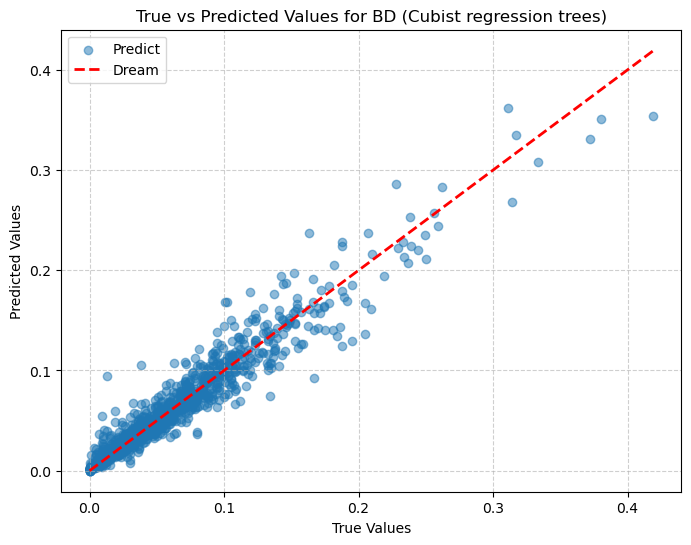


脚本运行完毕。


In [20]:
# 数据标准化（对协变量进行标准化）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_input)
print("数据标准化完成。")


# Cubist regression trees

# 训练集和测试集划分
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_coarse_vol, test_size=0.2, random_state=100)
print(f"数据划分为训练集 ({X_train.shape[0]} 样本) 和测试集 ({X_test.shape[0]} 样本)。")

# 重新赋予列名 (可选)
# 这一步是为了在后续查看结果或模型属性时，保留原始特征名称
if isinstance(x_input, pd.DataFrame): # 检查 x_input 是否是 DataFrame
    X_train = pd.DataFrame(X_train, columns=x_input.columns)
    X_test = pd.DataFrame(X_test, columns=x_input.columns)
else:
    # 如果 x_input 不是 DataFrame，或者没有列名信息，则跳过重新赋值列名
    print("x_input 不是 pandas DataFrame，跳过重新赋予列名。")


# --- 定义新的超参数搜索空间 ---
# 基于上次结果 {'n_committees': 20, 'n_rules': 100, 'neighbors': 9} 进行调整和扩展
param_grid = {
    'n_committees': [10,20,30,40,50,60,70],  # 扩展回归树数量
    'n_rules': [50,60,70,80,100],          # 微调或少量增加规则数
    'neighbors': [5,7,9]    # ***重点扩展近邻数***
}
print("\n定义的新的超参数搜索空间:")
print(param_grid)

# --- 使用GridSearchCV进行交叉验证和超参数调优 ---
# cv=5 表示使用 5 折交叉验证
# scoring='neg_mean_squared_error' 表示以最小化负均方误差为目标
# n_jobs=-1 表示使用所有可用的 CPU 核心进行并行计算 (加速)
print("\n开始 GridSearchCV 调优...")
grid_search = GridSearchCV(
    estimator=Cubist(), # 要调优的模型实例
    param_grid=param_grid, # 定义的超参数网格
    cv=10, # 交叉验证折数
    scoring='neg_mean_squared_error', # 评估指标
    n_jobs=-1 # 并行计算，使用所有核心
)

# 在训练集上进行网格搜索
grid_search.fit(X_train, y_train)

print("GridSearchCV 调优完成。")

# --- 输出最佳参数 ---
print("\n新的最佳参数找到:")
print(grid_search.best_params_)

# --- 使用最佳参数训练模型 ---
# GridSearchCV 调优完成后，grid_search.best_estimator_ 就是用最佳参数在整个训练集上训练好的模型
best_model = grid_search.best_estimator_
print("\n已获取最佳模型。")

# --- 拟合最佳模型并进行预测 (实际上 grid_search.best_estimator_ 已经是拟合好的) ---
# 如果你之前没有使用 GridSearchCV，或者想重新拟合，这里可以调用 best_model.fit(X_train, y_train)
# 但使用 GridSearchCV 时，best_estimator_ 通常已经是 fit 过的，可以直接用来预测和评分
print("\n在测试集上评估最佳模型...")
y_pred = best_model.predict(X_test)

# --- 计算评估指标 ---
# 计算均方误差 (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'测试集 Mean Squared Error (MSE): {mse}')

# 计算并输出 R² 分数
# best_model.score() 方法对于回归模型默认计算 R² 分数
r2 = best_model.score(X_test, y_test) # 使用 score 方法直接获取 R²
print(f'测试集 R² Score: {r2}')

# --- 绘制原始样本和预测样本关系图 ---
print("\n绘制真实值 vs 预测值散点图...")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predict') # 增加 alpha 增加透明度，加 label 用于图例
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values for BD (Cubist regression trees)')

# 绘制对角线 (理想情况，预测值等于真实值)
# 找到真实值和预测值的总体的最小值和最大值，用于确定对角线的范围
min_val = min(y_test.min(), y_pred.min()) # 使用 .min() 获取 Series/数组的最小值
max_val = max(y_test.max(), y_pred.max()) # 使用 .max() 获取 Series/数组的最大值
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Dream') # 红色虚线，加 label

plt.grid(True, linestyle='--', alpha=0.6) # 添加网格线
plt.legend() # 显示图例
plt.show()

print("\n脚本运行完毕。")

In [21]:
import joblib # 导入 joblib 库用于保存和加载模型
# --- *** 新增：保存训练好的最佳模型到本地 *** ---
model_filename = 'D:\study\组会\saved_models\cubist_cv.joblib' # 定义模型保存文件名，你可以修改
try:
    joblib.dump(best_model, model_filename)
    print(f"✅ 模型已成功保存到本地: {model_filename}")
except Exception as e:
    print(f"❌ 保存模型失败: {e}")
# 以后你可以使用 joblib.load(model_filename) 来加载模型

✅ 模型已成功保存到本地: D:\study\组会\saved_models\cubist_cv.joblib


In [30]:
# --- *** 新增：保存 grid_search 对象到本地 *** ---
# 保存整个网格搜索结果对象
grid_search_results_filename = 'D:\study\组会\saved_models\cubist_cv_grid_search.joblib' # 定义 grid_search 保存文件名
try:
    joblib.dump(grid_search, grid_search_results_filename)
    print(f"✅ GridSearchCV 结果对象已成功保存到本地: {grid_search_results_filename}")
except Exception as e:
    print(f"❌ 保存 GridSearchCV 结果对象失败: {e}")

✅ GridSearchCV 结果对象已成功保存到本地: D:\study\组会\saved_models\cubist_cv_grid_search.joblib



绘制评估图表...


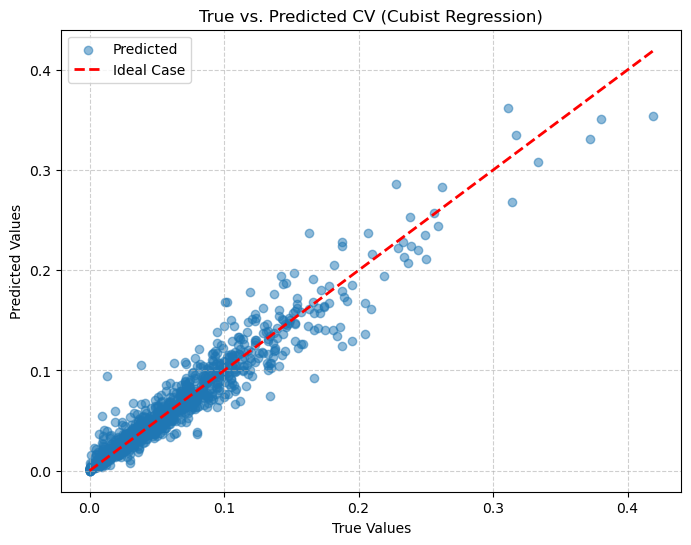

In [9]:
# --- 图表 1: 真实值 vs 预测值散点图 ---
print("\n绘制评估图表...") # 这行可以保留或根据需要调整位置

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted') # Label changed to English
plt.xlabel('True Values') # Label changed to English
plt.ylabel('Predicted Values') # Label changed to English
plt.title('True vs. Predicted CV (Cubist Regression)') # Title changed to English

# 绘制对角线 (理想情况)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Ideal Case') # Label changed to English

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

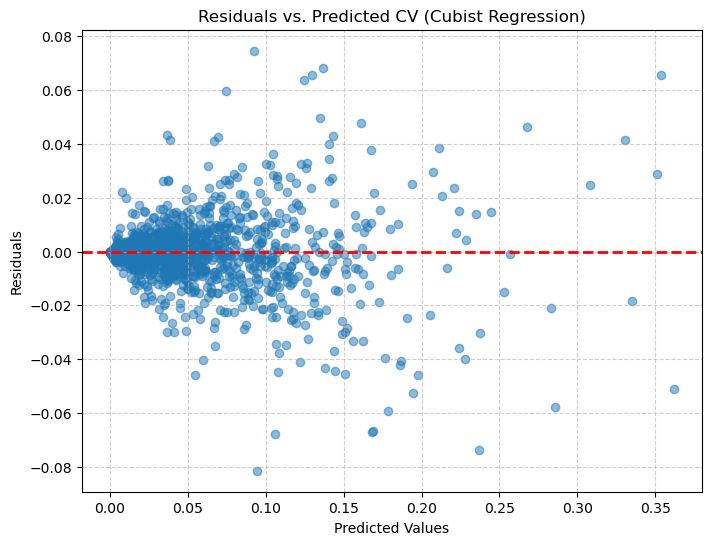

In [11]:
# --- 图表 2: 残差图 (残差 vs 预测值) ---
# 计算残差 (确保这行在你调用 predict 之后)
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2) # 绘制一条水平线在 y=0
plt.xlabel('Predicted Values') # Label changed to English
plt.ylabel('Residuals') # Label changed to English
plt.title('Residuals vs. Predicted CV (Cubist Regression)') # Title changed to English
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

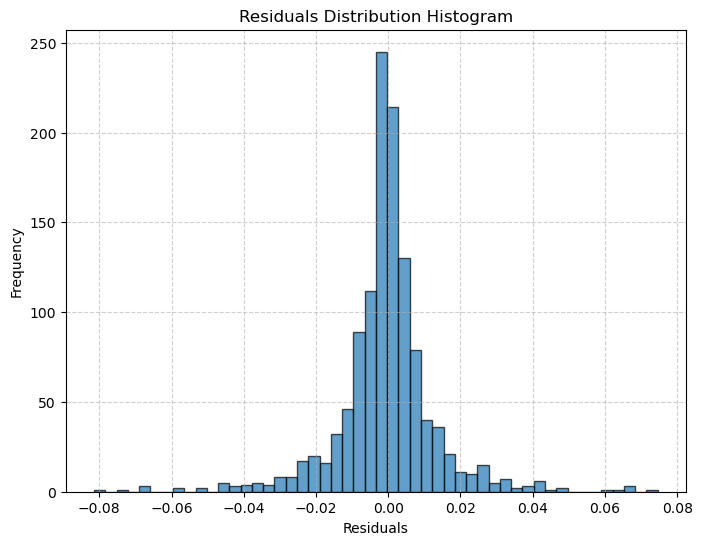

In [12]:
# --- 图表 3: 残差分布图 (直方图) ---
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, edgecolor='black', alpha=0.7) # 可以调整 bins 的数量
plt.xlabel('Residuals') # Label changed to English
plt.ylabel('Frequency') # Label changed to English
plt.title('Residuals Distribution Histogram') # Title changed to English
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

✅ GridSearchCV 结果对象已成功从本地加载: D:\study\组会\saved_models\cubist_cv_grid_search.joblib

绘制 Committees 与 RMSE 关系图 (从加载结果)...


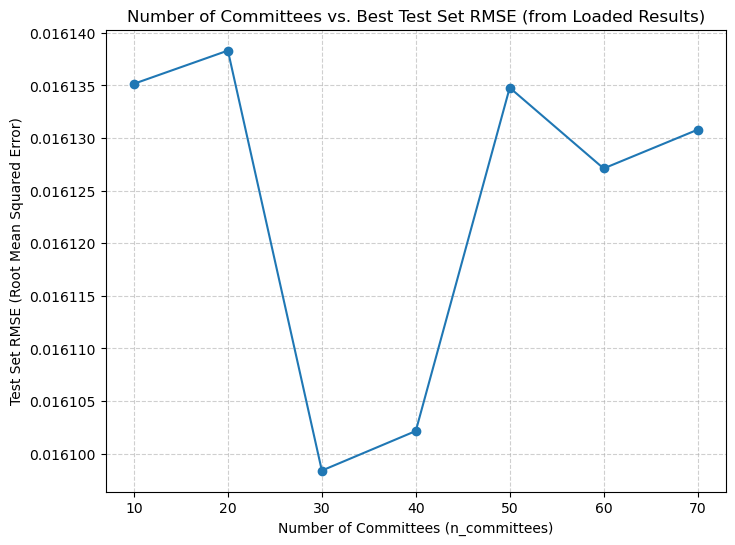

Committees vs. RMSE plot generated from loaded results.


In [31]:
# --- 定义之前保存 grid_search 对象的文件路径 ---
# *** 请将这里的路径替换为你实际保存的文件路径 ***
grid_search_results_filename = 'D:\study\组会\saved_models\cubist_cv_grid_search.joblib' 
# --- 加载 grid_search 对象 ---
loaded_grid_search = joblib.load(grid_search_results_filename)
print(f"✅ GridSearchCV 结果对象已成功从本地加载: {grid_search_results_filename}")

# --- 现在你可以使用 loaded_grid_search.cv_results_ 来生成图表了 ---
print("\n绘制 Committees 与 RMSE 关系图 (从加载结果)...")

# 从加载的对象的 cv_results_ 中获取结果
results = pd.DataFrame(loaded_grid_search.cv_results_)

# 计算 RMSE
# 注意 GridSearchCV 使用的是 neg_mean_squared_error，所以取负号再开根号
results['mean_test_rmse'] = np.sqrt(-results['mean_test_score'])

# 按 param_n_committees 分组，找到每个组中最小的 RMSE
committees_vs_rmse = results.groupby('param_n_committees')['mean_test_rmse'].min()

# 绘制图形
plt.figure(figsize=(8, 6))
plt.plot(committees_vs_rmse.index, committees_vs_rmse.values, marker='o', linestyle='-')

plt.xlabel('Number of Committees (n_committees)')
plt.ylabel('Test Set RMSE (Root Mean Squared Error)')
plt.title('Number of Committees vs. Best Test Set RMSE (from Loaded Results)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(committees_vs_rmse.index)

plt.show()

print("Committees vs. RMSE plot generated from loaded results.")


绘制特征重要性水平直方图...


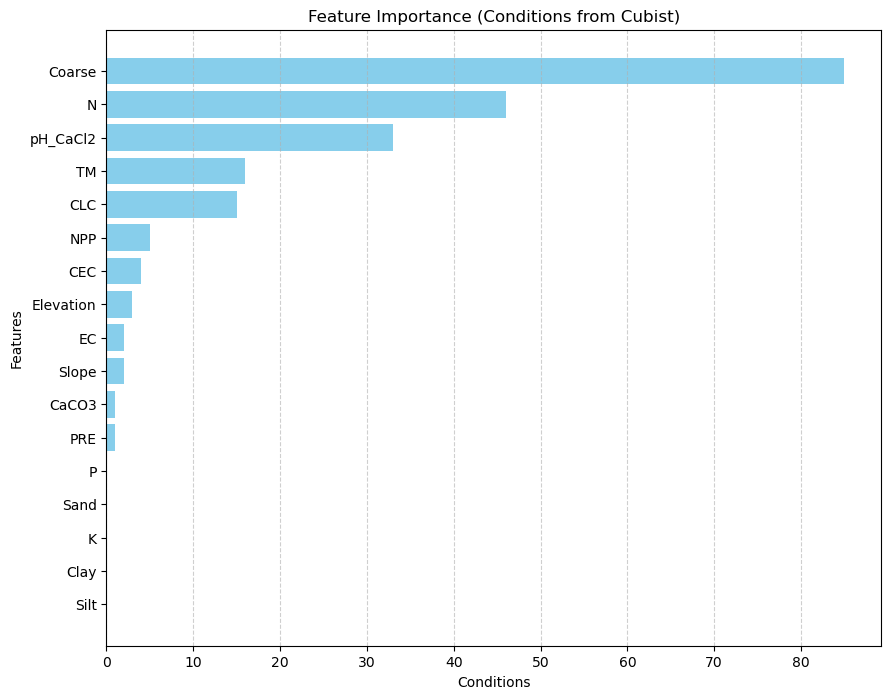

特征重要性水平直方图绘制完成。


In [14]:
import matplotlib.pyplot as plt
import pandas as pd # 确保导入 pandas

# --- *** 新增：绘制特征重要性水平直方图 *** ---
print("\n绘制特征重要性水平直方图...")

# *** 请确保在这里你已经有了包含特征重要性数据的 DataFrame ***
# 这个 DataFrame 应该有 'Conditions', 'Model', 'Variable' 等列
# 例如，如果你的数据已经在一个变量里，比如叫做 'cubist_importance_data_list_of_dicts'
# feature_importance_df = pd.DataFrame(cubist_importance_data_list_of_dicts)
# 或者如果数据是从文件读取的
# feature_importance_df = pd.read_csv('your_importance_data.csv')
# *** 请将下面的 placeholder DataFrame 替换为你实际获取特征重要性数据并创建 DataFrame 的代码 ***
# 示例 DataFrame (基于你的图片内容构建一个类似的结构)
data = {
    'Conditions': [64.0, 45.0, 38.0, 33.0, 4.0, 3.0, 3.0, 2.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'Model': [98.0, 81.0, 69.0, 80.0, 63.0, 60.0, 27.0, 62.0, 59.0, 69.0, 43.0, 48.0, 71.0, 63.0, 51.0, 46.0, 40.0],
    'Variable': ['N', 'pH_CaCl2', 'TM', 'Coarse', 'K', 'CLC', 'NPP', 'Clay', 'Elevation', 'PRE', 'EC', 'P', 'Sand', 'Silt', 'CEC', 'CaCO3', 'Slope']
}
feature_importance_df = best_model.feature_importances_ # *** 请替换这一行和你如何获取 feature_importance_df 的代码 ***
# *** ------------------------------------------------------------------------------ ***


# 根据某个重要性分数（例如 'Conditions'）降序排序
# 你的图片中看起来是按 Conditions 排序的，所以我们用这个作为重要性度量
importance_column = 'Conditions' # 或者 'Model'，取决于你想用哪个分数衡量重要性

if importance_column not in feature_importance_df.columns:
    print(f"❌ 错误: 特征重要性 DataFrame 中没有找到列 '{importance_column}'。请检查列名。")
else:
    # 按照重要性分数降序排序，这对于绘制直方图很重要
    feature_importance_df = feature_importance_df.sort_values(by=importance_column, ascending=False)

    # 绘制水平直方图
    plt.figure(figsize=(10, 8)) # 图形尺寸，可以调整以容纳较多特征名称
    
    # plt.barh() 用于绘制水平直方图
    # y 参数通常是类别的索引或名称，这里用特征名称 'Variable'
    # width 参数是条形的长度，这里用重要性分数
    plt.barh(feature_importance_df['Variable'], feature_importance_df[importance_column], color='skyblue')

    plt.xlabel(importance_column) # X轴标签是重要性分数对应的列名
    plt.ylabel('Features')      # Y轴标签是特征名称
    plt.title(f'Feature Importance ({importance_column} from Cubist)') # 图形标题
    plt.gca().invert_yaxis() # 反转Y轴，让重要性最高的特征显示在最上面
    plt.grid(axis='x', linestyle='--', alpha=0.6) # 绘制X轴网格线

    plt.show()

    print("特征重要性水平直方图绘制完成。")

# --- *** 新增代码结束 *** ---

##### LULC版本

In [38]:
# 步骤 1: 筛选出没有BD值的行
df_missing_bd = df[df['CV'].isna()]

covariates = ["LC", "LU","Elevation", "Coarse", "Clay", "Silt", "Sand", "pH_CaCl2", "pH_H2O",
              'P', 'N', 'K', 'CaCO3','Slope', 'EC', 'CEC','TM','PRE',"NPP"]

# 获取这些行的特征（即删除BD和CV列）
X_missing_bd = df_missing_bd[covariates]

#把分类的属性转为数字
X_missing_bd['LC'] = X_missing_bd['LC'].astype('category').cat.codes
X_missing_bd['LU'] = X_missing_bd['LU'].astype('category').cat.codes


# 步骤 2: 使用KNNImputer填补缺失值
X_missing_bd_imputed = imputer.transform(X_missing_bd)  # 使用训练时的imputer进行填补

# 将填补后的特征转换回DataFrame
X_missing_bd_imputed = pd.DataFrame(X_missing_bd_imputed, columns=X_missing_bd.columns)

# 确保缺失数据的列名与训练数据一致
X_missing_bd_imputed = X_missing_bd_imputed[X_train.columns]  # 强制列名与训练集一致

# 步骤 3: 对这些特征进行标准化（与训练集一致）
X_missing_bd_scaled = scaler.transform(X_missing_bd_imputed)  # 使用训练时的scaler进行标准化

# 步骤 4: 使用训练好的Cubist模型进行预测
predicted_bd = best_model.predict(X_missing_bd_scaled)

# 步骤 5: 将预测的BD值添加到原始数据中
df_missing_bd['CV_predicted'] = predicted_bd

# 现在将原始数据和预测的BD值合并
df['CV'] = df['CV'].fillna(df_missing_bd['CV_predicted'])  # 用预测的BD填补缺失值

# 保存合并后的结果到新的CSV文件中
df.to_csv('D:/study/组会/DATA/SOC/LUCAS/CV_filled_complete.csv', index=False)



C:\Users\86186\AppData\Local\Temp\ipykernel_1916\1211352112.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_missing_bd['LC'] = X_missing_bd['LC'].astype('category').cat.codes
C:\Users\86186\AppData\Local\Temp\ipykernel_1916\1211352112.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_missing_bd['LU'] = X_missing_bd['LU'].astype('category').cat.codes
c:\Users\86186\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Cubist was fitted with feature

##### CLC版本

In [32]:
# 步骤 1: 筛选出没有BD值的行
df_missing_bd = df[df['CV'].isna()]

covariates = ["CLC", "Elevation", "Coarse", "Clay", "Silt", "Sand", "pH_CaCl2", "pH_H2O",
              'P', 'N', 'K', 'CaCO3', 'EC', 'CEC', "NPP",'TM', 'PRE', 'Slope']

# 获取这些行的特征（即删除BD和CV列）
X_missing_bd = df_missing_bd[covariates]

# 步骤 2: 使用KNNImputer填补缺失值
X_missing_bd_imputed = imputer.transform(X_missing_bd)  # 使用训练时的imputer进行填补

# 将填补后的特征转换回DataFrame
X_missing_bd_imputed = pd.DataFrame(X_missing_bd_imputed, columns=X_missing_bd.columns)

# 确保缺失数据的列名与训练数据一致
X_missing_bd_imputed = X_missing_bd_imputed[X_train.columns]  # 强制列名与训练集一致

# 步骤 3: 对这些特征进行标准化（与训练集一致）
X_missing_bd_scaled = scaler.transform(X_missing_bd_imputed)  # 使用训练时的scaler进行标准化

# 步骤 4: 使用训练好的Cubist模型进行预测
predicted_bd = best_model.predict(X_missing_bd_scaled)

# 步骤 5: 将预测的BD值添加到原始数据中
df_missing_bd['CV_predicted'] = predicted_bd

# 现在将原始数据和预测的BD值合并
df['CV'] = df['CV'].fillna(df_missing_bd['CV_predicted'])  # 用预测的BD填补缺失值

# 保存合并后的结果到新的CSV文件中
df.to_csv('D:/study/组会/DATA/SOC/LUCAS/CV_predicted.csv', index=False)


c:\Users\86186\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Cubist was fitted with feature names
  warnings.warn(
C:\Users\86186\AppData\Local\Temp\ipykernel_2064\1794782589.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing_bd['CV_predicted'] = predicted_bd


### 随机森林

#### BD

数据标准化完成。
数据划分为训练集 (4841 样本) 和测试集 (1211 样本)。
已尝试重新赋予训练集和测试集特征列名。

定义的随机森林超参数搜索空间:
{'n_estimators': [100, 250, 500, 1000, 1200, 1400], 'max_depth': [30], 'min_samples_split': [2], 'min_samples_leaf': [1], 'max_features': ['sqrt']}

开始 GridSearchCV 调优 (随机森林)...


c:\Users\86186\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\86186\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\86186\anaconda3\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\86186\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 456, in fit
    trees = Parallel(
  File "c:\Users\86186\anaconda3\lib\site-package

GridSearchCV 调优完成 (随机森林)。

随机森林最佳参数找到:
{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

已获取最佳随机森林模型。

在测试集上评估最佳随机森林模型...
测试集 Mean Squared Error (MSE) (随机森林): 0.03699708595031777
测试集 R² Score (随机森林): 0.6862978673259338

绘制真实值 vs 预测值散点图 (随机森林)...


c:\Users\86186\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\86186\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\86186\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\86186\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\86186\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  fig.canvas.print_figure(bytes_

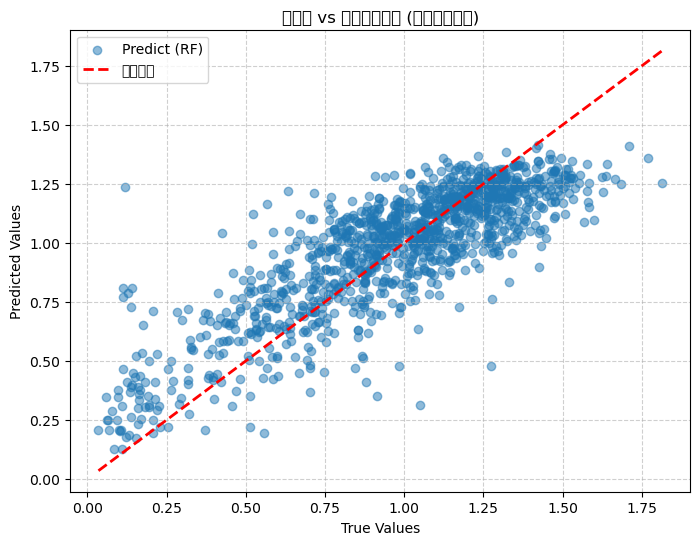


随机森林脚本运行完毕。


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor # 导入随机森林回归模型
import matplotlib.pyplot as plt


# --- 2. 数据标准化 ---
# 对协变量（特征）进行标准化。对于基于树的模型（如随机森林），标准化通常不是必须的，
# 因为它们对特征的尺度不敏感。但进行标准化也不会有害，并且对于后续尝试其他模型可能有用，
# 所以这里保留标准化步骤，你可以根据需要选择是否执行这部分。
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_input)
print("数据标准化完成。")


# --- 3. 划分训练集和测试集 ---
# random_state 保证每次划分结果一致，便于调试和比较不同模型
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_bdfine, test_size=0.2, random_state=100)
print(f"数据划分为训练集 ({X_train.shape[0]} 样本) 和测试集 ({X_test.shape[0]} 样本)。")

# 重新赋予列名 (可选，仅当 x_input 保持了列顺序且原 x_input 是 DataFrame 时有用)
# 这步对于随机森林模型本身拟合不是必需的，但如果后续需要查看 feature_importances 等属性时，保留列名更方便
if isinstance(x_input, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=x_input.columns)
    X_test = pd.DataFrame(X_test, columns=x_input.columns)
    print("已尝试重新赋予训练集和测试集特征列名。")
else:
    print("x_input 不是 pandas DataFrame，跳过重新赋予列名。")


# --- 4. 定义随机森林回归模型的超参数搜索空间 ---
# 这是一个常用的随机森林初始搜索网格，你可以根据数据规模和计算资源进行调整
# 调参方向：
# n_estimators: 树的数量，通常越大越好，计算量也越大
# max_depth: 树的最大深度，控制复杂性
# min_samples_split: 分裂内部节点所需最小样本数
# min_samples_leaf: 叶节点所需最小样本数
# max_features: 寻找最佳分裂时考虑的特征数量或比例
# bootstrap: 是否使用 bootstrap 样本 (默认为 True)
param_grid_rf = {
    'n_estimators': [100, 250, 500, 1000, 1200,1400], # 树的数量，可以尝试更多或更大的值
    'max_depth': [30],  # 树的最大深度 (None 表示不限制)
    'min_samples_split': [2],  # 分裂所需的最小样本数
    'min_samples_leaf': [1],    # 叶节点所需的最小样本数
    'max_features': ['sqrt'], # 寻找最佳分裂时考虑的特征数 ('sqrt' 是总特征数的平方根，'log2' 是 log2，也可以是浮点数表示比例)
}
print("\n定义的随机森林超参数搜索空间:")
print(param_grid_rf)


# --- 5. 使用 GridSearchCV 进行交叉验证和超参数调优 ---
# 实例化 RandomForestRegressor 模型，设置 random_state 保证模型本身的随机性可重复
rf = RandomForestRegressor(random_state=42)

print("\n开始 GridSearchCV 调优 (随机森林)...")
# n_jobs=-1 表示使用所有可用的 CPU 核心进行并行计算，加速调优
grid_search_rf = GridSearchCV(
    estimator=rf, # 要调优的随机森林模型实例
    param_grid=param_grid_rf, # 定义的随机森林超参数网格
    cv=10, # 交叉验证折数 (例如 5 或 10)
    scoring='neg_mean_squared_error', # 评估指标 (以最小化负均方误差为目标)
    n_jobs=-1 # 并行计算
)

# 在训练集上进行网格搜索
grid_search_rf.fit(X_train, y_train)

print("GridSearchCV 调优完成 (随机森林)。")

# --- 6. 输出最佳参数 ---
print("\n随机森林最佳参数找到:")
print(grid_search_rf.best_params_)

# 获取具有最佳参数的模型
best_model_rf = grid_search_rf.best_estimator_
print("\n已获取最佳随机森林模型。")


# --- 7. 使用最佳模型进行预测和评估 ---
print("\n在测试集上评估最佳随机森林模型...")
# 在测试集上进行预测
y_pred_rf = best_model_rf.predict(X_test)

# 计算均方误差 (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'测试集 Mean Squared Error (MSE) (随机森林): {mse_rf}')

# 计算并输出 R² 分数
# best_model_rf.score() 方法对于回归模型默认计算 R² 分数
r2_rf = best_model_rf.score(X_test, y_test)
print(f'测试集 R² Score (随机森林): {r2_rf}')

# --- 8. 绘制结果图 ---
print("\n绘制真实值 vs 预测值散点图 (随机森林)...")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Predict (RF)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values for BD (Random Forest)')
plt.title('真实值 vs 预测值关系图 (随机森林回归)')

# 绘制对角线 (理想情况)
min_val_rf = min(y_test.min(), y_pred_rf.min())
max_val_rf = max(y_test.max(), y_pred_rf.max())
plt.plot([min_val_rf, max_val_rf], [min_val_rf, max_val_rf], 'r--', lw=2, label='理想情况')

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

print("\n随机森林脚本运行完毕。")

数据标准化完成。
数据划分为训练集 (4841 样本) 和测试集 (1211 样本)。
已尝试重新赋予训练集和测试集特征列名。

定义的随机森林超参数搜索空间:
{'n_estimators': [100, 250, 500], 'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2', 0.8]}

开始 GridSearchCV 调优 (随机森林)...
GridSearchCV 调优完成 (随机森林)。

随机森林最佳参数找到:
{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

已获取最佳随机森林模型。

在测试集上评估最佳随机森林模型...
测试集 Mean Squared Error (MSE) (随机森林): 0.03699708595031777
测试集 R² Score (随机森林): 0.6862978673259338

绘制真实值 vs 预测值散点图 (随机森林)...


c:\Users\86186\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\86186\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\86186\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\86186\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\86186\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  fig.canvas.print_figure(bytes_

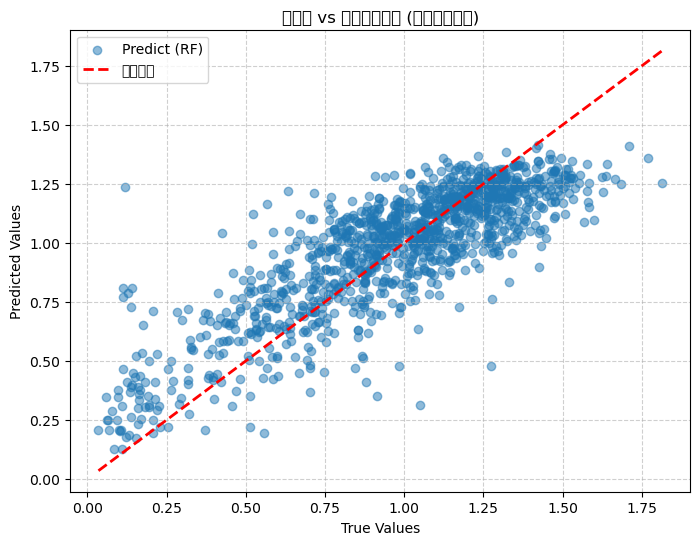


随机森林脚本运行完毕。


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor # 导入随机森林回归模型
import matplotlib.pyplot as plt


# --- 2. 数据标准化 ---
# 对协变量（特征）进行标准化。对于基于树的模型（如随机森林），标准化通常不是必须的，
# 因为它们对特征的尺度不敏感。但进行标准化也不会有害，并且对于后续尝试其他模型可能有用，
# 所以这里保留标准化步骤，你可以根据需要选择是否执行这部分。
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_input)
print("数据标准化完成。")


# --- 3. 划分训练集和测试集 ---
# random_state 保证每次划分结果一致，便于调试和比较不同模型
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_bdfine, test_size=0.2, random_state=100)
print(f"数据划分为训练集 ({X_train.shape[0]} 样本) 和测试集 ({X_test.shape[0]} 样本)。")

# 重新赋予列名 (可选，仅当 x_input 保持了列顺序且原 x_input 是 DataFrame 时有用)
# 这步对于随机森林模型本身拟合不是必需的，但如果后续需要查看 feature_importances 等属性时，保留列名更方便
if isinstance(x_input, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=x_input.columns)
    X_test = pd.DataFrame(X_test, columns=x_input.columns)
    print("已尝试重新赋予训练集和测试集特征列名。")
else:
    print("x_input 不是 pandas DataFrame，跳过重新赋予列名。")


# --- 4. 定义随机森林回归模型的超参数搜索空间 ---
# 这是一个常用的随机森林初始搜索网格，你可以根据数据规模和计算资源进行调整
# 调参方向：
# n_estimators: 树的数量，通常越大越好，计算量也越大
# max_depth: 树的最大深度，控制复杂性
# min_samples_split: 分裂内部节点所需最小样本数
# min_samples_leaf: 叶节点所需最小样本数
# max_features: 寻找最佳分裂时考虑的特征数量或比例
# bootstrap: 是否使用 bootstrap 样本 (默认为 True)
param_grid_rf = {
    'n_estimators': [100, 250, 500], # 树的数量，可以尝试更多或更大的值
    'max_depth': [10, 20, 30, None],  # 树的最大深度 (None 表示不限制)
    'min_samples_split': [2, 5, 10],  # 分裂所需的最小样本数
    'min_samples_leaf': [1, 2, 4],    # 叶节点所需的最小样本数
    'max_features': ['sqrt', 'log2', 0.8], # 寻找最佳分裂时考虑的特征数 ('sqrt' 是总特征数的平方根，'log2' 是 log2，也可以是浮点数表示比例)
}
print("\n定义的随机森林超参数搜索空间:")
print(param_grid_rf)


# --- 5. 使用 GridSearchCV 进行交叉验证和超参数调优 ---
# 实例化 RandomForestRegressor 模型，设置 random_state 保证模型本身的随机性可重复
rf = RandomForestRegressor(random_state=42)

print("\n开始 GridSearchCV 调优 (随机森林)...")
# n_jobs=-1 表示使用所有可用的 CPU 核心进行并行计算，加速调优
grid_search_rf = GridSearchCV(
    estimator=rf, # 要调优的随机森林模型实例
    param_grid=param_grid_rf, # 定义的随机森林超参数网格
    cv=10, # 交叉验证折数 (例如 5 或 10)
    scoring='neg_mean_squared_error', # 评估指标 (以最小化负均方误差为目标)
    n_jobs=-1 # 并行计算
)

# 在训练集上进行网格搜索
grid_search_rf.fit(X_train, y_train)

print("GridSearchCV 调优完成 (随机森林)。")

# --- 6. 输出最佳参数 ---
print("\n随机森林最佳参数找到:")
print(grid_search_rf.best_params_)

# 获取具有最佳参数的模型
best_model_rf = grid_search_rf.best_estimator_
print("\n已获取最佳随机森林模型。")


# --- 7. 使用最佳模型进行预测和评估 ---
print("\n在测试集上评估最佳随机森林模型...")
# 在测试集上进行预测
y_pred_rf = best_model_rf.predict(X_test)

# 计算均方误差 (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'测试集 Mean Squared Error (MSE) (随机森林): {mse_rf}')

# 计算并输出 R² 分数
# best_model_rf.score() 方法对于回归模型默认计算 R² 分数
r2_rf = best_model_rf.score(X_test, y_test)
print(f'测试集 R² Score (随机森林): {r2_rf}')

# --- 8. 绘制结果图 ---
print("\n绘制真实值 vs 预测值散点图 (随机森林)...")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Predict (RF)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values for BD (Random Forest)')
plt.title('真实值 vs 预测值关系图 (随机森林回归)')

# 绘制对角线 (理想情况)
min_val_rf = min(y_test.min(), y_pred_rf.min())
max_val_rf = max(y_test.max(), y_pred_rf.max())
plt.plot([min_val_rf, max_val_rf], [min_val_rf, max_val_rf], 'r--', lw=2, label='理想情况')

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

print("\n随机森林脚本运行完毕。")

In [10]:
import joblib # 导入 joblib 库用于保存和加载模型
# --- *** 新增：保存训练好的最佳模型到本地 *** ---
model_filename = r'D:\study\组会\saved_models\random_forest_bd.joblib' # 定义模型保存文件名，你可以修改
try:
    joblib.dump(best_model_rf, model_filename)
    print(f"✅ 模型已成功保存到本地: {model_filename}")
except Exception as e:
    print(f"❌ 保存模型失败: {e}")
# 以后你可以使用 joblib.load(model_filename) 来加载模型


# --- *** 新增：保存 grid_search 对象到本地 *** ---
# 保存整个网格搜索结果对象
grid_search_results_filename = r'D:\study\组会\saved_models\random_forest_bd_grid_search.joblib' # 定义 grid_search 保存文件名
try:
    joblib.dump(grid_search_rf, grid_search_results_filename)
    print(f"✅ GridSearchCV 结果对象已成功保存到本地: {grid_search_results_filename}")
except Exception as e:
    print(f"❌ 保存 GridSearchCV 结果对象失败: {e}")

✅ 模型已成功保存到本地: D:\study\组会\saved_models\random_forest_bd.joblib
✅ GridSearchCV 结果对象已成功保存到本地: D:\study\组会\saved_models\random_forest_bd_grid_search.joblib


###### 绘图


--- Plotting Random Forest Evaluation Metrics ---
Plotting True vs. Predicted Values (Random Forest)...


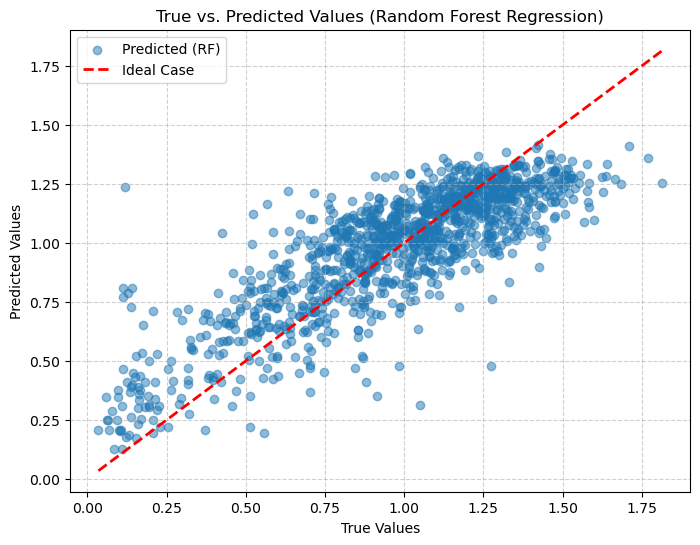


Explanation of True vs. Predicted Plot:
This scatter plot shows the relationship between the actual observed values (True Values) and the values predicted by the Random Forest model (Predicted Values) on the test set.
Ideally, the points should lie perfectly on the red 1:1 diagonal line.
Points close to the line indicate accurate predictions.
The spread of points around the line indicates the model's prediction error or variability.
A larger spread suggests lower prediction accuracy.


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Assumed variables available: y_test, y_pred_rf, grid_search_rf, best_model_rf, x_input (for column names)

print("\n--- Plotting Random Forest Evaluation Metrics ---")

# --- Plot 1: True vs. Predicted Values Scatter Plot (Random Forest) ---
print("Plotting True vs. Predicted Values (Random Forest)...")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Predicted (RF)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values (Random Forest Regression)')

# Plot the 1:1 diagonal line (Ideal Case)
min_val_rf_plot1 = min(y_test.min(), y_pred_rf.min())
max_val_rf_plot1 = max(y_test.max(), y_pred_rf.max())
plt.plot([min_val_rf_plot1, max_val_rf_plot1], [min_val_rf_plot1, max_val_rf_plot1], 'r--', lw=2, label='Ideal Case')

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# --- Explanation of Plot 1 ---
print("\nExplanation of True vs. Predicted Plot:")
print("This scatter plot shows the relationship between the actual observed values (True Values) and the values predicted by the Random Forest model (Predicted Values) on the test set.")
print("Ideally, the points should lie perfectly on the red 1:1 diagonal line.")
print("Points close to the line indicate accurate predictions.")
print("The spread of points around the line indicates the model's prediction error or variability.")
print("A larger spread suggests lower prediction accuracy.")





Plotting Residuals vs. Predicted Values (Random Forest)...


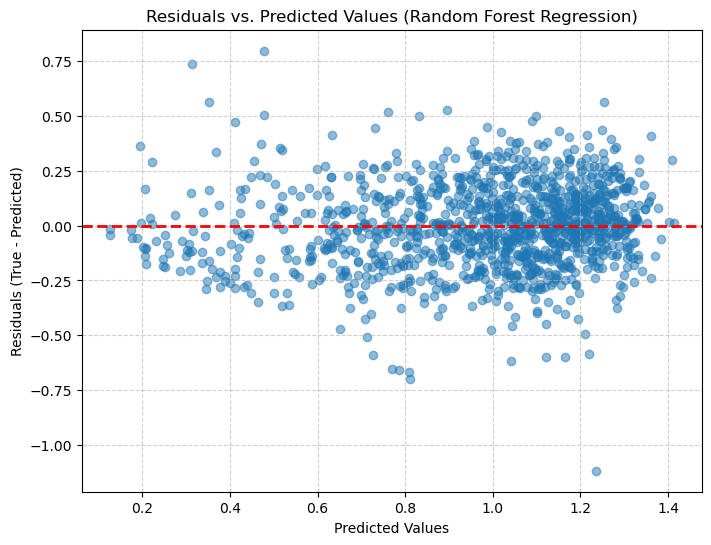


Explanation of Residuals vs. Predicted Plot:
This plot shows the prediction errors (Residuals) on the Y-axis against the predicted values on the X-axis.
Ideally, the residuals should be randomly scattered around the horizontal line at Y=0.
There should be no clear pattern (no trends, no fanning out/in of points).
Patterns in this plot (e.g., a curve, a cone shape) suggest that the model is not capturing some underlying relationship or that the variance of errors is not constant (heteroscedasticity).


In [12]:
# --- Calculate Residuals ---
residuals_rf = y_test - y_pred_rf


# --- Plot 2: Residuals vs. Predicted Values Scatter Plot (Random Forest) ---
print("\nPlotting Residuals vs. Predicted Values (Random Forest)...")

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2) # Draw a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (True - Predicted)') # Clarify residuals are True - Predicted
plt.title('Residuals vs. Predicted Values (Random Forest Regression)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- Explanation of Plot 2 ---
print("\nExplanation of Residuals vs. Predicted Plot:")
print("This plot shows the prediction errors (Residuals) on the Y-axis against the predicted values on the X-axis.")
print("Ideally, the residuals should be randomly scattered around the horizontal line at Y=0.")
print("There should be no clear pattern (no trends, no fanning out/in of points).")
print("Patterns in this plot (e.g., a curve, a cone shape) suggest that the model is not capturing some underlying relationship or that the variance of errors is not constant (heteroscedasticity).")





Plotting Residuals Distribution Histogram (Random Forest)...


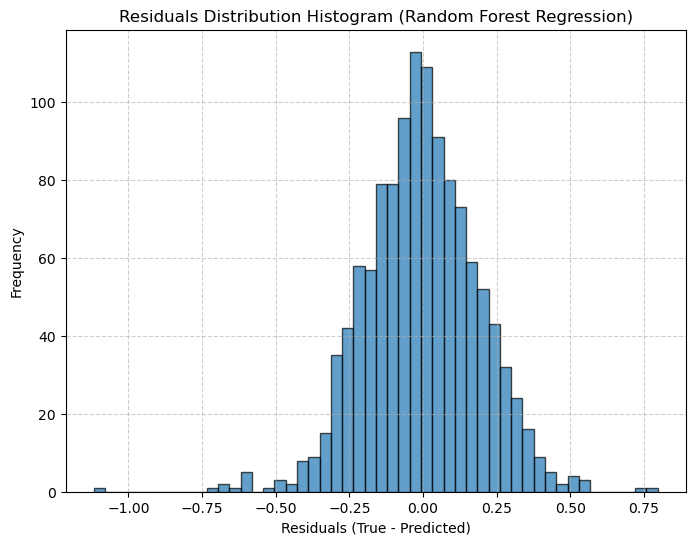


Explanation of Residuals Distribution Histogram:
This histogram shows how frequently different ranges of residual values occur.
For a well-performing regression model, the residuals should ideally be normally distributed around zero.
A symmetric, bell-shaped histogram centered near zero is desirable.
Skewness or multiple peaks might indicate issues with the model or the data.


In [13]:
# --- Plot 3: Residuals Distribution Histogram (Random Forest) ---
print("\nPlotting Residuals Distribution Histogram (Random Forest)...")

plt.figure(figsize=(8, 6))
plt.hist(residuals_rf, bins=50, edgecolor='black', alpha=0.7) # Adjust bins as needed
plt.xlabel('Residuals (True - Predicted)')
plt.ylabel('Frequency')
plt.title('Residuals Distribution Histogram (Random Forest Regression)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- Explanation of Plot 3 ---
print("\nExplanation of Residuals Distribution Histogram:")
print("This histogram shows how frequently different ranges of residual values occur.")
print("For a well-performing regression model, the residuals should ideally be normally distributed around zero.")
print("A symmetric, bell-shaped histogram centered near zero is desirable.")
print("Skewness or multiple peaks might indicate issues with the model or the data.")





Plotting Feature Importance (Random Forest)...


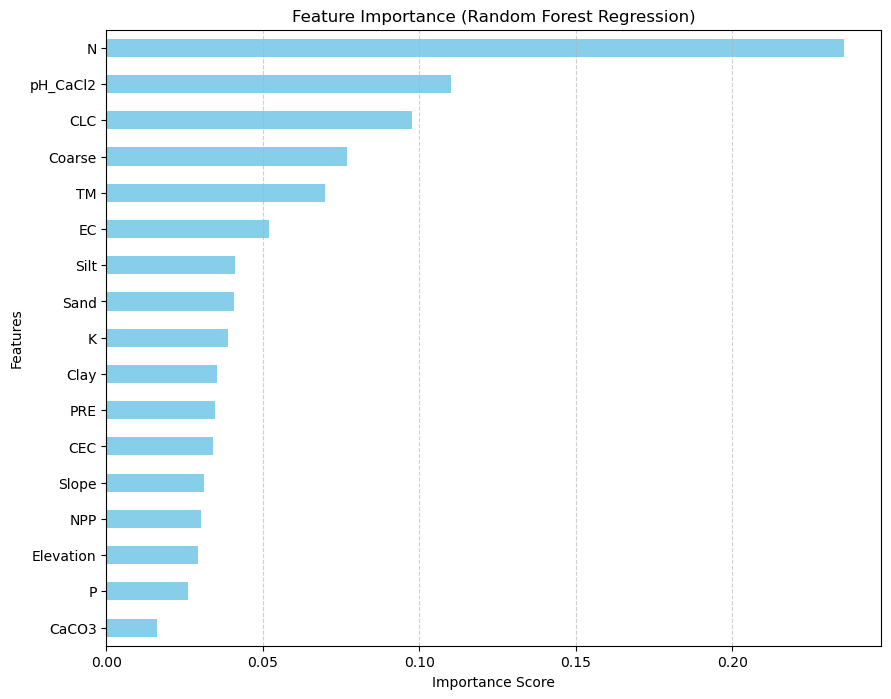

Feature Importance plot generated.

Explanation of Feature Importance Plot:
This horizontal bar chart shows the relative importance of each input feature as determined by the Random Forest model.
The length of each bar indicates the score, representing how much that feature contributed to reducing prediction error across all trees in the forest.
Features with longer bars (higher scores) are considered more influential in the model's predictions.
This plot helps identify the most important drivers of the target variable.


In [14]:
# --- Plot 4: Feature Importance Horizontal Bar Chart (Random Forest) ---
# Random Forest has a standard feature_importances_ attribute
print("\nPlotting Feature Importance (Random Forest)...")

# Check if x_input is a DataFrame to get column names
if not isinstance(x_input, pd.DataFrame):
    print("Warning: x_input is not a pandas DataFrame. Cannot get feature names directly for plotting.")
    print("Using generic feature names (e.g., Feature 0, Feature 1...).")
    feature_names = [f'Feature {i}' for i in range(X_train.shape[1])] # Use number of features from X_train/X_test
else:
    feature_names = x_input.columns.tolist()

# Get feature importances from the best model
# Ensure the number of importances matches the number of features
if len(best_model_rf.feature_importances_) != len(feature_names):
     print("Error: Number of feature importances does not match the number of feature names.")
     print("Cannot plot feature importance.")
else:
    importances = best_model_rf.feature_importances_

    # Create a DataFrame or Series for sorting and plotting
    feature_importance_rf = pd.Series(importances, index=feature_names)

    # Sort by importance in descending order
    feature_importance_rf = feature_importance_rf.sort_values(ascending=True) # Sort ascending for barh

    # Plot horizontal bar chart
    plt.figure(figsize=(10, 8)) # Adjust size as needed
    feature_importance_rf.plot(kind='barh', color='skyblue')

    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.title('Feature Importance (Random Forest Regression)')
    plt.grid(axis='x', linestyle='--', alpha=0.6) # Add vertical grid lines
    plt.show()

    print("Feature Importance plot generated.")

# --- Explanation of Plot 4 ---
print("\nExplanation of Feature Importance Plot:")
print("This horizontal bar chart shows the relative importance of each input feature as determined by the Random Forest model.")
print("The length of each bar indicates the score, representing how much that feature contributed to reducing prediction error across all trees in the forest.")
print("Features with longer bars (higher scores) are considered more influential in the model's predictions.")
print("This plot helps identify the most important drivers of the target variable.")





Plotting Performance vs. Number of Estimators (Random Forest)...


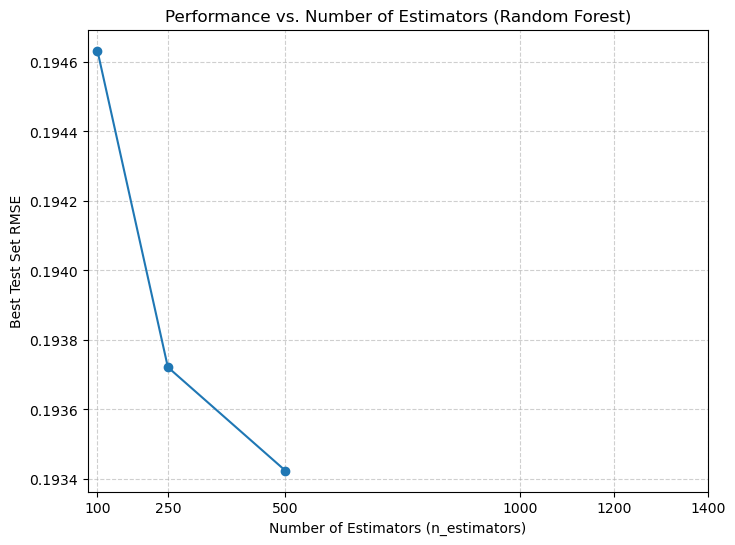

Performance vs. Number of Estimators plot generated.

Explanation of Performance vs. Number of Estimators Plot:
This plot shows how the model's best performance (measured by the minimum RMSE achieved in cross-validation) changes as you increase the number of trees (estimators) in the Random Forest.
Typically, RMSE decreases as the number of estimators increases, and then plateaus.
This plot helps determine a sufficient number of estimators to achieve good performance without unnecessary computational cost.

--- Random Forest Plotting Complete ---


In [19]:
# --- Plot 5: Performance (RMSE) vs. Number of Estimators (Random Forest) ---
# This plot requires the results from GridSearchCV
print("\nPlotting Performance vs. Number of Estimators (Random Forest)...")

# Access cv_results_ from the grid_search_rf object
results_rf = pd.DataFrame(grid_search_rf.cv_results_)

# Calculate RMSE from neg_mean_squared_error
results_rf['mean_test_rmse'] = np.sqrt(-results_rf['mean_test_score'])

# Group by n_estimators and find the minimum RMSE for each number of trees
# This shows the best performance achieved for a given number of trees across tested combinations of other parameters
estimators_vs_rmse_rf = results_rf.groupby('param_n_estimators')['mean_test_rmse'].min()

# Plot the relationship
plt.figure(figsize=(8, 6))
plt.plot(estimators_vs_rmse_rf.index, estimators_vs_rmse_rf.values, marker='o', linestyle='-')

plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Best Test Set RMSE')
plt.title('Performance vs. Number of Estimators (Random Forest)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(estimators_vs_rmse_rf.index) # Ensure X-axis ticks show tested estimator counts

plt.show()

print("Performance vs. Number of Estimators plot generated.")

# --- Explanation of Plot 5 ---
print("\nExplanation of Performance vs. Number of Estimators Plot:")
print("This plot shows how the model's best performance (measured by the minimum RMSE achieved in cross-validation) changes as you increase the number of trees (estimators) in the Random Forest.")
print("Typically, RMSE decreases as the number of estimators increases, and then plateaus.")
print("This plot helps determine a sufficient number of estimators to achieve good performance without unnecessary computational cost.")


print("\n--- Random Forest Plotting Complete ---")

#### CV

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor # 导入随机森林回归模型
import matplotlib.pyplot as plt


# --- 2. 数据标准化 ---
# 对协变量（特征）进行标准化。对于基于树的模型（如随机森林），标准化通常不是必须的，
# 因为它们对特征的尺度不敏感。但进行标准化也不会有害，并且对于后续尝试其他模型可能有用，
# 所以这里保留标准化步骤，你可以根据需要选择是否执行这部分。
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_input)
print("数据标准化完成。")


# --- 3. 划分训练集和测试集 ---
# random_state 保证每次划分结果一致，便于调试和比较不同模型
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_coarse_vol, test_size=0.2, random_state=100)
print(f"数据划分为训练集 ({X_train.shape[0]} 样本) 和测试集 ({X_test.shape[0]} 样本)。")

# 重新赋予列名 (可选，仅当 x_input 保持了列顺序且原 x_input 是 DataFrame 时有用)
# 这步对于随机森林模型本身拟合不是必需的，但如果后续需要查看 feature_importances 等属性时，保留列名更方便
if isinstance(x_input, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=x_input.columns)
    X_test = pd.DataFrame(X_test, columns=x_input.columns)
    print("已尝试重新赋予训练集和测试集特征列名。")
else:
    print("x_input 不是 pandas DataFrame，跳过重新赋予列名。")


# --- 4. 定义随机森林回归模型的超参数搜索空间 ---
# 这是一个常用的随机森林初始搜索网格，你可以根据数据规模和计算资源进行调整
# 调参方向：
# n_estimators: 树的数量，通常越大越好，计算量也越大
# max_depth: 树的最大深度，控制复杂性
# min_samples_split: 分裂内部节点所需最小样本数
# min_samples_leaf: 叶节点所需最小样本数
# max_features: 寻找最佳分裂时考虑的特征数量或比例
# bootstrap: 是否使用 bootstrap 样本 (默认为 True)
param_grid_rf = {
    'n_estimators': [100, 250, 500, 1000], # 可以先试试到 1000，避免失败
    'max_depth': [10, 15, 20, 25],         # *** 减小这里的最大深度限制 ***
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}
print("\n定义的随机森林超参数搜索空间:")
print(param_grid_rf)


# --- 5. 使用 GridSearchCV 进行交叉验证和超参数调优 ---
# 实例化 RandomForestRegressor 模型，设置 random_state 保证模型本身的随机性可重复
rf = RandomForestRegressor(random_state=42)

print("\n开始 GridSearchCV 调优 (随机森林)...")
# n_jobs=-1 表示使用所有可用的 CPU 核心进行并行计算，加速调优
grid_search_rf = GridSearchCV(
    estimator=rf, # 要调优的随机森林模型实例
    param_grid=param_grid_rf, # 定义的随机森林超参数网格
    cv=10, # 交叉验证折数 (例如 5 或 10)
    scoring='neg_mean_squared_error', # 评估指标 (以最小化负均方误差为目标)
    n_jobs=-1 # 并行计算
)

# 在训练集上进行网格搜索
grid_search_rf.fit(X_train, y_train)

print("GridSearchCV 调优完成 (随机森林)。")

# --- 6. 输出最佳参数 ---
print("\n随机森林最佳参数找到:")
print(grid_search_rf.best_params_)

# 获取具有最佳参数的模型
best_model_rf = grid_search_rf.best_estimator_
print("\n已获取最佳随机森林模型。")


# --- 7. 使用最佳模型进行预测和评估 ---
print("\n在测试集上评估最佳随机森林模型...")
# 在测试集上进行预测
y_pred_rf = best_model_rf.predict(X_test)

# 计算均方误差 (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'测试集 Mean Squared Error (MSE) (随机森林): {mse_rf}')

# 计算并输出 R² 分数
# best_model_rf.score() 方法对于回归模型默认计算 R² 分数
r2_rf = best_model_rf.score(X_test, y_test)
print(f'测试集 R² Score (随机森林): {r2_rf}')

数据标准化完成。
数据划分为训练集 (4841 样本) 和测试集 (1211 样本)。
已尝试重新赋予训练集和测试集特征列名。

定义的随机森林超参数搜索空间:
{'n_estimators': [100, 250, 500, 1000], 'max_depth': [10, 15, 20, 25], 'min_samples_split': [2], 'min_samples_leaf': [1], 'max_features': ['sqrt']}

开始 GridSearchCV 调优 (随机森林)...
GridSearchCV 调优完成 (随机森林)。

随机森林最佳参数找到:
{'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}

已获取最佳随机森林模型。

在测试集上评估最佳随机森林模型...
测试集 Mean Squared Error (MSE) (随机森林): 0.0003023340266448862
测试集 R² Score (随机森林): 0.8894604177558577


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor # 导入随机森林回归模型
import matplotlib.pyplot as plt


# --- 2. 数据标准化 ---
# 对协变量（特征）进行标准化。对于基于树的模型（如随机森林），标准化通常不是必须的，
# 因为它们对特征的尺度不敏感。但进行标准化也不会有害，并且对于后续尝试其他模型可能有用，
# 所以这里保留标准化步骤，你可以根据需要选择是否执行这部分。
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_input)
print("数据标准化完成。")


# --- 3. 划分训练集和测试集 ---
# random_state 保证每次划分结果一致，便于调试和比较不同模型
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_coarse_vol, test_size=0.2, random_state=100)
print(f"数据划分为训练集 ({X_train.shape[0]} 样本) 和测试集 ({X_test.shape[0]} 样本)。")

# 重新赋予列名 (可选，仅当 x_input 保持了列顺序且原 x_input 是 DataFrame 时有用)
# 这步对于随机森林模型本身拟合不是必需的，但如果后续需要查看 feature_importances 等属性时，保留列名更方便
if isinstance(x_input, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=x_input.columns)
    X_test = pd.DataFrame(X_test, columns=x_input.columns)
    print("已尝试重新赋予训练集和测试集特征列名。")
else:
    print("x_input 不是 pandas DataFrame，跳过重新赋予列名。")


# --- 4. 定义随机森林回归模型的超参数搜索空间 ---
# 这是一个常用的随机森林初始搜索网格，你可以根据数据规模和计算资源进行调整
# 调参方向：
# n_estimators: 树的数量，通常越大越好，计算量也越大
# max_depth: 树的最大深度，控制复杂性
# min_samples_split: 分裂内部节点所需最小样本数
# min_samples_leaf: 叶节点所需最小样本数
# max_features: 寻找最佳分裂时考虑的特征数量或比例
# bootstrap: 是否使用 bootstrap 样本 (默认为 True)
param_grid_rf = {
    'n_estimators': [250], # 可以先试试到 1000，避免失败
    'max_depth': [25],         # *** 减小这里的最大深度限制 ***
    'min_samples_split': [2, 5, 10],  # 分裂所需的最小样本数
    'min_samples_leaf': [1, 2, 4],    # 叶节点所需的最小样本数
    'max_features': ['sqrt', 'log2', 0.8], # 寻找最佳分裂时考虑的特征数 ('sqrt' 是总特征数的平方根，'log2' 是 log2，也可以是浮点数表示比例)
    
}
print("\n定义的随机森林超参数搜索空间:")
print(param_grid_rf)


# --- 5. 使用 GridSearchCV 进行交叉验证和超参数调优 ---
# 实例化 RandomForestRegressor 模型，设置 random_state 保证模型本身的随机性可重复
rf = RandomForestRegressor(random_state=42)

print("\n开始 GridSearchCV 调优 (随机森林)...")
# n_jobs=-1 表示使用所有可用的 CPU 核心进行并行计算，加速调优
grid_search_rf = GridSearchCV(
    estimator=rf, # 要调优的随机森林模型实例
    param_grid=param_grid_rf, # 定义的随机森林超参数网格
    cv=10, # 交叉验证折数 (例如 5 或 10)
    scoring='neg_mean_squared_error', # 评估指标 (以最小化负均方误差为目标)
    n_jobs=-1 # 并行计算
)

# 在训练集上进行网格搜索
grid_search_rf.fit(X_train, y_train)

print("GridSearchCV 调优完成 (随机森林)。")

# --- 6. 输出最佳参数 ---
print("\n随机森林最佳参数找到:")
print(grid_search_rf.best_params_)

# 获取具有最佳参数的模型
best_model_rf = grid_search_rf.best_estimator_
print("\n已获取最佳随机森林模型。")


# --- 7. 使用最佳模型进行预测和评估 ---
print("\n在测试集上评估最佳随机森林模型...")
# 在测试集上进行预测
y_pred_rf = best_model_rf.predict(X_test)

# 计算均方误差 (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'测试集 Mean Squared Error (MSE) (随机森林): {mse_rf}')

# 计算并输出 R² 分数
# best_model_rf.score() 方法对于回归模型默认计算 R² 分数
r2_rf = best_model_rf.score(X_test, y_test)
print(f'测试集 R² Score (随机森林): {r2_rf}')

数据标准化完成。
数据划分为训练集 (4841 样本) 和测试集 (1211 样本)。
已尝试重新赋予训练集和测试集特征列名。

定义的随机森林超参数搜索空间:
{'n_estimators': [250], 'max_depth': [25], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2', 0.8]}

开始 GridSearchCV 调优 (随机森林)...
GridSearchCV 调优完成 (随机森林)。

随机森林最佳参数找到:
{'max_depth': 25, 'max_features': 0.8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 250}

已获取最佳随机森林模型。

在测试集上评估最佳随机森林模型...
测试集 Mean Squared Error (MSE) (随机森林): 0.00022242083125603344
测试集 R² Score (随机森林): 0.9186783371945254


In [28]:
import joblib # 导入 joblib 库用于保存和加载模型
# --- *** 新增：保存训练好的最佳模型到本地 *** ---
model_filename = r'D:\study\组会\saved_models\random_forest_cv.joblib' # 定义模型保存文件名，你可以修改
try:
    joblib.dump(best_model_rf, model_filename)
    print(f"✅ 模型已成功保存到本地: {model_filename}")
except Exception as e:
    print(f"❌ 保存模型失败: {e}")
# 以后你可以使用 joblib.load(model_filename) 来加载模型


# --- *** 新增：保存 grid_search 对象到本地 *** ---
# 保存整个网格搜索结果对象
grid_search_results_filename = r'D:\study\组会\saved_models\random_forest_cv_grid_search.joblib' # 定义 grid_search 保存文件名
try:
    joblib.dump(grid_search_rf, grid_search_results_filename)
    print(f"✅ GridSearchCV 结果对象已成功保存到本地: {grid_search_results_filename}")
except Exception as e:
    print(f"❌ 保存 GridSearchCV 结果对象失败: {e}")

✅ 模型已成功保存到本地: D:\study\组会\saved_models\random_forest_cv.joblib
✅ GridSearchCV 结果对象已成功保存到本地: D:\study\组会\saved_models\random_forest_cv_grid_search.joblib


##### 绘图


--- Plotting Random Forest Evaluation Metrics ---
Plotting True vs. Predicted Values (Random Forest)...


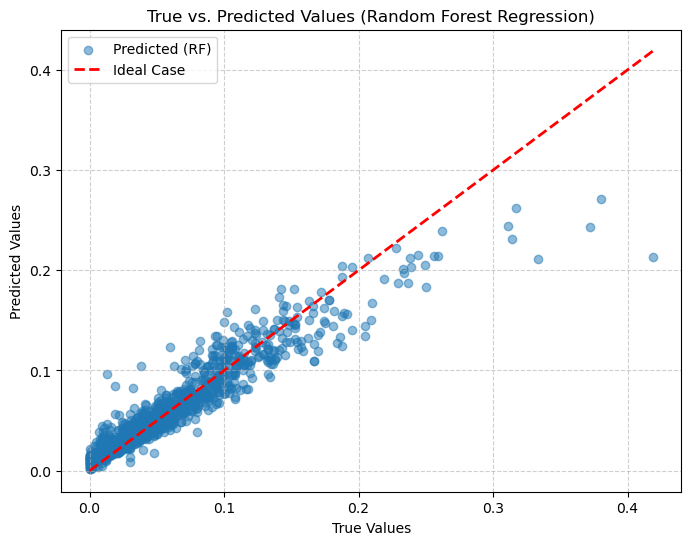

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Assumed variables available: y_test, y_pred_rf, grid_search_rf, best_model_rf, x_input (for column names)

print("\n--- Plotting Random Forest Evaluation Metrics ---")

# --- Plot 1: True vs. Predicted Values Scatter Plot (Random Forest) ---
print("Plotting True vs. Predicted Values (Random Forest)...")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Predicted (RF)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values (Random Forest Regression)')

# Plot the 1:1 diagonal line (Ideal Case)
min_val_rf_plot1 = min(y_test.min(), y_pred_rf.min())
max_val_rf_plot1 = max(y_test.max(), y_pred_rf.max())
plt.plot([min_val_rf_plot1, max_val_rf_plot1], [min_val_rf_plot1, max_val_rf_plot1], 'r--', lw=2, label='Ideal Case')

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()



Plotting Residuals vs. Predicted Values (Random Forest)...


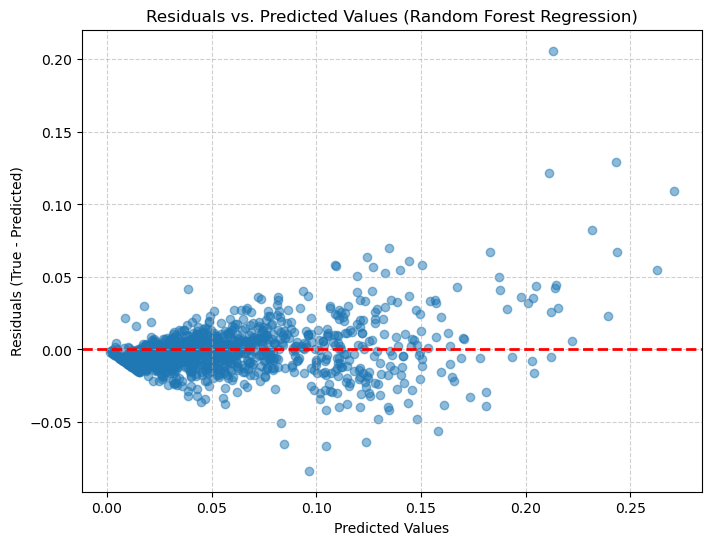


Explanation of Residuals vs. Predicted Plot:
This plot shows the prediction errors (Residuals) on the Y-axis against the predicted values on the X-axis.
Ideally, the residuals should be randomly scattered around the horizontal line at Y=0.
There should be no clear pattern (no trends, no fanning out/in of points).
Patterns in this plot (e.g., a curve, a cone shape) suggest that the model is not capturing some underlying relationship or that the variance of errors is not constant (heteroscedasticity).


In [ ]:
# --- Calculate Residuals ---
residuals_rf = y_test - y_pred_rf


# --- Plot 2: Residuals vs. Predicted Values Scatter Plot (Random Forest) ---
print("\nPlotting Residuals vs. Predicted Values (Random Forest)...")

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2) # Draw a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (True - Predicted)') # Clarify residuals are True - Predicted
plt.title('Residuals vs. Predicted Values (Random Forest Regression)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



Plotting Residuals Distribution Histogram (Random Forest)...


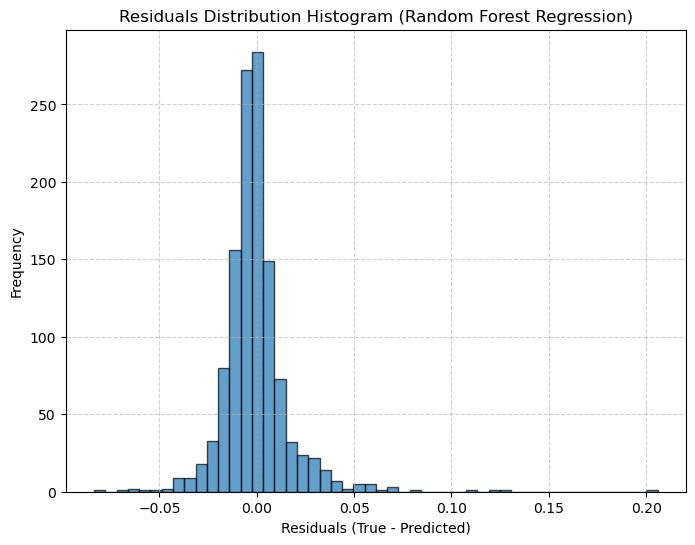

In [23]:
# --- Plot 3: Residuals Distribution Histogram (Random Forest) ---
print("\nPlotting Residuals Distribution Histogram (Random Forest)...")

plt.figure(figsize=(8, 6))
plt.hist(residuals_rf, bins=50, edgecolor='black', alpha=0.7) # Adjust bins as needed
plt.xlabel('Residuals (True - Predicted)')
plt.ylabel('Frequency')
plt.title('Residuals Distribution Histogram (Random Forest Regression)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



Plotting Feature Importance (Random Forest)...


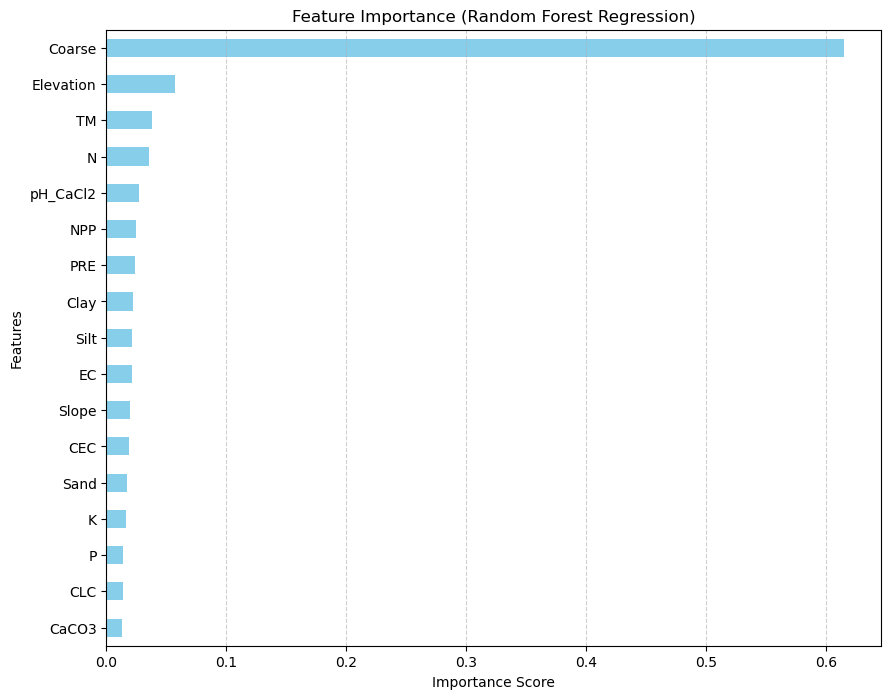

Feature Importance plot generated.


In [24]:
# --- Plot 4: Feature Importance Horizontal Bar Chart (Random Forest) ---
# Random Forest has a standard feature_importances_ attribute
print("\nPlotting Feature Importance (Random Forest)...")

# Check if x_input is a DataFrame to get column names
if not isinstance(x_input, pd.DataFrame):
    print("Warning: x_input is not a pandas DataFrame. Cannot get feature names directly for plotting.")
    print("Using generic feature names (e.g., Feature 0, Feature 1...).")
    feature_names = [f'Feature {i}' for i in range(X_train.shape[1])] # Use number of features from X_train/X_test
else:
    feature_names = x_input.columns.tolist()

# Get feature importances from the best model
# Ensure the number of importances matches the number of features
if len(best_model_rf.feature_importances_) != len(feature_names):
     print("Error: Number of feature importances does not match the number of feature names.")
     print("Cannot plot feature importance.")
else:
    importances = best_model_rf.feature_importances_

    # Create a DataFrame or Series for sorting and plotting
    feature_importance_rf = pd.Series(importances, index=feature_names)

    # Sort by importance in descending order
    feature_importance_rf = feature_importance_rf.sort_values(ascending=True) # Sort ascending for barh

    # Plot horizontal bar chart
    plt.figure(figsize=(10, 8)) # Adjust size as needed
    feature_importance_rf.plot(kind='barh', color='skyblue')

    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.title('Feature Importance (Random Forest Regression)')
    plt.grid(axis='x', linestyle='--', alpha=0.6) # Add vertical grid lines
    plt.show()

    print("Feature Importance plot generated.")



Plotting Performance vs. Number of Estimators (Random Forest)...


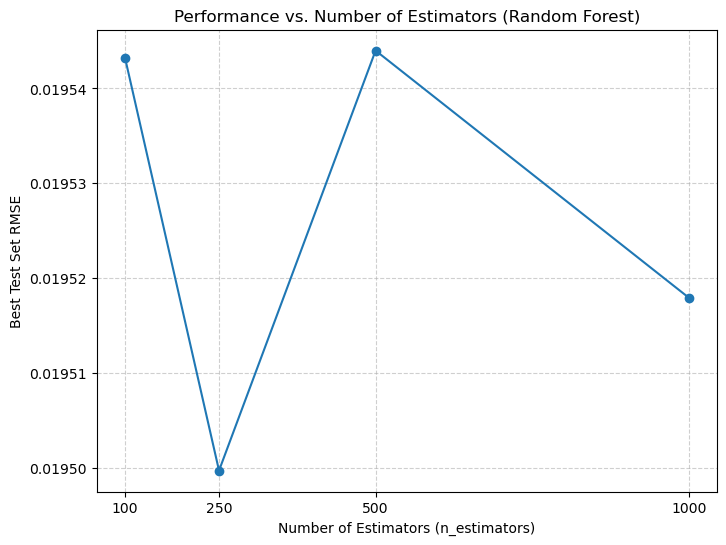

In [25]:
# --- Plot 5: Performance (RMSE) vs. Number of Estimators (Random Forest) ---
# This plot requires the results from GridSearchCV
print("\nPlotting Performance vs. Number of Estimators (Random Forest)...")

# Access cv_results_ from the grid_search_rf object
results_rf = pd.DataFrame(grid_search_rf.cv_results_)

# Calculate RMSE from neg_mean_squared_error
results_rf['mean_test_rmse'] = np.sqrt(-results_rf['mean_test_score'])

# Group by n_estimators and find the minimum RMSE for each number of trees
# This shows the best performance achieved for a given number of trees across tested combinations of other parameters
estimators_vs_rmse_rf = results_rf.groupby('param_n_estimators')['mean_test_rmse'].min()

# Plot the relationship
plt.figure(figsize=(8, 6))
plt.plot(estimators_vs_rmse_rf.index, estimators_vs_rmse_rf.values, marker='o', linestyle='-')

plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Best Test Set RMSE')
plt.title('Performance vs. Number of Estimators (Random Forest)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(estimators_vs_rmse_rf.index) # Ensure X-axis ticks show tested estimator counts

plt.show()


### GBM

#### BD

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor # 导入 Gradient Boosting 回归模型
import matplotlib.pyplot as plt


# --- 2. 数据标准化 ---
# 对协变量（特征）进行标准化。对于基于树的模型（如 GBM），标准化通常不是必须的，
# 因为它们对特征的尺度不敏感。但进行标准化也不会有害，并且对于后续尝试其他模型可能有用，
# 所以这里保留标准化步骤，你可以根据需要选择是否执行这部分。
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_input)
print("数据标准化完成。")


# --- 3. 划分训练集和测试集 ---
# random_state 保证每次划分结果一致，便于调试和比较不同模型
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_bdfine, test_size=0.2, random_state=100)
print(f"数据划分为训练集 ({X_train.shape[0]} 样本) 和测试集 ({X_test.shape[0]} 样本)。")

# 重新赋予列名 (可选，仅当 x_input 保持了列顺序且原 x_input 是 DataFrame 时有用)
# 这步对于 GBM 模型本身拟合不是必需的，但如果后续需要查看 feature_importances_ 等属性时，保留列名更方便
if isinstance(x_input, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=x_input.columns)
    X_test = pd.DataFrame(X_test, columns=x_input.columns)
    print("已尝试重新赋予训练集和测试集特征列名。")
else:
    print("x_input 不是 pandas DataFrame，跳过重新赋予列名。")


# --- 4. 定义 Gradient Boosting 回归模型的超参数搜索空间 ---
# GBM 的关键超参数：
# n_estimators: 提升阶段的数量（即树的数量）
# learning_rate: 学习率，控制每棵树对最终结果的贡献，较小的值需要更多树
# max_depth: 每棵树的最大深度，通常较小 (如 3-5) 以防止过拟合
# min_samples_split: 分裂内部节点所需最小样本数
# min_samples_leaf: 叶节点所需最小样本数
# subsample: 用于训练每棵树的样本比例 (小于 1.0 引入随机性，减少方差)
# max_features: 寻找最佳分裂时考虑的特征数量或比例
# loss: 损失函数 (回归通常用 'squared_error')
# random_state: 保证结果可重复性 (在模型实例化时设置)

# 这是一个常用的 GBM 初始搜索网格，你需要根据数据和计算资源调整
param_grid_gbm = {
    'n_estimators': [100, 300, 400,600,800],          # 树的数量
    'learning_rate': [0.05, 0.1, 0.2],   # 学习率
    'max_depth': [3, 4, 5],              # 树的最大深度，通常较小
    'min_samples_split': [2, 5],         # 分裂所需的最小样本数
    'min_samples_leaf': [1, 5],          # 叶节点所需的最小样本数
    'subsample': [0.8, 1.0],             # 用于训练每棵树的样本比例
    'max_features': ['sqrt'],            # 寻找最佳分裂时考虑的特征数
}

print("\n定义的 Gradient Boosting 超参数搜索空间:")
print(param_grid_gbm)


# --- 5. 使用 GridSearchCV 进行交叉验证和超参数调优 ---
# 实例化 GradientBoostingRegressor 模型，设置 random_state 保证可重复性
# loss 参数通常使用默认的 'squared_error' 或 'absolute_error'
gbm = GradientBoostingRegressor(random_state=42, loss='squared_error')

print("\n开始 GridSearchCV 调优 (Gradient Boosting)...")
# n_jobs=-1 表示使用所有可用的 CPU 核心进行并行计算 (并行化是在不同交叉验证折上)
grid_search_gbm = GridSearchCV(
    estimator=gbm, # 要调优的 Gradient Boosting 模型实例
    param_grid=param_grid_gbm, # 定义的超参数网格
    cv=10, # 交叉验证折数 (例如 5 或 10)
    scoring='neg_mean_squared_error', # 评估指标 (以最小化负均方误差为目标)
    n_jobs=-1 # 并行计算
)

# 在训练集上进行网格搜索
grid_search_gbm.fit(X_train, y_train)

print("GridSearchCV 调优完成 (Gradient Boosting)。")

# --- 6. 输出最佳参数 ---
print("\nGradient Boosting 最佳参数找到:")
print(grid_search_gbm.best_params_)

# 获取具有最佳参数的模型
best_model_gbm = grid_search_gbm.best_estimator_
print("\n已获取最佳 Gradient Boosting 模型。")


# --- 7. 使用最佳模型进行预测和评估 ---
print("\n在测试集上评估最佳 Gradient Boosting 模型...")
# 在测试集上进行预测
y_pred_gbm = best_model_gbm.predict(X_test)

# 计算均方误差 (MSE)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
print(f'测试集 Mean Squared Error (MSE) (Gradient Boosting): {mse_gbm}')

# 计算并输出 R² 分数
# best_model_gbm.score() 方法对于回归模型默认计算 R² 分数
r2_gbm = best_model_gbm.score(X_test, y_test)
print(f'测试集 R² Score (Gradient Boosting): {r2_gbm}')


print("\nGradient Boosting 脚本运行完毕。")

数据标准化完成。
数据划分为训练集 (4841 样本) 和测试集 (1211 样本)。
已尝试重新赋予训练集和测试集特征列名。

定义的 Gradient Boosting 超参数搜索空间:
{'n_estimators': [100, 300, 400, 600, 800], 'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 5], 'subsample': [0.8, 1.0], 'max_features': ['sqrt']}

开始 GridSearchCV 调优 (Gradient Boosting)...
GridSearchCV 调优完成 (Gradient Boosting)。

Gradient Boosting 最佳参数找到:
{'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 600, 'subsample': 0.8}

已获取最佳 Gradient Boosting 模型。

在测试集上评估最佳 Gradient Boosting 模型...
测试集 Mean Squared Error (MSE) (Gradient Boosting): 0.03534357080627955
测试集 R² Score (Gradient Boosting): 0.7003181938940914

Gradient Boosting 脚本运行完毕。


In [53]:
import joblib # 导入 joblib 库用于保存和加载模型
# --- *** 新增：保存训练好的最佳模型到本地 *** ---
model_filename = r'D:\study\组会\saved_models\gbm_bd.joblib' # 定义模型保存文件名，你可以修改
try:
    joblib.dump(best_model_gbm, model_filename)
    print(f"✅ 模型已成功保存到本地: {model_filename}")
except Exception as e:
    print(f"❌ 保存模型失败: {e}")
# 以后你可以使用 joblib.load(model_filename) 来加载模型


# --- *** 新增：保存 grid_search 对象到本地 *** ---
# 保存整个网格搜索结果对象
grid_search_results_filename = r'D:\study\组会\saved_models\gbm_bd_grid_search.joblib' # 定义 grid_search 保存文件名
try:
    joblib.dump(grid_search_gbm, grid_search_results_filename)
    print(f"✅ GridSearchCV 结果对象已成功保存到本地: {grid_search_results_filename}")
except Exception as e:
    print(f"❌ 保存 GridSearchCV 结果对象失败: {e}")

✅ 模型已成功保存到本地: D:\study\组会\saved_models\gbm_bd.joblib
✅ GridSearchCV 结果对象已成功保存到本地: D:\study\组会\saved_models\gbm_bd_grid_search.joblib


##### 绘图

In [4]:
import joblib # 导入 joblib 库用于保存和加载模型
# 数据标准化（对协变量进行标准化）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_input)
print("数据标准化完成。")
# --- 3. 划分训练集和测试集 ---
# random_state 保证每次划分结果一致，便于调试和比较不同模型
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_bdfine, test_size=0.2, random_state=100)
print(f"数据划分为训练集 ({X_train.shape[0]} 样本) 和测试集 ({X_test.shape[0]} 样本)。")

# 重新赋予列名 (可选，仅当 x_input 保持了列顺序且原 x_input 是 DataFrame 时有用)
# 这步对于 GBM 模型本身拟合不是必需的，但如果后续需要查看 feature_importances_ 等属性时，保留列名更方便
if isinstance(x_input, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=x_input.columns)
    X_test = pd.DataFrame(X_test, columns=x_input.columns)
    print("已尝试重新赋予训练集和测试集特征列名。")
else:
    print("x_input 不是 pandas DataFrame，跳过重新赋予列名。")

model_filename = r'D:\study\组会\saved_models\gbm_bd.joblib'             # 最佳模型文件路径
grid_search_results_filename = r'D:\study\组会\saved_models\gbm_bd_grid_search.joblib' # GridSearchCV 结果文件路径

# --- *** 5. 从本地加载模型和 GridSearchCV 结果对象 (无错误处理) *** ---
print(f"\n--- 尝试从本地加载模型和 GridSearchCV 结果 (无错误处理) ---")

# 加载最佳模型 - 如果文件不存在或路径错误，这里会崩溃
loaded_best_model_gbm = joblib.load(model_filename)
print(f"✅ 最佳模型已成功从本地加载。")

# 加载 GridSearchCV 结果对象 - 如果文件不存在或路径错误，这里会崩溃
loaded_grid_search_gbm = joblib.load(grid_search_results_filename)
print(f"✅ GridSearchCV 结果对象已成功从本地加载。")


数据标准化完成。
数据划分为训练集 (4841 样本) 和测试集 (1211 样本)。
已尝试重新赋予训练集和测试集特征列名。

--- 尝试从本地加载模型和 GridSearchCV 结果 (无错误处理) ---
✅ 最佳模型已成功从本地加载。
✅ GridSearchCV 结果对象已成功从本地加载。



--- 绘制 Gradient Boosting 评估和分析图表 ---
测试集 Mean Squared Error (MSE) (Gradient Boosting): 0.03533546482753867
测试集 R² Score (Gradient Boosting): 0.7003869253293682

Plotting True vs. Predicted Values...


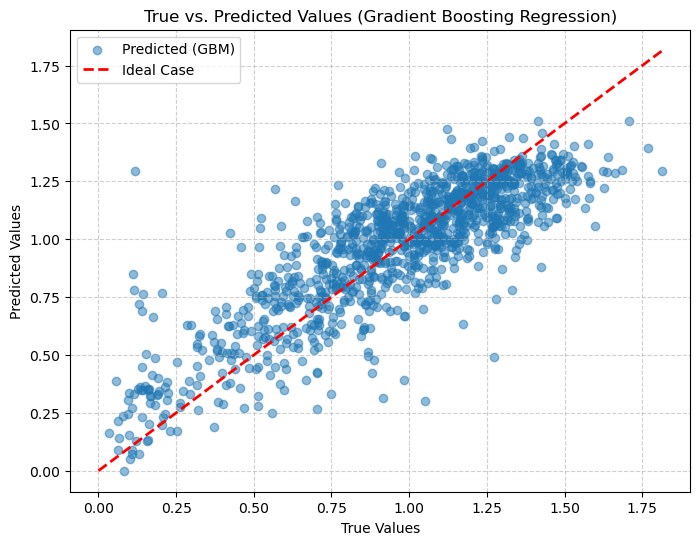

In [11]:
print("\n--- 绘制 Gradient Boosting 评估和分析图表 ---")

# --- 计算预测值和残差 (需要加载模型和测试数据) ---
# 如果 loaded_best_model_gbm 加载失败，这里会崩溃
y_pred_gbm = loaded_best_model_gbm.predict(X_test)
y_pred_gbm[y_pred_gbm < 0] = 0 
residuals_gbm = y_test - y_pred_gbm

# --- 计算评估指标 (这里移除打印以简化，如果需要请自行添加) ---
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
print(f'测试集 Mean Squared Error (MSE) (Gradient Boosting): {mse_gbm}')

r2_gbm = r2_score(y_test, y_pred_gbm)
print(f'测试集 R² Score (Gradient Boosting): {r2_gbm}')


# --- 图表 1: True vs. Predicted Values Scatter Plot ---
print("\nPlotting True vs. Predicted Values...")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gbm, alpha=0.5, label='Predicted (GBM)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values (Gradient Boosting Regression)')
min_val_plot1 = min(y_test.min(), y_pred_gbm.min())
max_val_plot1 = max(y_test.max(), y_pred_gbm.max())
plt.plot([min_val_plot1, max_val_plot1], [min_val_plot1, max_val_plot1], 'r--', lw=2, label='Ideal Case')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()
plt.show()



Plotting Residuals vs. Predicted Values...


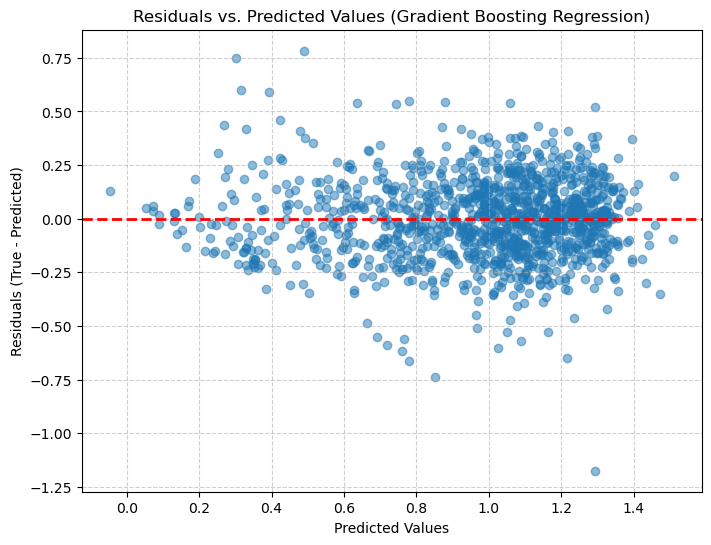

In [12]:
# --- 图表 2: Residuals vs. Predicted Values Scatter Plot ---
print("\nPlotting Residuals vs. Predicted Values...")
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_gbm, residuals_gbm, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (True - Predicted)')
plt.title('Residuals vs. Predicted Values (Gradient Boosting Regression)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Plotting Residuals Distribution Histogram...


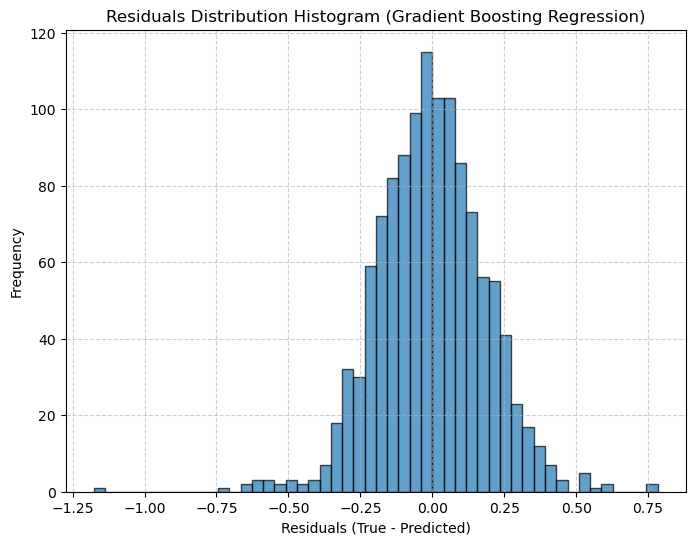

In [57]:
# --- 图表 3: Residuals Distribution Histogram ---
print("\nPlotting Residuals Distribution Histogram...")
plt.figure(figsize=(8, 6))
plt.hist(residuals_gbm, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals (True - Predicted)')
plt.ylabel('Frequency')
plt.title('Residuals Distribution Histogram (Gradient Boosting Regression)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Plotting Feature Importance...


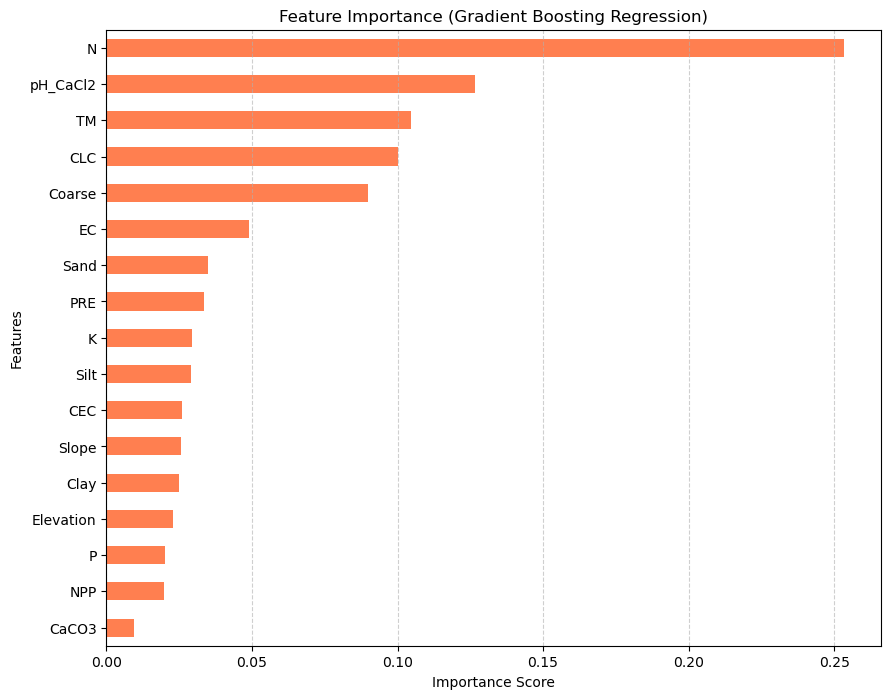

Feature Importance plot generated.


In [58]:
# --- 图表 4: Feature Importance Horizontal Bar Chart ---
print("\nPlotting Feature Importance...")
# 如果 feature_names 数量与 feature_importances_ 不匹配，这里会崩溃
importances = loaded_best_model_gbm.feature_importances_
feature_importance_gbm = pd.Series(importances, index=feature_names)
feature_importance_gbm = feature_importance_gbm.sort_values(ascending=True)

plt.figure(figsize=(10, 8))
feature_importance_gbm.plot(kind='barh', color='coral')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (Gradient Boosting Regression)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()
print("Feature Importance plot generated.")


Plotting Performance vs. Hyperparameters (from GridSearchCV results)...

Plotting Performance vs. Number of Estimators...


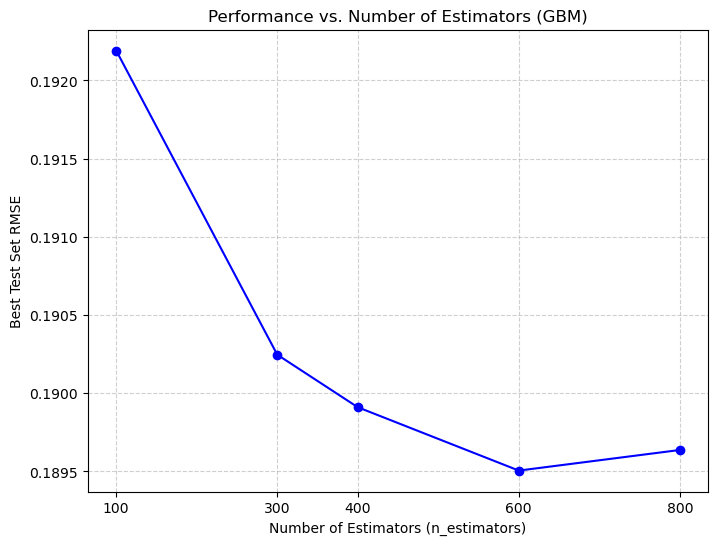

Performance vs. Number of Estimators plot generated.

Plotting Performance vs. Learning Rate...


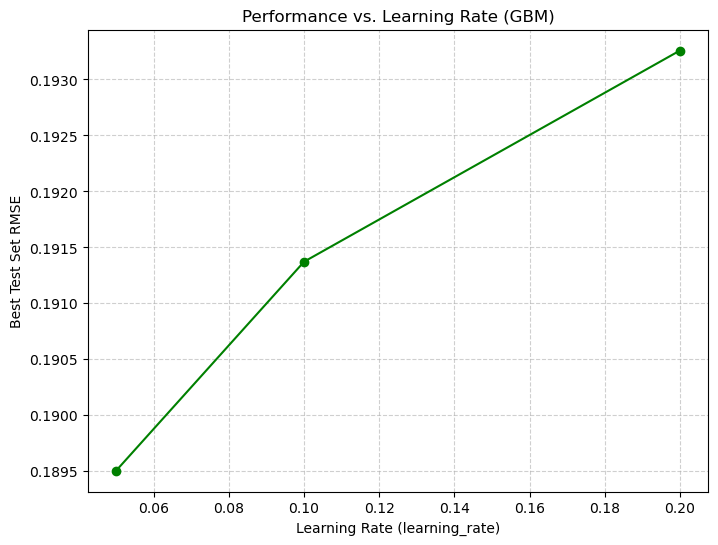

Performance vs. Learning Rate plot generated.

Plotting Performance vs. Max Depth...


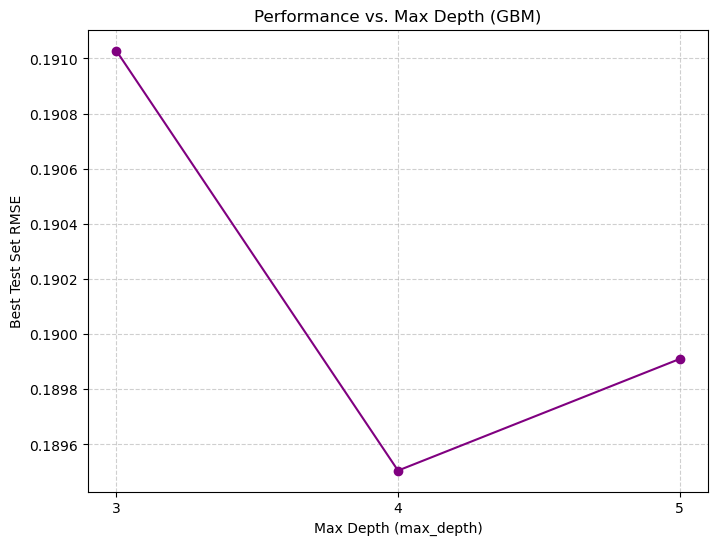

Performance vs. Max Depth plot generated.

Plotting Performance vs. Subsample...


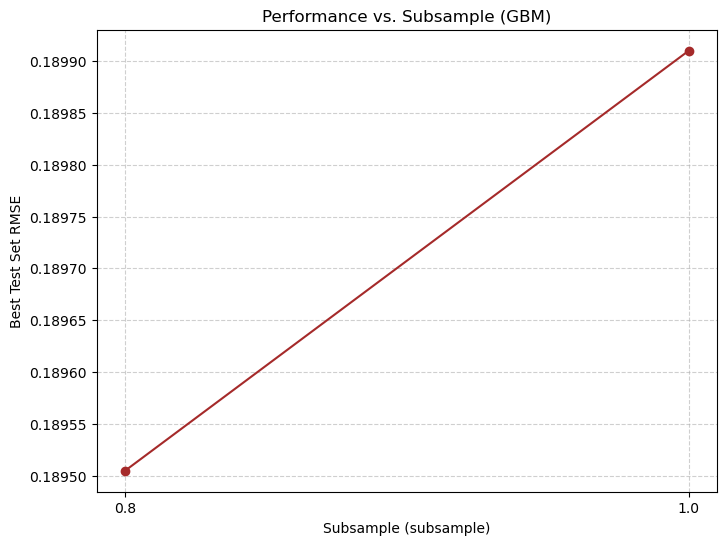

Performance vs. Subsample plot generated.


: 

In [ ]:
# --- 图表 5: Performance (Best RMSE) vs. Hyperparameters (from GridSearchCV results) ---
print("\nPlotting Performance vs. Hyperparameters (from GridSearchCV results)...")

# 如果 loaded_grid_search_gbm 加载失败，这里会崩溃
results_gbm = pd.DataFrame(loaded_grid_search_gbm.cv_results_)
results_gbm['mean_test_rmse'] = np.sqrt(-results_gbm['mean_test_score'])

# Plot vs n_estimators - 如果 'param_n_estimators' 列不存在，这里会崩溃
print("\nPlotting Performance vs. Number of Estimators...")
estimators_vs_rmse_gbm = results_gbm.groupby('param_n_estimators')['mean_test_rmse'].min()
plt.figure(figsize=(8, 6))
plt.plot(estimators_vs_rmse_gbm.index, estimators_vs_rmse_gbm.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Best Test Set RMSE')
plt.title('Performance vs. Number of Estimators (GBM)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(estimators_vs_rmse_gbm.index)
plt.show()
print("Performance vs. Number of Estimators plot generated.")

# Plot vs learning_rate - 如果 'param_learning_rate' 列不存在，这里会崩溃
print("\nPlotting Performance vs. Learning Rate...")
learning_rate_vs_rmse_gbm = results_gbm.groupby('param_learning_rate')['mean_test_rmse'].min()
plt.figure(figsize=(8, 6))
plt.plot(learning_rate_vs_rmse_gbm.index, learning_rate_vs_rmse_gbm.values, marker='o', linestyle='-', color='green')
plt.xlabel('Learning Rate (learning_rate)')
plt.ylabel('Best Test Set RMSE')
plt.title('Performance vs. Learning Rate (GBM)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
print("Performance vs. Learning Rate plot generated.")

# Add plots for other parameters if they exist in the grid search results
# Example for max_depth - 如果 'param_max_depth' 列不存在，这里会崩溃
print("\nPlotting Performance vs. Max Depth...")
max_depth_vs_rmse_gbm = results_gbm.groupby('param_max_depth')['mean_test_rmse'].min()
plt.figure(figsize=(8, 6))
plt.plot(max_depth_vs_rmse_gbm.index, max_depth_vs_rmse_gbm.values, marker='o', linestyle='-', color='purple')
plt.xlabel('Max Depth (max_depth)')
plt.ylabel('Best Test Set RMSE')
plt.title('Performance vs. Max Depth (GBM)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(max_depth_vs_rmse_gbm.index)
plt.show()
print("Performance vs. Max Depth plot generated.")

# Example for subsample - 如果 'param_subsample' 列不存在，这里会崩溃
print("\nPlotting Performance vs. Subsample...")
subsample_vs_rmse_gbm = results_gbm.groupby('param_subsample')['mean_test_rmse'].min()
plt.figure(figsize=(8, 6))
plt.plot(subsample_vs_rmse_gbm.index, subsample_vs_rmse_gbm.values, marker='o', linestyle='-', color='brown')
plt.xlabel('Subsample (subsample)')
plt.ylabel('Best Test Set RMSE')
plt.title('Performance vs. Subsample (GBM)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(subsample_vs_rmse_gbm.index)
plt.show()
print("Performance vs. Subsample plot generated.")


#### CV

数据标准化完成。
数据划分为训练集 (4841 样本) 和测试集 (1211 样本)。
已尝试重新赋予训练集和测试集特征列名。

定义的 Gradient Boosting 超参数搜索空间:
{'n_estimators': [100, 300, 400, 600, 800], 'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 5], 'subsample': [0.8, 1.0], 'max_features': ['sqrt']}

开始 GridSearchCV 调优 (Gradient Boosting)...
GridSearchCV 调优完成 (Gradient Boosting)。

Gradient Boosting 最佳参数找到:
{'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 800, 'subsample': 0.8}

已获取最佳 Gradient Boosting 模型。

在测试集上评估最佳 Gradient Boosting 模型...
测试集 Mean Squared Error (MSE) (Gradient Boosting): 0.0002233882817987419
测试集 R² Score (Gradient Boosting): 0.9183246172377623

绘制真实值 vs 预测值散点图 (Gradient Boosting)...


c:\Users\86186\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\86186\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\86186\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\86186\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\86186\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from current font.
  fig.canvas.print_figure(bytes_

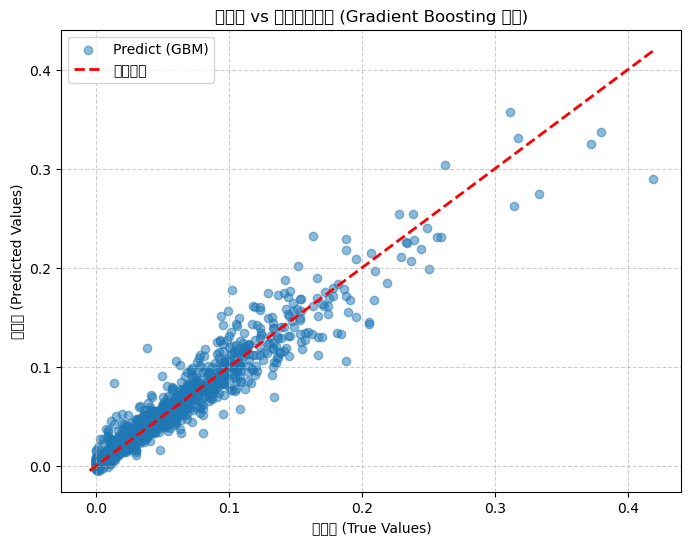


Gradient Boosting 脚本运行完毕。


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor # 导入 Gradient Boosting 回归模型
import matplotlib.pyplot as plt


# --- 2. 数据标准化 ---
# 对协变量（特征）进行标准化。对于基于树的模型（如 GBM），标准化通常不是必须的，
# 因为它们对特征的尺度不敏感。但进行标准化也不会有害，并且对于后续尝试其他模型可能有用，
# 所以这里保留标准化步骤，你可以根据需要选择是否执行这部分。
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_input)
print("数据标准化完成。")


# --- 3. 划分训练集和测试集 ---
# random_state 保证每次划分结果一致，便于调试和比较不同模型
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_coarse_vol, test_size=0.2, random_state=100)
print(f"数据划分为训练集 ({X_train.shape[0]} 样本) 和测试集 ({X_test.shape[0]} 样本)。")

# 重新赋予列名 (可选，仅当 x_input 保持了列顺序且原 x_input 是 DataFrame 时有用)
# 这步对于 GBM 模型本身拟合不是必需的，但如果后续需要查看 feature_importances_ 等属性时，保留列名更方便
if isinstance(x_input, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=x_input.columns)
    X_test = pd.DataFrame(X_test, columns=x_input.columns)
    print("已尝试重新赋予训练集和测试集特征列名。")
else:
    print("x_input 不是 pandas DataFrame，跳过重新赋予列名。")


# --- 4. 定义 Gradient Boosting 回归模型的超参数搜索空间 ---
# GBM 的关键超参数：
# n_estimators: 提升阶段的数量（即树的数量）
# learning_rate: 学习率，控制每棵树对最终结果的贡献，较小的值需要更多树
# max_depth: 每棵树的最大深度，通常较小 (如 3-5) 以防止过拟合
# min_samples_split: 分裂内部节点所需最小样本数
# min_samples_leaf: 叶节点所需最小样本数
# subsample: 用于训练每棵树的样本比例 (小于 1.0 引入随机性，减少方差)
# max_features: 寻找最佳分裂时考虑的特征数量或比例
# loss: 损失函数 (回归通常用 'squared_error')
# random_state: 保证结果可重复性 (在模型实例化时设置)

# 这是一个常用的 GBM 初始搜索网格，你需要根据数据和计算资源调整
param_grid_gbm = {
    'n_estimators': [100, 300, 400,600,800],          # 树的数量
    'learning_rate': [0.05, 0.1, 0.2],   # 学习率
    'max_depth': [3, 4, 5],              # 树的最大深度，通常较小
    'min_samples_split': [2, 5],         # 分裂所需的最小样本数
    'min_samples_leaf': [1, 5],          # 叶节点所需的最小样本数
    'subsample': [0.8, 1.0],             # 用于训练每棵树的样本比例
    'max_features': ['sqrt'],            # 寻找最佳分裂时考虑的特征数
}
print("\n定义的 Gradient Boosting 超参数搜索空间:")
print(param_grid_gbm)


# --- 5. 使用 GridSearchCV 进行交叉验证和超参数调优 ---
# 实例化 GradientBoostingRegressor 模型，设置 random_state 保证可重复性
# loss 参数通常使用默认的 'squared_error' 或 'absolute_error'
gbm = GradientBoostingRegressor(random_state=42, loss='squared_error')

print("\n开始 GridSearchCV 调优 (Gradient Boosting)...")
# n_jobs=-1 表示使用所有可用的 CPU 核心进行并行计算 (并行化是在不同交叉验证折上)
grid_search_gbm = GridSearchCV(
    estimator=gbm, # 要调优的 Gradient Boosting 模型实例
    param_grid=param_grid_gbm, # 定义的超参数网格
    cv=10, # 交叉验证折数 (例如 5 或 10)
    scoring='neg_mean_squared_error', # 评估指标 (以最小化负均方误差为目标)
    n_jobs=-1 # 并行计算
)

# 在训练集上进行网格搜索
grid_search_gbm.fit(X_train, y_train)

print("GridSearchCV 调优完成 (Gradient Boosting)。")

# --- 6. 输出最佳参数 ---
print("\nGradient Boosting 最佳参数找到:")
print(grid_search_gbm.best_params_)

# 获取具有最佳参数的模型
best_model_gbm = grid_search_gbm.best_estimator_
print("\n已获取最佳 Gradient Boosting 模型。")


# --- 7. 使用最佳模型进行预测和评估 ---
print("\n在测试集上评估最佳 Gradient Boosting 模型...")
# 在测试集上进行预测
y_pred_gbm = best_model_gbm.predict(X_test)

# 计算均方误差 (MSE)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
print(f'测试集 Mean Squared Error (MSE) (Gradient Boosting): {mse_gbm}')

# 计算并输出 R² 分数
# best_model_gbm.score() 方法对于回归模型默认计算 R² 分数
r2_gbm = best_model_gbm.score(X_test, y_test)
print(f'测试集 R² Score (Gradient Boosting): {r2_gbm}')

# --- 8. 绘制结果图 ---
print("\n绘制真实值 vs 预测值散点图 (Gradient Boosting)...")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gbm, alpha=0.5, label='Predict (GBM)')
plt.xlabel('真实值 (True Values)')
plt.ylabel('预测值 (Predicted Values)')
plt.title('真实值 vs 预测值关系图 (Gradient Boosting 回归)')

# 绘制对角线 (理想情况)
min_val_gbm = min(y_test.min(), y_pred_gbm.min())
max_val_gbm = max(y_test.max(), y_pred_gbm.max())
plt.plot([min_val_gbm, max_val_gbm], [min_val_gbm, max_val_gbm], 'r--', lw=2, label='理想情况')

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

print("\nGradient Boosting 脚本运行完毕。")

In [14]:
import joblib # 导入 joblib 库用于保存和加载模型
# --- *** 新增：保存训练好的最佳模型到本地 *** ---
model_filename = r'D:\study\组会\saved_models\gbm_cv.joblib' # 定义模型保存文件名，你可以修改
try:
    joblib.dump(best_model_gbm, model_filename)
    print(f"✅ 模型已成功保存到本地: {model_filename}")
except Exception as e:
    print(f"❌ 保存模型失败: {e}")
# 以后你可以使用 joblib.load(model_filename) 来加载模型


# --- *** 新增：保存 grid_search 对象到本地 *** ---
# 保存整个网格搜索结果对象
grid_search_results_filename = r'D:\study\组会\saved_models\gbm_cv_grid_search.joblib' # 定义 grid_search 保存文件名
try:
    joblib.dump(grid_search_gbm, grid_search_results_filename)
    print(f"✅ GridSearchCV 结果对象已成功保存到本地: {grid_search_results_filename}")
except Exception as e:
    print(f"❌ 保存 GridSearchCV 结果对象失败: {e}")

✅ 模型已成功保存到本地: D:\study\组会\saved_models\gbm_cv.joblib
✅ GridSearchCV 结果对象已成功保存到本地: D:\study\组会\saved_models\gbm_cv_grid_search.joblib


##### 绘图

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_coarse_vol, test_size=0.2, random_state=100)

model_filename = r'D:\study\组会\saved_models\gbm_cv.joblib'             # 最佳模型文件路径
grid_search_results_filename = r'D:\study\组会\saved_models\gbm_cv_grid_search.joblib' # GridSearchCV 结果文件路径

# --- *** 5. 从本地加载模型和 GridSearchCV 结果对象 (无错误处理) *** ---
print(f"\n--- 尝试从本地加载模型和 GridSearchCV 结果 (无错误处理) ---")

# 加载最佳模型 - 如果文件不存在或路径错误，这里会崩溃
loaded_best_model_gbm = joblib.load(model_filename)
print(f"✅ 最佳模型已成功从本地加载。")

# 加载 GridSearchCV 结果对象 - 如果文件不存在或路径错误，这里会崩溃
loaded_grid_search_gbm = joblib.load(grid_search_results_filename)
print(f"✅ GridSearchCV 结果对象已成功从本地加载。")



--- 尝试从本地加载模型和 GridSearchCV 结果 (无错误处理) ---
✅ 最佳模型已成功从本地加载。
✅ GridSearchCV 结果对象已成功从本地加载。



--- 绘制 Gradient Boosting 评估和分析图表 ---

Plotting True vs. Predicted Values...


c:\Users\86186\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


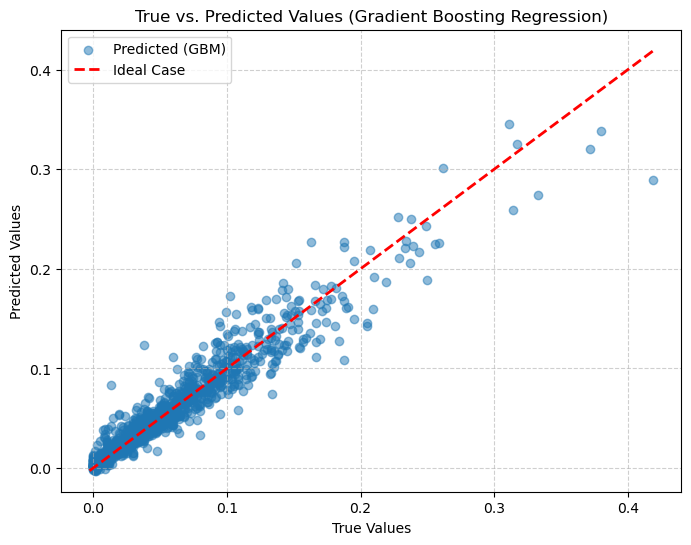

In [46]:
print("\n--- 绘制 Gradient Boosting 评估和分析图表 ---")

# --- 计算预测值和残差 (需要加载模型和测试数据) ---
# 如果 loaded_best_model_gbm 加载失败，这里会崩溃
y_pred_gbm = loaded_best_model_gbm.predict(X_test)
residuals_gbm = y_test - y_pred_gbm

# --- 计算评估指标 (这里移除打印以简化，如果需要请自行添加) ---
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

# --- 图表 1: True vs. Predicted Values Scatter Plot ---
print("\nPlotting True vs. Predicted Values...")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gbm, alpha=0.5, label='Predicted (GBM)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values (Gradient Boosting Regression)')
min_val_plot1 = min(y_test.min(), y_pred_gbm.min())
max_val_plot1 = max(y_test.max(), y_pred_gbm.max())
plt.plot([min_val_plot1, max_val_plot1], [min_val_plot1, max_val_plot1], 'r--', lw=2, label='Ideal Case')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()
plt.show()



Plotting Residuals vs. Predicted Values...


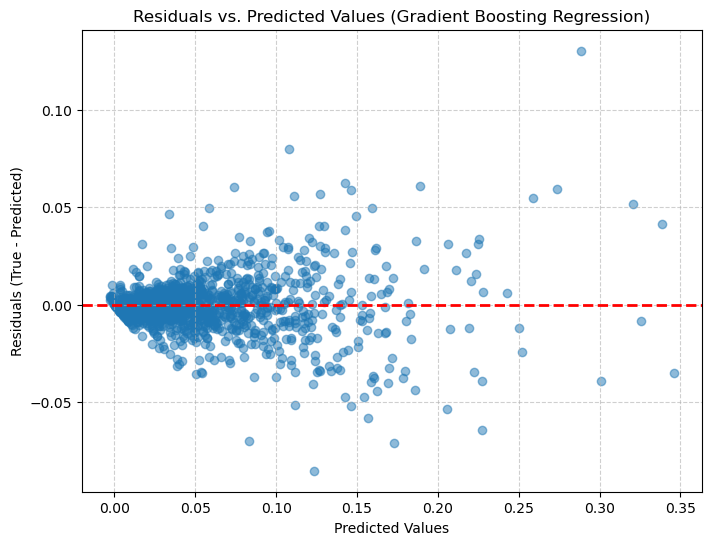

In [47]:
# --- 图表 2: Residuals vs. Predicted Values Scatter Plot ---
print("\nPlotting Residuals vs. Predicted Values...")
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_gbm, residuals_gbm, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (True - Predicted)')
plt.title('Residuals vs. Predicted Values (Gradient Boosting Regression)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Plotting Residuals Distribution Histogram...


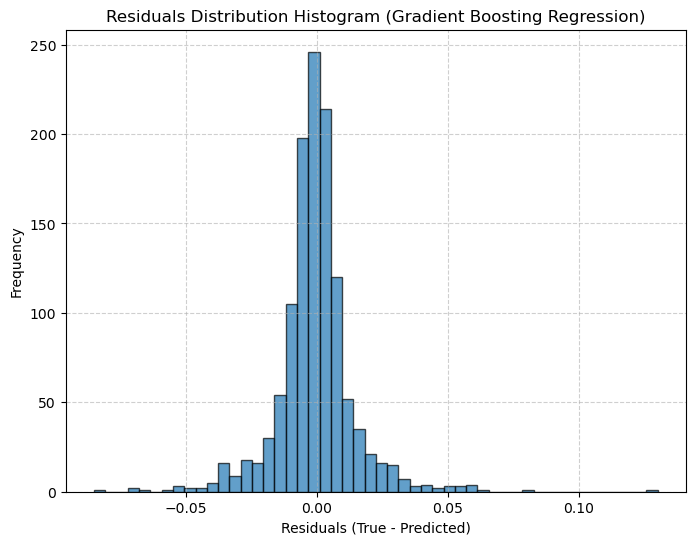

In [48]:
# --- 图表 3: Residuals Distribution Histogram ---
print("\nPlotting Residuals Distribution Histogram...")
plt.figure(figsize=(8, 6))
plt.hist(residuals_gbm, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals (True - Predicted)')
plt.ylabel('Frequency')
plt.title('Residuals Distribution Histogram (Gradient Boosting Regression)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Plotting Feature Importance...


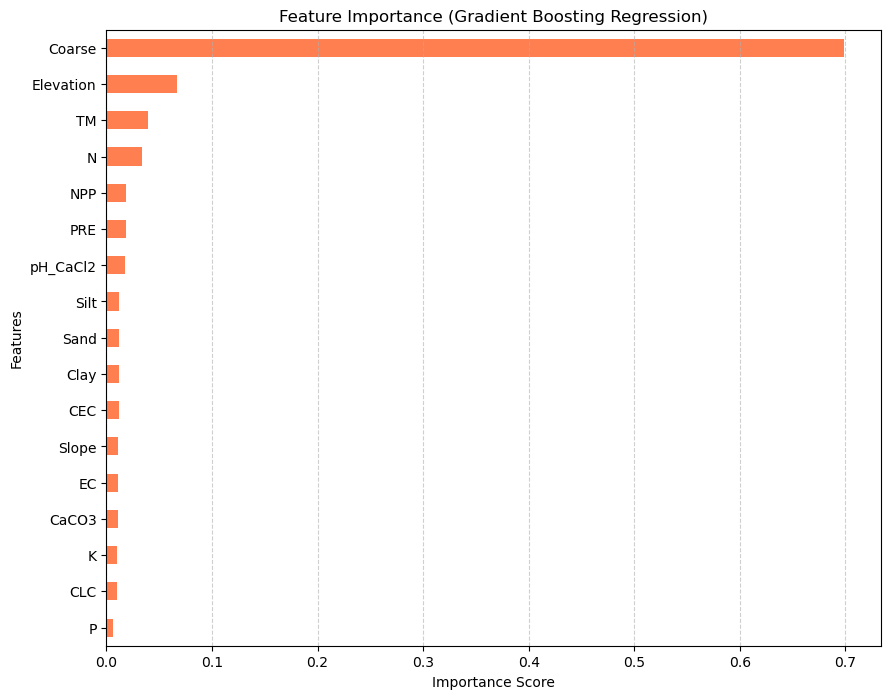

Feature Importance plot generated.


In [49]:
# --- 图表 4: Feature Importance Horizontal Bar Chart ---
print("\nPlotting Feature Importance...")
# 如果 feature_names 数量与 feature_importances_ 不匹配，这里会崩溃
importances = loaded_best_model_gbm.feature_importances_
feature_importance_gbm = pd.Series(importances, index=feature_names)
feature_importance_gbm = feature_importance_gbm.sort_values(ascending=True)

plt.figure(figsize=(10, 8))
feature_importance_gbm.plot(kind='barh', color='coral')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (Gradient Boosting Regression)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()
print("Feature Importance plot generated.")


Plotting Performance vs. Hyperparameters (from GridSearchCV results)...

Plotting Performance vs. Number of Estimators...


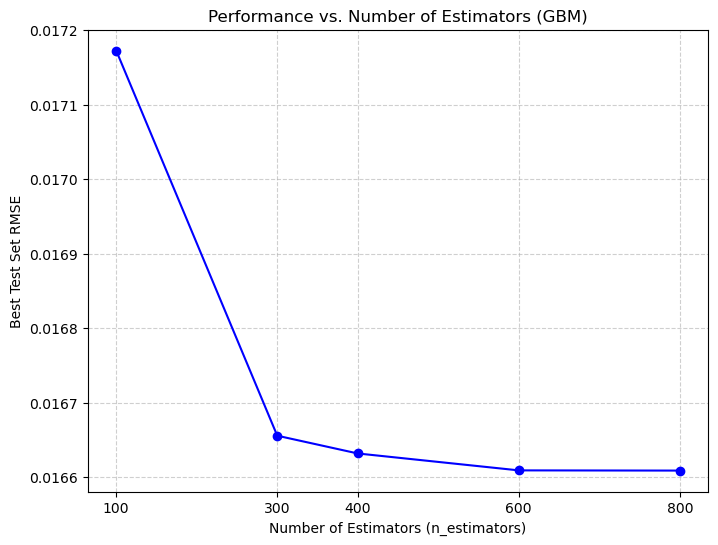

Performance vs. Number of Estimators plot generated.

Plotting Performance vs. Learning Rate...


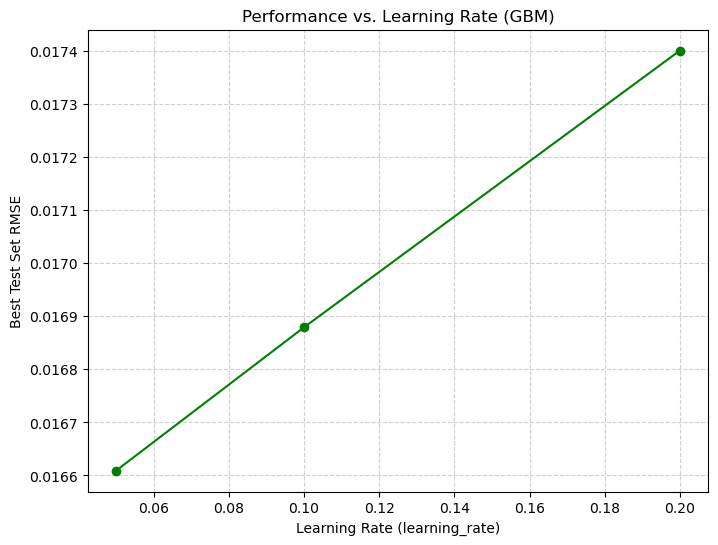

Performance vs. Learning Rate plot generated.

Plotting Performance vs. Max Depth...


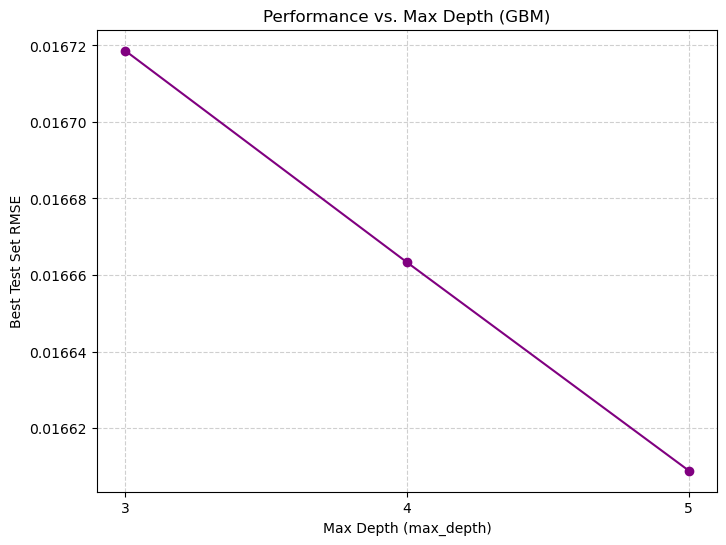

Performance vs. Max Depth plot generated.

Plotting Performance vs. Subsample...


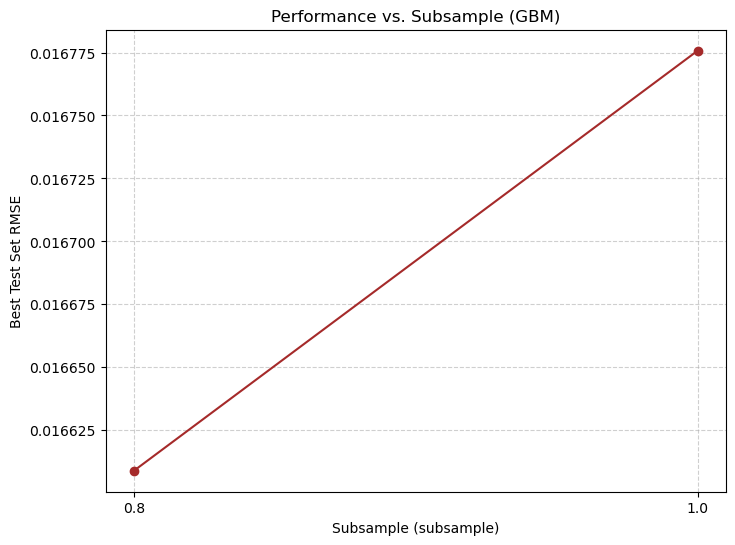

Performance vs. Subsample plot generated.


In [16]:
# --- 图表 5: Performance (Best RMSE) vs. Hyperparameters (from GridSearchCV results) ---
print("\nPlotting Performance vs. Hyperparameters (from GridSearchCV results)...")

# 如果 loaded_grid_search_gbm 加载失败，这里会崩溃
results_gbm = pd.DataFrame(loaded_grid_search_gbm.cv_results_)
results_gbm['mean_test_rmse'] = np.sqrt(-results_gbm['mean_test_score'])

# Plot vs n_estimators - 如果 'param_n_estimators' 列不存在，这里会崩溃
print("\nPlotting Performance vs. Number of Estimators...")
estimators_vs_rmse_gbm = results_gbm.groupby('param_n_estimators')['mean_test_rmse'].min()
plt.figure(figsize=(8, 6))
plt.plot(estimators_vs_rmse_gbm.index, estimators_vs_rmse_gbm.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Best Test Set RMSE')
plt.title('Performance vs. Number of Estimators (GBM)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(estimators_vs_rmse_gbm.index)
plt.show()
print("Performance vs. Number of Estimators plot generated.")

# Plot vs learning_rate - 如果 'param_learning_rate' 列不存在，这里会崩溃
print("\nPlotting Performance vs. Learning Rate...")
learning_rate_vs_rmse_gbm = results_gbm.groupby('param_learning_rate')['mean_test_rmse'].min()
plt.figure(figsize=(8, 6))
plt.plot(learning_rate_vs_rmse_gbm.index, learning_rate_vs_rmse_gbm.values, marker='o', linestyle='-', color='green')
plt.xlabel('Learning Rate (learning_rate)')
plt.ylabel('Best Test Set RMSE')
plt.title('Performance vs. Learning Rate (GBM)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
print("Performance vs. Learning Rate plot generated.")

# Add plots for other parameters if they exist in the grid search results
# Example for max_depth - 如果 'param_max_depth' 列不存在，这里会崩溃
print("\nPlotting Performance vs. Max Depth...")
max_depth_vs_rmse_gbm = results_gbm.groupby('param_max_depth')['mean_test_rmse'].min()
plt.figure(figsize=(8, 6))
plt.plot(max_depth_vs_rmse_gbm.index, max_depth_vs_rmse_gbm.values, marker='o', linestyle='-', color='purple')
plt.xlabel('Max Depth (max_depth)')
plt.ylabel('Best Test Set RMSE')
plt.title('Performance vs. Max Depth (GBM)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(max_depth_vs_rmse_gbm.index)
plt.show()
print("Performance vs. Max Depth plot generated.")

# Example for subsample - 如果 'param_subsample' 列不存在，这里会崩溃
print("\nPlotting Performance vs. Subsample...")
subsample_vs_rmse_gbm = results_gbm.groupby('param_subsample')['mean_test_rmse'].min()
plt.figure(figsize=(8, 6))
plt.plot(subsample_vs_rmse_gbm.index, subsample_vs_rmse_gbm.values, marker='o', linestyle='-', color='brown')
plt.xlabel('Subsample (subsample)')
plt.ylabel('Best Test Set RMSE')
plt.title('Performance vs. Subsample (GBM)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(subsample_vs_rmse_gbm.index)
plt.show()
print("Performance vs. Subsample plot generated.")


### 填补BD和CV

#### BD

In [3]:
# 读取数据
df = pd.read_csv(r'D:\study\组会\DATA\SOC\LUCAS\BD_filled_select.csv')

# 定义协变量
covariates = ["CLC", "Elevation", "Coarse", "Clay", "Silt", "Sand", "pH_CaCl2", "pH_H2O",
              'P', 'N', 'K', 'CaCO3', 'EC', 'CEC', "NPP",'TM', 'PRE', 'Slope']


#协变量为
X = df.iloc[:, 5:23]
#对协变量进行KNN
#K值选则为5，选择距离权重。
imputer = KNNImputer(n_neighbors=5,weights='distance')
X_KNN = imputer.fit_transform(X)
X_KNN = pd.DataFrame(X_KNN, columns=X.columns)  # 保留列名

# 合并两个 DataFrame
X_final = pd.concat([X_KNN, df.iloc[:,23:]], axis=1)

#先只要BD和CV都有值的列，用于拟合出方程，填补无值的列
x_drop= X_final.dropna(subset=['BD', 'CV'])

#输入的x协变量(排除后两列y)
x_input = x_drop.iloc[:,:18]

#两个y变量
y_bdfine = x_drop['BD']
y_coarse_vol = x_drop['CV']

# 计算x特征之间的相关性矩阵
corr_matrix = x_input.corr()

# 找到相关性高于阈值的特征对（大于0.8）
threshold = 0.8
to_drop = set()  # 用来存放需要删除的特征
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            to_drop.add(colname)
        
# 删除高度相关的特征
x_input = x_input.drop(columns=to_drop)

# 数据标准化（对协变量进行标准化）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_input)
print("数据标准化完成。")


# random_state 保证每次划分结果一致，便于调试和比较不同模型
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_bdfine, test_size=0.2, random_state=100)
print(f"数据划分为训练集 ({X_train.shape[0]} 样本) 和测试集 ({X_test.shape[0]} 样本)。")

# 重新赋予列名 (可选，仅当 x_input 保持了列顺序且原 x_input 是 DataFrame 时有用)
# 这步对于 GBM 模型本身拟合不是必需的，但如果后续需要查看 feature_importances_ 等属性时，保留列名更方便
if isinstance(x_input, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=x_input.columns)
    X_test = pd.DataFrame(X_test, columns=x_input.columns)
    print("已尝试重新赋予训练集和测试集特征列名。")
else:
    print("x_input 不是 pandas DataFrame，跳过重新赋予列名。")

数据标准化完成。
数据划分为训练集 (4841 样本) 和测试集 (1211 样本)。
已尝试重新赋予训练集和测试集特征列名。


In [4]:
import joblib 
model_filename = r'D:\study\组会\saved_models\random_forest_bd.joblib'             # 最佳模型文件路径
grid_search_results_filename = r'D:\study\组会\saved_models\random_forest_bd_grid_search.joblib' # GridSearchCV 结果文件路径

# --- *** 5. 从本地加载模型和 GridSearchCV 结果对象 (无错误处理) *** ---
print(f"\n--- 尝试从本地加载模型和 GridSearchCV 结果 (无错误处理) ---")

# 加载最佳模型 - 如果文件不存在或路径错误，这里会崩溃
loaded_best_model_gbm = joblib.load(model_filename)
print(f"✅ 最佳模型已成功从本地加载。")

# 加载 GridSearchCV 结果对象 - 如果文件不存在或路径错误，这里会崩溃
loaded_grid_search_gbm = joblib.load(grid_search_results_filename)
print(f"✅ GridSearchCV 结果对象已成功从本地加载。")



--- 尝试从本地加载模型和 GridSearchCV 结果 (无错误处理) ---
✅ 最佳模型已成功从本地加载。
✅ GridSearchCV 结果对象已成功从本地加载。


In [5]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
# 假设 df, imputer, scaler, X_train, loaded_best_model_gbm 已经被定义并进行了fit/加载

# 步骤 1: 筛选出没有BD值的行
# 使用 .copy() 避免 SettingWithCopyWarning
df_missing_bd = df[df['BD'].isna()].copy()

covariates = ["CLC", "Elevation", "Coarse", "Clay", "Silt", "Sand", "pH_CaCl2", "pH_H2O",
              'P', 'N', 'K', 'CaCO3', 'EC', 'CEC', "NPP",'TM', 'PRE', 'Slope']

# 获取这些行的特征（这是一个 DataFrame）
X_missing_bd = df_missing_bd[covariates]

# 步骤 2: 使用KNNImputer填补缺失值
# imputer.transform 返回一个 NumPy 数组
X_missing_bd_imputed_np = imputer.transform(X_missing_bd)

# 将填补后的 NumPy 数组转换回 DataFrame
# 明确指定列名和索引，确保与原始数据对齐
X_missing_bd_imputed_df = pd.DataFrame(X_missing_bd_imputed_np,
                                       columns=X_missing_bd.columns,
                                       index=X_missing_bd.index) # 保留原始索引

# 步骤 3: 确保缺失数据的列名与训练数据一致并进行排序
# 在 DataFrame 上使用列名列表进行选择和排序
X_missing_bd_imputed_aligned = X_missing_bd_imputed_df[X_train.columns]

# 步骤 4: 对这些特征进行标准化（与训练集一致）
# 对对齐后的 DataFrame 进行标准化
X_missing_bd_scaled = scaler.transform(X_missing_bd_imputed_aligned)

# 步骤 5: 使用训练好的Cubist模型进行预测
# 确保 loaded_best_model_gbm 是正确的模型对象并且期望标准化后的数据
predicted_bd = loaded_best_model_gbm.predict(X_missing_bd_scaled)

# 步骤 6: 将预测的BD值添加到原始数据中
# 使用 .loc 根据索引将预测值赋值回原始 df 中缺失 BD 的位置
df.loc[df_missing_bd.index, 'BD'] = predicted_bd

# 保存合并后的结果到新的CSV文件中
df.to_csv('D:/study/组会/DATA/SOC/LUCAS/BD_predicted_2.csv', index=False)

c:\Users\86186\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#### CV

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_coarse_vol, test_size=0.2, random_state=100)
print(f"数据划分为训练集 ({X_train.shape[0]} 样本) 和测试集 ({X_test.shape[0]} 样本)。")

# 重新赋予列名 (可选，仅当 x_input 保持了列顺序且原 x_input 是 DataFrame 时有用)
# 这步对于 GBM 模型本身拟合不是必需的，但如果后续需要查看 feature_importances_ 等属性时，保留列名更方便
if isinstance(x_input, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=x_input.columns)
    X_test = pd.DataFrame(X_test, columns=x_input.columns)
    print("已尝试重新赋予训练集和测试集特征列名。")
else:
    print("x_input 不是 pandas DataFrame，跳过重新赋予列名。")

数据划分为训练集 (4841 样本) 和测试集 (1211 样本)。
已尝试重新赋予训练集和测试集特征列名。


In [7]:
import joblib 
model_filename = r'D:\study\组会\saved_models\random_forest_cv.joblib'             # 最佳模型文件路径
grid_search_results_filename = r'D:\study\组会\saved_models\random_forest_cv_grid_search.joblib' # GridSearchCV 结果文件路径

# --- *** 5. 从本地加载模型和 GridSearchCV 结果对象 (无错误处理) *** ---
print(f"\n--- 尝试从本地加载模型和 GridSearchCV 结果 (无错误处理) ---")

# 加载最佳模型 - 如果文件不存在或路径错误，这里会崩溃
loaded_best_model_gbm = joblib.load(model_filename)
print(f"✅ 最佳模型已成功从本地加载。")

# 加载 GridSearchCV 结果对象 - 如果文件不存在或路径错误，这里会崩溃
loaded_grid_search_gbm = joblib.load(grid_search_results_filename)
print(f"✅ GridSearchCV 结果对象已成功从本地加载。")



--- 尝试从本地加载模型和 GridSearchCV 结果 (无错误处理) ---
✅ 最佳模型已成功从本地加载。
✅ GridSearchCV 结果对象已成功从本地加载。


In [ ]:
# 步骤 1: 筛选出没有BD值的行
df_missing_bd = df[df['CV'].isna()]

covariates = ["CLC", "Elevation", "Coarse", "Clay", "Silt", "Sand", "pH_CaCl2", "pH_H2O",
              'P', 'N', 'K', 'CaCO3', 'EC', 'CEC', "NPP",'TM', 'PRE', 'Slope']

# 获取这些行的特征（即删除BD和CV列）
X_missing_bd = df_missing_bd[covariates]

# 步骤 2: 使用KNNImputer填补缺失值
X_missing_bd_imputed = imputer.transform(X_missing_bd)  # 使用训练时的imputer进行填补

# 将填补后的特征转换回DataFrame
X_missing_bd_imputed = pd.DataFrame(X_missing_bd_imputed, columns=X_missing_bd.columns)

# 确保缺失数据的列名与训练数据一致
X_missing_bd_imputed = X_missing_bd_imputed[X_train.columns]  # 强制列名与训练集一致

# 步骤 3: 对这些特征进行标准化（与训练集一致）
X_missing_bd_scaled = scaler.transform(X_missing_bd_imputed)  # 使用训练时的scaler进行标准化

# 步骤 4: 使用训练好的Cubist模型进行预测
predicted_bd = loaded_best_model_gbm.predict(X_missing_bd_scaled)

# 步骤 5: 将预测的BD值添加到原始数据中
df_missing_bd['CV_predicted'] = predicted_bd

# 现在将原始数据和预测的BD值合并
df['CV'] = df['CV'].fillna(df_missing_bd['CV_predicted'])  # 用预测的BD填补缺失值

# 保存合并后的结果到新的CSV文件中
df.to_csv('D:/study/组会/DATA/SOC/LUCAS/CV_predicted_1.csv', index=False)


c:\Users\86186\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\86186\AppData\Local\Temp\ipykernel_12624\2757718293.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing_bd['CV_predicted'] = predicted_bd


: 

# 用BD的属性填补SOC没有的属性

In [36]:
import pandas as pd

# --- 配置 ---
# !!! 重要：请确认这个 ID 列名在所有 CSV 文件中都存在且一致 !!!
ID_COLUMN_NAME = 'ID'
BD_FILLED_PATH = r'D:\study\组会\DATA\SOC\LUCAS\BD_filled_select.csv'
DF_2009_PATH = r'D:\study/组会/data/SOC/soc_filled_2009.csv'
DF_2015_PATH = r'D:\study/组会/data/SOC/soc_filled_2015.csv'
DF_2018_PATH = r'D:\study/组会/data/SOC/soc_filled_2018.csv'
# 修改输出文件名以区分
OUTPUT_2009_PATH = r'D:\study/组会/data/SOC/soc_2009_complete_byID.csv'
OUTPUT_2015_PATH = r'D:\study/组会/data/SOC/soc_2015_complete_byID.csv'
OUTPUT_2018_PATH = r'D:\study/组会/data/SOC/soc_2018_complete_byID.csv'

# 需要填补的列 (与原代码一致)
columns_to_fill = ['Elevation', 'Coarse', 'Clay', 'Silt', 'Sand', 'pH_CaCl2', 'pH_H2O', 'P', 'N', 'K', 'CaCO3', 'Slope', 'EC', 'CEC']

# --- 修改后的填补函数 ---
def fill_missing_values_by_id(df_target, df_source, id_column, columns_to_fill):
    """
    使用 df_source 中的数据填补 df_target 中的缺失值，
    通过共同的 id_column 进行匹配。

    Args:
        df_target (pd.DataFrame): 需要被填补的目标 DataFrame。
        df_source (pd.DataFrame): 提供填补值的源 DataFrame (bd_filled)。
        id_column (str): 两个 DataFrame中共有的 ID 列名。
        columns_to_fill (list): 需要检查并填补缺失值的列名列表。

    Returns:
        pd.DataFrame: 填补缺失值后的目标 DataFrame 的副本。
    """
    # 创建副本以避免修改原始传入的 DataFrame
    df_target_filled = df_target.copy()
    df_source_copy = df_source.copy()

    # --- 检查 ID 列是否存在 ---
    if id_column not in df_target_filled.columns:
        raise ValueError(f"错误：ID 列 '{id_column}' 在目标 DataFrame 中未找到。")
    if id_column not in df_source_copy.columns:
        raise ValueError(f"错误：ID 列 '{id_column}' 在源 DataFrame (bd_filled) 中未找到。")

    # --- 将 ID 列设置为索引，以便按 ID 对齐 ---
    # 检查源数据中是否有重复ID，如果有，只保留第一个，避免fillna混乱
    if df_source_copy[id_column].duplicated().any():
        print(f"警告：源 DataFrame (bd_filled) 中发现重复的 ID '{id_column}'。将仅使用首次出现的记录进行填补。")
        df_source_copy = df_source_copy.drop_duplicates(subset=[id_column], keep='first')
    
    df_target_filled.set_index(id_column, inplace=True)
    df_source_copy.set_index(id_column, inplace=True)

    # --- 逐列进行填补 ---
    for column in columns_to_fill:
        # 确保目标和源中都存在该列
        if column in df_target_filled.columns and column in df_source_copy.columns:
            # 如果目标列确实有缺失值
            if df_target_filled[column].isnull().any():
                print(f"正在填补列 '{column}' 的缺失值...")
                # fillna 会自动根据索引 (现在是 ID) 来匹配 df_source_copy 中的值
                df_target_filled[column] = df_target_filled[column].fillna(df_source_copy[column])
        elif column not in df_target_filled.columns:
             print(f"警告：列 '{column}' 在目标 DataFrame 中不存在，跳过填补。")
        else: # column not in df_source_copy.columns
             print(f"警告：列 '{column}' 在源 DataFrame (bd_filled) 中不存在，无法用于填补，跳过。")


    # --- 恢复索引，使 ID 列变回普通列 ---
    df_target_filled.reset_index(inplace=True)

    return df_target_filled

# --- 主程序 ---
try:
    # 读取数据
    print("正在读取数据...")
    bd_filled = pd.read_csv(BD_FILLED_PATH)
    df_2009 = pd.read_csv(DF_2009_PATH)
    df_2015 = pd.read_csv(DF_2015_PATH)
    df_2018 = pd.read_csv(DF_2018_PATH)
    print("数据读取完毕。")

    # 检查 ID 列是否存在于 bd_filled
    if ID_COLUMN_NAME not in bd_filled.columns:
         raise ValueError(f"错误：ID 列 '{ID_COLUMN_NAME}' 在主填补文件 '{BD_FILLED_PATH}' 中未找到。")

    # 填补每个数据集
    print(f"\n开始处理数据，使用 '{ID_COLUMN_NAME}' 列进行匹配...")
    print("\n处理 2009 数据...")
    df_2009_filled = fill_missing_values_by_id(df_2009, bd_filled, ID_COLUMN_NAME, columns_to_fill)

    print("\n处理 2015 数据...")
    df_2015_filled = fill_missing_values_by_id(df_2015, bd_filled, ID_COLUMN_NAME, columns_to_fill)

    print("\n处理 2018 数据...")
    df_2018_filled = fill_missing_values_by_id(df_2018, bd_filled, ID_COLUMN_NAME, columns_to_fill)
    print("\n数据填补完成。")

    # 保存填补后的 CSV 文件
    print("\n正在保存结果...")
    df_2009_filled.to_csv(OUTPUT_2009_PATH, index=False)
    df_2015_filled.to_csv(OUTPUT_2015_PATH, index=False)
    df_2018_filled.to_csv(OUTPUT_2018_PATH, index=False)
    print("文件已成功保存。")

except FileNotFoundError as e:
    print(f"错误：找不到文件。请检查路径是否正确。详细信息: {e}")
except ValueError as e:
    print(e) # 打印 ID 列未找到的错误
except Exception as e:
    print(f"发生了一个意料之外的错误: {e}")

正在读取数据...


C:\Users\86186\AppData\Local\Temp\ipykernel_2064\1553030194.py:79: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2018 = pd.read_csv(DF_2018_PATH)


数据读取完毕。

开始处理数据，使用 'ID' 列进行匹配...

处理 2009 数据...
正在填补列 'Elevation' 的缺失值...
正在填补列 'N' 的缺失值...
正在填补列 'Slope' 的缺失值...
正在填补列 'EC' 的缺失值...

处理 2015 数据...
正在填补列 'Coarse' 的缺失值...
正在填补列 'Clay' 的缺失值...
正在填补列 'Silt' 的缺失值...
正在填补列 'Sand' 的缺失值...
正在填补列 'CEC' 的缺失值...

处理 2018 数据...
正在填补列 'Elevation' 的缺失值...
正在填补列 'Coarse' 的缺失值...
正在填补列 'Clay' 的缺失值...
正在填补列 'Silt' 的缺失值...
正在填补列 'Sand' 的缺失值...
正在填补列 'P' 的缺失值...
正在填补列 'N' 的缺失值...
正在填补列 'K' 的缺失值...
正在填补列 'CaCO3' 的缺失值...
正在填补列 'Slope' 的缺失值...
正在填补列 'EC' 的缺失值...
正在填补列 'CEC' 的缺失值...

数据填补完成。

正在保存结果...
文件已成功保存。


# 计算SOC

In [ ]:
import pandas as pd

# 读取主数据（BD_filled_complete.csv）
df_bd = pd.read_csv('D:/study/组会/DATA/SOC/LUCAS/CV_predicted.csv')

# 定义SOC计算函数
def calculate_soc(df_oc, df_bd, depth=0.2):
    # 按ID合并两个DataFrame
    df_merged = pd.merge(df_oc, df_bd[['ID', 'BD', 'CV']], on='ID', how='left')

    # 根据公式计算SOC
    df_merged['SOC'] = depth * df_merged['BD'] * df_merged['OC'] * (1 - df_merged['CV'])

    return df_merged

# 读取并处理2018年的数据
df_2018 = pd.read_csv('D:/study/组会/data/SOC/SOC_2018_1.csv')
df_2018 = calculate_soc(df_2018, df_bd)
df_2018.to_csv('D:/study/组会/data/SOC/soc_filled_2018_1.csv', index=False)

# 读取并处理2015年的数据
df_2015 = pd.read_csv('D:/study/组会/data/SOC/SOC_2015_1.csv')
df_2015 = calculate_soc(df_2015, df_bd)
df_2015.to_csv('D:/study/组会/data/SOC/soc_filled_2015_1.csv', index=False)

# 读取并处理2009年的数据
df_2009 = pd.read_csv('D:/study/组会/data/SOC/SOC_2009_1.csv')
df_2009 = calculate_soc(df_2009, df_bd)
df_2009.to_csv('D:/study/组会/data/SOC/soc_filled_2009_1.csv', index=False)

# 打印第一行的结果以确认是否正确
print(df_2018[['ID', 'OC', 'BD', 'CV', 'SOC']].head())


         ID    OC        BD        CV       SOC
0  26521970  19.0  1.037489  1.037489 -0.147801
1  26581768  28.2  1.038000  0.061000  5.497206
2  26581792  33.5  0.961263  0.961263  0.249486
3  26581954  13.7  1.052179  1.052179 -0.150431
4  26601784  52.1  0.833315  0.833315  1.447350


: 

# 绘图SOC看看

# 进行SOC的机器学习

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from cubist import Cubist
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


## 预处理

In [ ]:
# --- 1. 读取数据 ---
try:
    df_2009 = pd.read_csv(r'D:\study/组会/data/SOC/soc_2009_complete.csv')
    df_2015 = pd.read_csv(r'D:\study/组会/data/SOC/soc_2015_complete.csv')
    df_2018 = pd.read_csv(r'D:\study/组会/data/SOC/soc_2018_complete.csv')
except FileNotFoundError:
    print("错误：请确保文件路径正确无误！")
    exit()
# --- 2. 定义协变量 (使用 iloc) 和目标变量 ---
# 问题2的解决方案
X_2009 = df_2009.iloc[:, 7:]
X_2015 = df_2015.iloc[:, 7:]
X_2018 = df_2018.iloc[:, 7:]

# 获取协变量名称（假设所有年份的协变量列名和顺序一致）
covariate_names = X_2009.columns.tolist()

Y_2009 = df_2009['SOC']
Y_2015 = df_2015['SOC'] 
Y_2018 = df_2018['SOC'] 

# --- 3. 准备训练集和测试集 (按时间划分) ---
# 问题3: 训练集使用2009年和2018年的数据
X_train_full = pd.concat([X_2009, X_2018], ignore_index=True)
y_train_full = pd.concat([Y_2009, Y_2018], ignore_index=True)

# 问题3: 测试集使用2015年的数据
X_test = X_2015
y_test = Y_2015

print(f"训练集样本数: {X_train_full.shape[0]}")
print(f"测试集样本数: {X_test.shape[0]}")

# --- 4. 缺失值填补
# 最佳实践：仅用训练集数据拟合插补器
imputer = KNNImputer(n_neighbors=5, weights='distance')

# 拟合训练数据并转换训练数据
print("开始对训练集进行KNN插补...")
X_train_imputed = imputer.fit_transform(X_train_full)
print("训练集插补完成.")

# 转换测试数据 (注意：只用transform，不用fit)
print("开始对测试集进行KNN插补...")
X_test_imputed = imputer.transform(X_test)
print("测试集插补完成.")

# 转换回DataFrame以保留列名 (可选，但方便后续特征重要性分析)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=covariate_names)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=covariate_names)

# 检查插补后是否还有缺失值
print(f"插补后训练集缺失值数量: {X_train_imputed.isnull().sum().sum()}")
print(f"插补后测试集缺失值数量: {X_test_imputed.isnull().sum().sum()}")



训练集样本数: 40669
测试集样本数: 21859
开始对训练集进行KNN插补...
训练集插补完成.
开始对测试集进行KNN插补...
测试集插补完成.
插补后训练集缺失值数量: 0
插补后测试集缺失值数量: 0


In [11]:
# --- 5. 网格搜索与交叉验证进行超参数调优 
# 定义随机森林模型
rf = RandomForestRegressor(random_state=66) # 设置随机种子以便结果复现

# 定义要搜索的超参数网格
param_grid = {
    'n_estimators': [100, 200, 300],         # 树的数量
    'max_depth': [10, 20, None],             # 树的最大深度
    'min_samples_split': [2, 5, 10],        # 节点分裂所需最小样本数
    'min_samples_leaf': [1, 3, 5],          # 叶节点最少样本数
    'max_features': ['sqrt', 'log2', 0.7]    # 寻找最佳分裂时考虑的特征数量 ('auto' 在新版本中等于 'sqrt')
}

# 定义9折交叉验证 
# 注意：GridSearchCV 会自动在 X_train_imputed 上进行9折分割和验证
# 它内部会把训练集分成9份，用8份训练，1份验证，重复9次，来评估每组超参数
cv_strategy = KFold(n_splits=9, shuffle=True, random_state=66) # shuffle=True 保证每次分割是随机的

# 配置GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv_strategy, # 使用9折交叉验证
    scoring='neg_mean_squared_error', # 使用负MSE作为评分，因为GridSearch默认找最大值，我们要最小化MSE
    n_jobs=-1,       # 使用所有CPU核心
    verbose=2        # 显示详细的搜索过程信息
)

print("\n开始进行网格搜索和9折交叉验证...")
# 在插补后的训练数据上执行搜索
grid_search.fit(X_train_imputed, y_train_full)
print("网格搜索完成.")

# 获取最佳参数和最佳模型
print("\n找到的最佳超参数组合:")
print(grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
print("\n使用最佳参数训练得到的模型:")
print(best_rf_model)




开始进行网格搜索和9折交叉验证...
Fitting 9 folds for each of 243 candidates, totalling 2187 fits
网格搜索完成.

找到的最佳超参数组合:
{'max_depth': 20, 'max_features': 0.7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300}

使用最佳参数训练得到的模型:
RandomForestRegressor(max_depth=20, max_features=0.7, min_samples_leaf=3,
                      n_estimators=300, random_state=66)


In [14]:

# --- 6. 模型评估 (问题5) ---
print("\n开始评估模型...")
# 在训练集上进行预测
y_pred_train = best_rf_model.predict(X_train_imputed)
# 在测试集 (2015年数据) 上进行预测
y_pred_test = best_rf_model.predict(X_test_imputed)

# 计算评估指标
# 训练集
mse_train = mean_squared_error(y_train_full, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train_full, y_pred_train)

# 测试集
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\n--- 模型评估结果 ---")
print(f"训练集 - RMSE: {rmse_train:.4f}, R2: {r2_train:.4f}")
print(f"测试集 - RMSE: {rmse_test:.4f}, R2: {r2_test:.4f}")



开始评估模型...

--- 模型评估结果 ---
训练集 - RMSE: 1.3779, R2: 0.9241
测试集 - RMSE: 2.7644, R2: 0.6583



开始绘制结果图...


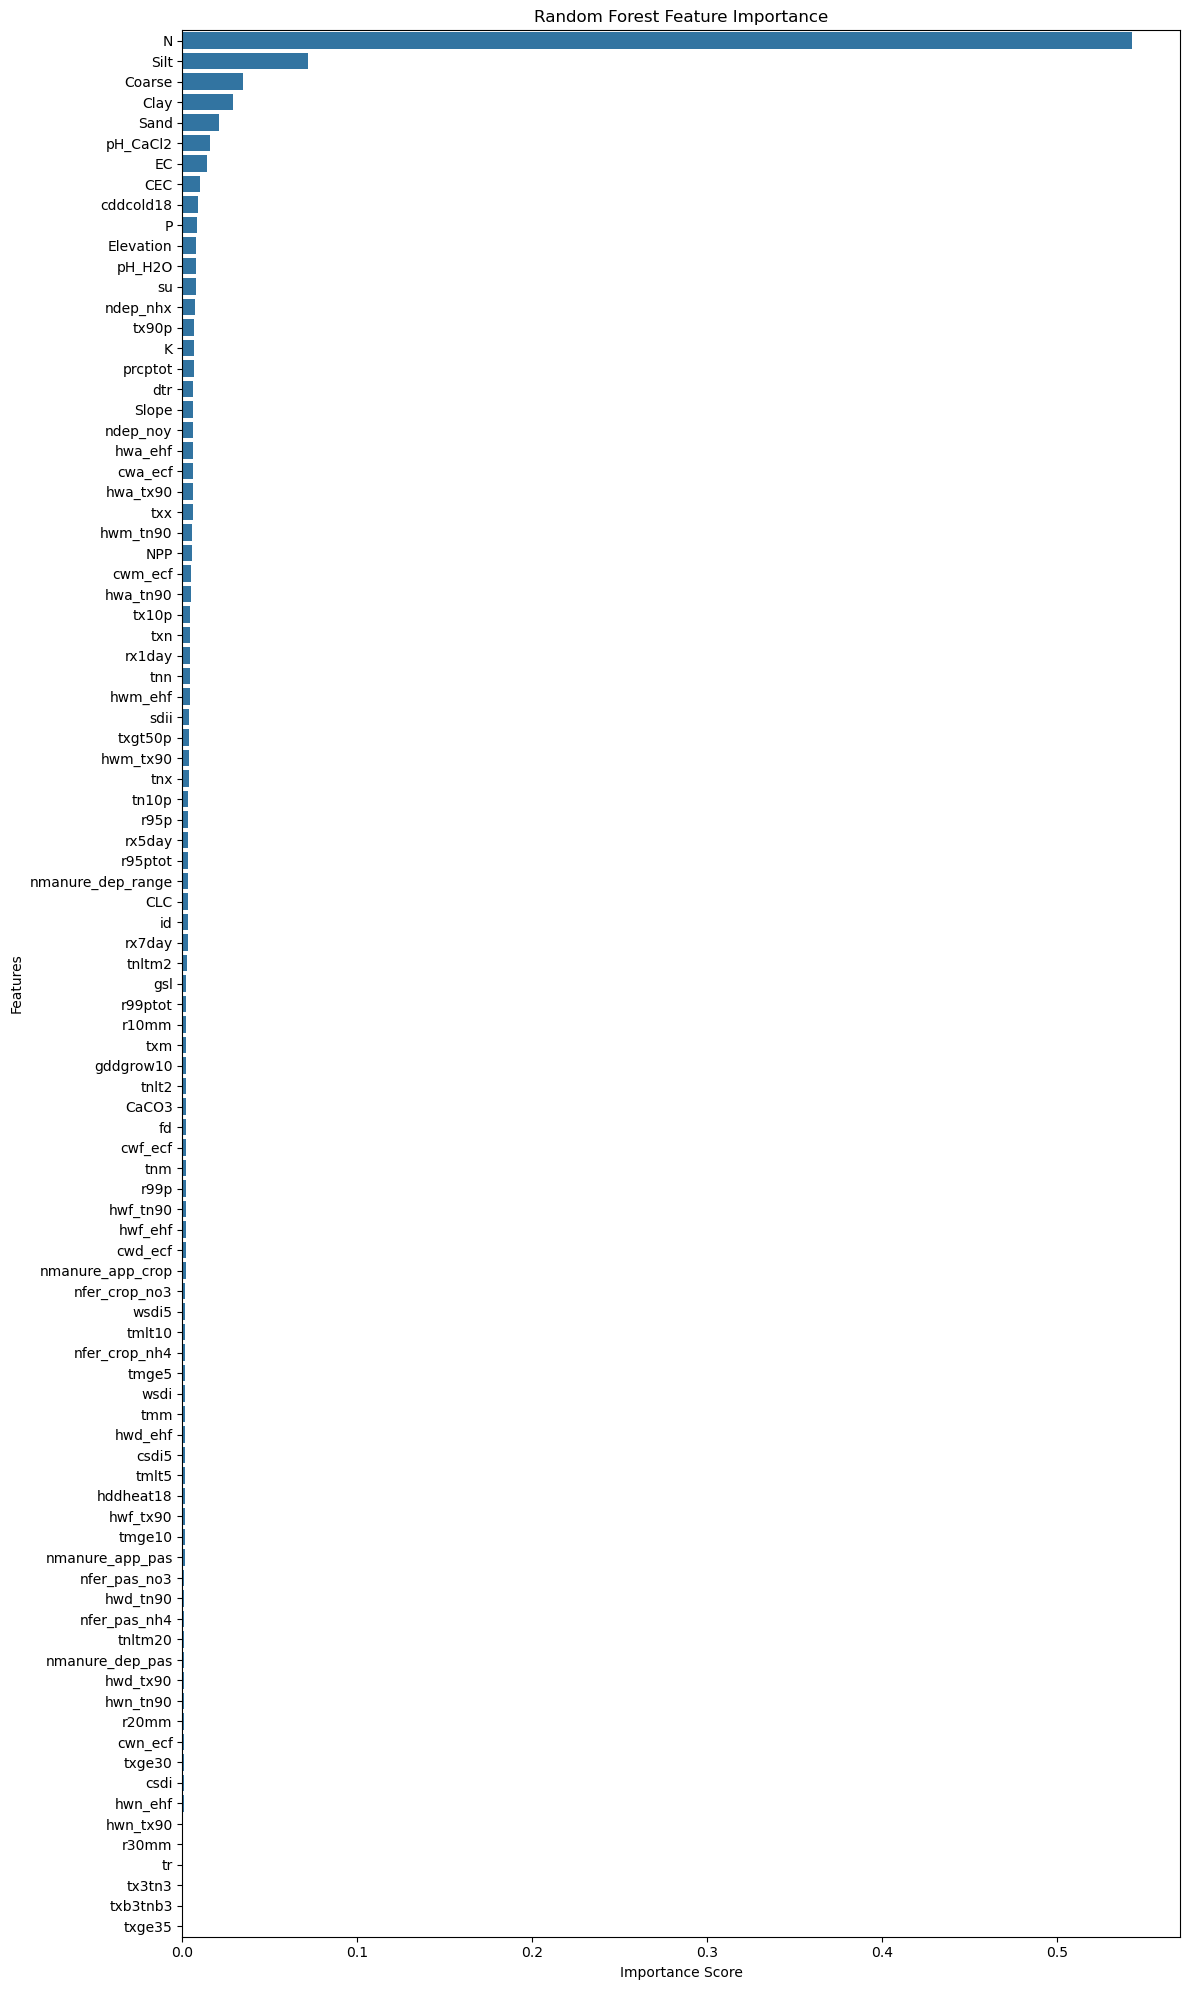

In [16]:
# --- 7. 结果可视化 (问题6) ---
print("\n开始绘制结果图...")

import seaborn as sns

# (1) 特征重要性
importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': covariate_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 20))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


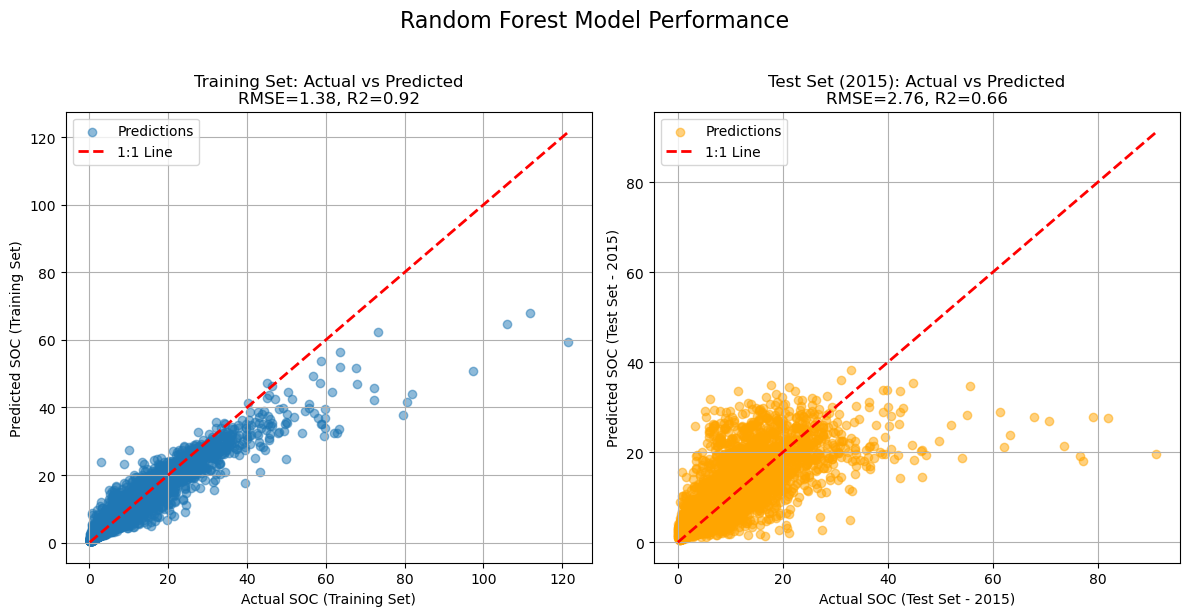


代码执行完毕.


In [17]:
# (2) 预测值 vs 实际值散点图
plt.figure(figsize=(12, 6))

# 训练集
plt.subplot(1, 2, 1)
plt.scatter(y_train_full, y_pred_train, alpha=0.5, label='Predictions')
plt.plot([y_train_full.min(), y_train_full.max()], [y_train_full.min(), y_train_full.max()], 'r--', lw=2, label='1:1 Line')
plt.xlabel("Actual SOC (Training Set)")
plt.ylabel("Predicted SOC (Training Set)")
plt.title(f"Training Set: Actual vs Predicted\nRMSE={rmse_train:.2f}, R2={r2_train:.2f}")
plt.legend()
plt.grid(True)

# 测试集
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Predictions', color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='1:1 Line')
plt.xlabel("Actual SOC (Test Set - 2015)")
plt.ylabel("Predicted SOC (Test Set - 2015)")
plt.title(f"Test Set (2015): Actual vs Predicted\nRMSE={rmse_test:.2f}, R2={r2_test:.2f}")
plt.legend()
plt.grid(True)

plt.suptitle('Random Forest Model Performance', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print("\n代码执行完毕.")


--- 开始进行部分依赖分析 (PDP/ICE) ---
将为以下最重要的 6 个特征绘制 PDP/ICE 图:
['N', 'Silt', 'Coarse', 'Clay', 'Sand', 'pH_CaCl2']


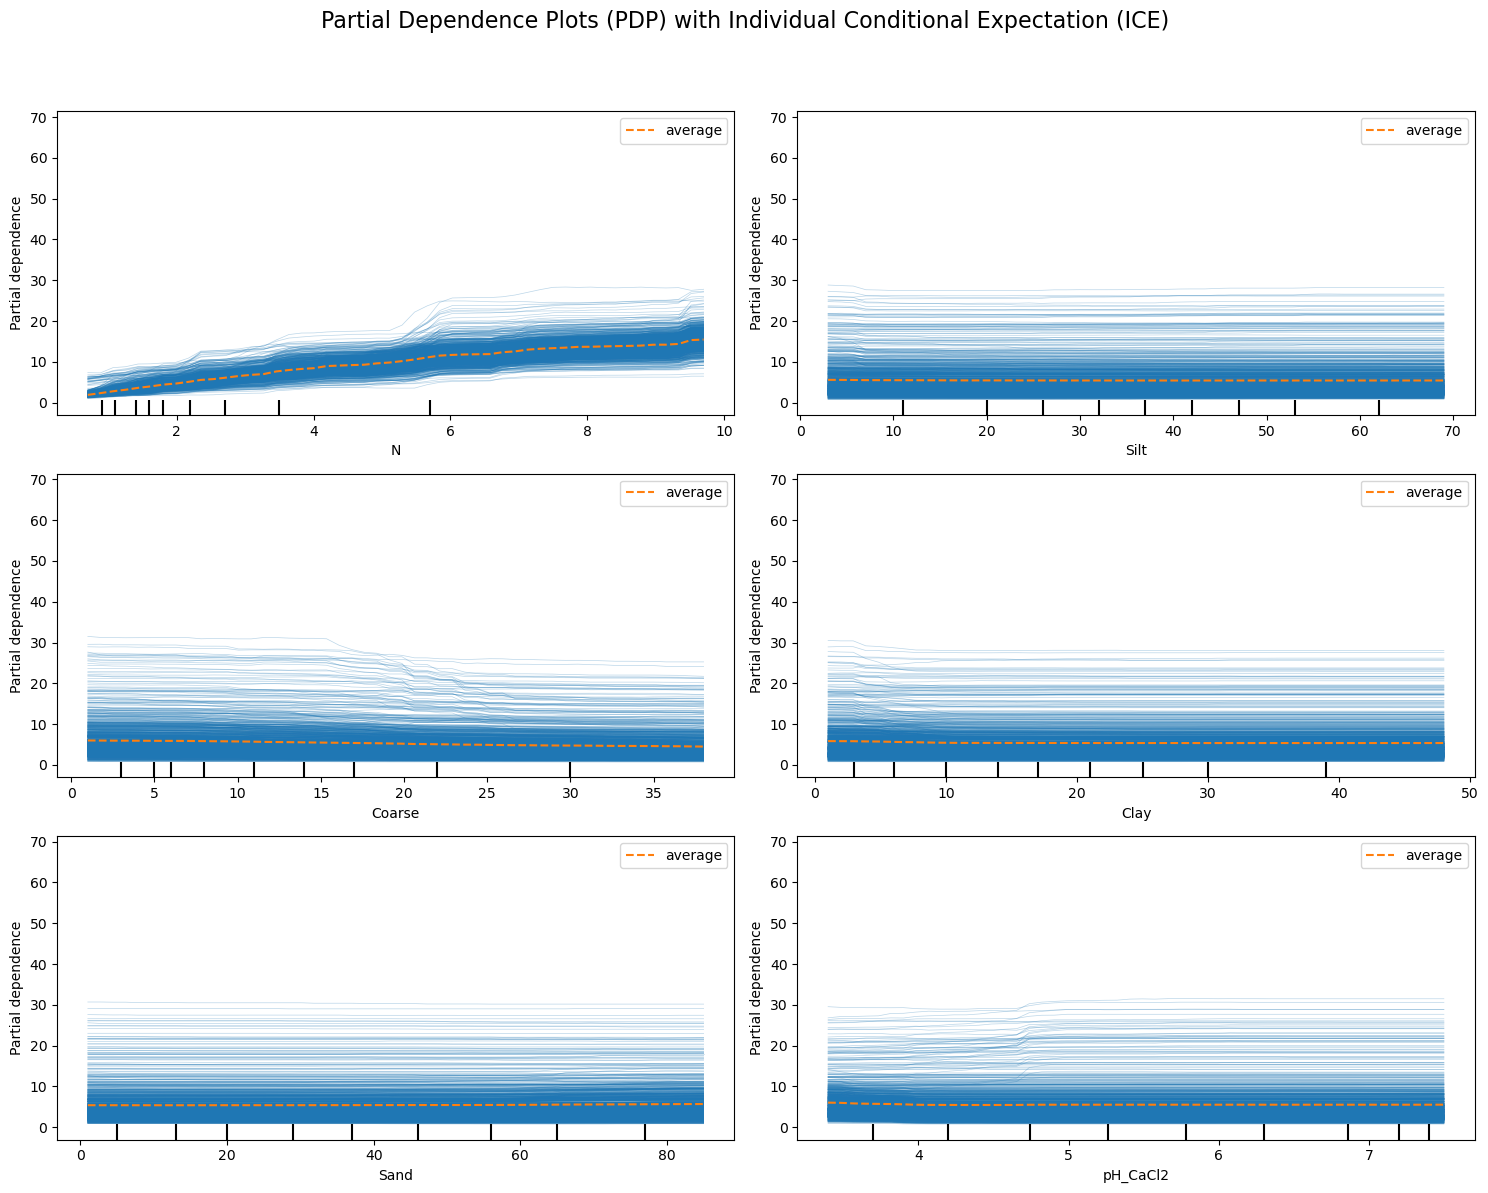


部分依赖分析绘图完成。
代码执行完毕。


In [18]:
from sklearn.inspection import PartialDependenceDisplay # Newer, preferred way

# --- 8. 部分依赖分析和绘图 (Partial Dependence Plots - PDP) ---
print("\n--- 开始进行部分依赖分析 (PDP/ICE) ---")

# 选择要绘制PDP的最重要的N个特征
N_top_features = 6 # 你可以调整这个数量
top_features = feature_importance_df['Feature'].head(N_top_features).tolist()

print(f"将为以下最重要的 {N_top_features} 个特征绘制 PDP/ICE 图:")
print(top_features)

# --- 绘制 PDP 和 ICE 图 ---
# PartialDependenceDisplay.from_estimator 会自动处理图形布局
# kind='both' 会同时绘制 PDP（平均线）和 ICE（个体线）
# 使用训练数据 X_train_imputed 来计算依赖关系
# 'percentiles' 控制 x 轴范围，通常在数据的第 5 和第 95 百分位数之间显示，避免受极端值影响
# 'n_jobs' 可以加速计算过程
# 'grid_resolution' 控制计算 PDP/ICE 曲线时特征值的精细程度

# 注意：如果计算时间过长，可以尝试减少 N_top_features、降低 grid_resolution 或减少 ICE 线数量 (设置 subsample)
# 注意：对于分类特征（如 CLC，如果它是类别编码），PDP的解释需要谨慎。
#       最好在建模前对其进行独热编码（One-Hot Encoding），然后为每个独热编码后的虚拟变量绘制PDP。
#       如果 CLC 是数值编码（如 1, 2, 3...），当前的 PDP 会将其视为连续数值，可能难以解释。

try:
    fig, ax = plt.subplots(figsize=(15, 4 * ((N_top_features + 1) // 2)), # 调整图形大小以容纳子图
                         ncols=2, nrows=((N_top_features + 1) // 2)) # 创建子图网格

    display = PartialDependenceDisplay.from_estimator(
        best_rf_model,
        X_train_imputed, # 使用训练数据计算
        features=top_features, # 指定要绘制的特征列表
        kind='both', # 'average' 只绘制PDP, 'individual' 只绘制ICE, 'both' 都绘制
        subsample=1000, # 使用部分样本计算ICE线以加速（如果训练集很大），设为None或1.0使用全部
        n_jobs=-1, # 使用所有CPU核心
        grid_resolution=50, # x轴上的点数
        random_state=66,
        ax=ax.flatten()[:N_top_features] # 将图绘制到我们创建的子图上
    )

    # 调整布局和标题
    fig.suptitle('Partial Dependence Plots (PDP) with Individual Conditional Expectation (ICE)', fontsize=16, y=1.02)
    fig.tight_layout(rect=[0, 0.03, 1, 0.98]) # 调整布局防止标题重叠

    # 如果子图数量是奇数，隐藏最后一个空的子图轴
    if N_top_features % 2 != 0:
        ax.flatten()[-1].set_visible(False)

    plt.show()

except Exception as e:
    print(f"绘制 PDP/ICE 图时出错: {e}")
    print("可能的原因包括：")
    print("- 内存不足（尝试减少 subsample 或 N_top_features）。")
    print("- 特征名称或数据类型问题。")
    print("- Scikit-learn 版本兼容性问题。")


print("\n部分依赖分析绘图完成。")
print("代码执行完毕。")

In [19]:
# --- (接续之前的代码) ---
# 假设 best_rf_model 变量已经包含训练好的最佳随机森林模型

# --- 8. 保存训练好的模型 ---
import joblib
import os # 用于处理路径

print("\n--- 开始保存模型 ---")

# 定义模型保存的路径和文件名
# 最好指定一个清晰的路径，避免保存在临时目录
model_directory = r'D:\study\组会\saved_models' # <<< 你可以修改这个保存目录
model_filename = 'soc_random_forest_best_model.joblib'
model_save_path = os.path.join(model_directory, model_filename)

# 确保保存目录存在，如果不存在则创建
os.makedirs(model_directory, exist_ok=True) # exist_ok=True 表示如果目录已存在则不报错

try:
    # 使用 joblib.dump 保存模型对象
    # compress=True 可以压缩文件大小，但会稍微增加保存和加载时间
    joblib.dump(best_rf_model, model_save_path, compress=True)
    print(f"模型已成功保存到: {model_save_path}")

except Exception as e:
    print(f"保存模型时出错: {e}")

# --- (脚本剩余部分，例如 PDP 分析等) ---


--- 开始保存模型 ---
模型已成功保存到: D:\study\组会\saved_models\soc_random_forest_best_model.joblib
